

# Loan Default Probability 

The goal of this case study is to build a machine learning model to predict the probability that a loan will default.

In [1]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. We want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.ensemble import VotingClassifier

<a id='1.2'></a>
## 2.2. Loading the Data

In [3]:
dataset = pd.read_csv('LoansData_sample.csv.gz',index_col=0,compression='gzip')

### Examine the properties of the data frame

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Columns: 150 entries, id to settlement_term
dtypes: float64(115), int64(1), object(34)
memory usage: 115.2+ MB


In [5]:
dataset.shape

(100000, 150)

The dataset has 150 columns (features) and 100000 observations (samples)

In [6]:
column_names = list(dataset.columns)

Describe numerical featurs of the dataset:

In [7]:
for i in range(15):
    print(i*10, (i+1)*10)
    display(dataset.iloc[:,i*10:(i+1)*10].describe())

0 10


id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.000000e+05        0.0  100000.000000  100000.000000    100000.000000   
mean   3.029995e+07        NaN   14886.930000   14886.930000     14883.910500   
std    4.763500e+06        NaN    8504.432514    8504.432514      8502.519174   
min    5.716700e+04        NaN    1000.000000    1000.000000      1000.000000   
25%    2.737015e+07        NaN    8000.000000    8000.000000      8000.000000   
50%    3.052556e+07        NaN   13050.000000   13050.000000     13050.000000   
75%    3.438201e+07        NaN   20000.000000   20000.000000     20000.000000   
max    3.809811e+07        NaN   35000.000000   35000.000000     35000.000000   

            int_rate    installment  
count  100000.000000  100000.000000  
mean       13.278073     437.331824  
std         4.390210     244.317648  
min         6.000000      30.420000  
25%        10.150000     261.640000  
50%        12.990000     380.180000  
75%        15.610000     573.320000  
max        26.060000    1408.130000

10 20


annual_inc
count  1.000000e+05
mean   7.468924e+04
std    5.809527e+04
min    4.000000e+03
25%    4.500000e+04
50%    6.400000e+04
75%    9.000000e+04
max    7.500000e+06

20 30


dti    delinq_2yrs  fico_range_low  fico_range_high  \
count  100000.000000  100000.000000   100000.000000    100000.000000   
mean       18.769787       0.343920      692.579800       696.579870   
std         8.539769       0.906525       29.396935        29.397299   
min         0.000000       0.000000      660.000000       664.000000   
25%        12.320000       0.000000      670.000000       674.000000   
50%        18.210000       0.000000      685.000000       689.000000   
75%        24.760000       0.000000      705.000000       709.000000   
max        39.990000      22.000000      845.000000       850.000000   

       inq_last_6mths  mths_since_last_delinq  
count   100000.000000            51297.000000  
mean         0.621890               33.522526  
std          0.913877               21.702020  
min          0.000000                0.000000  
25%          0.000000               15.000000  
50%          0.000000               30.000000  
75%          1.000000               49.000000  
max          6.000000              141.000000

30 40


mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            16732.000000  100000.000000  100000.000000  1.000000e+05   
mean                69.394215      11.832750       0.214560  1.758806e+04   
std                 27.871347       5.448006       0.585481  2.456089e+04   
min                  0.000000       1.000000       0.000000  0.000000e+00   
25%                 50.000000       8.000000       0.000000  6.451000e+03   
50%                 67.000000      11.000000       0.000000  1.200200e+04   
75%                 89.000000      15.000000       0.000000  2.142150e+04   
max                120.000000      84.000000      19.000000  2.560703e+06   

         revol_util      total_acc      out_prncp  out_prncp_inv  \
count  99944.000000  100000.000000  100000.000000  100000.000000   
mean      55.434985      26.034860    1215.108460    1214.906467   
std       23.460328      12.196191    3368.209245    3367.641490   
min        0.000000       3.000000       0.000000       0.000000   
25%       38.100000      17.000000       0.000000       0.000000   
50%       56.000000      24.000000       0.000000       0.000000   
75%       73.400000      33.000000       0.000000       0.000000   
max      180.300000     156.000000   21209.060000   21209.060000   

         total_pymnt  
count  100000.000000  
mean    15210.210257  
std      9603.208486  
min         0.000000  
25%      7969.798206  
50%     13056.895000  
75%     20653.820034  
max     56833.407901

40 50


total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count    100000.000000    100000.000000  100000.000000       100000.000000   
mean      15207.121685     11978.875625    3040.957018            1.230037   
std        9601.026429      8098.533544    2936.616306            8.540185   
min           0.000000         0.000000       0.000000            0.000000   
25%        7968.102500      6000.000000    1024.770000            0.000000   
50%       13054.160000     10000.000000    2038.310000            0.000000   
75%       20650.720000     16000.000000    4081.630000            0.000000   
max       56833.410000     35000.000000   23851.970000          338.460000   

          recoveries  collection_recovery_fee  last_pymnt_amnt  
count  100000.000000            100000.000000    100000.000000  
mean      189.147561                31.416891      4165.111319  
std       820.822584               141.946160      6181.626479  
min         0.000000                 0.000000         0.000000  
25%         0.000000                 0.000000       348.560000  
50%         0.000000                 0.000000       784.455000  
75%         0.000000                 0.000000      6035.437500  
max     29923.860000              5386.293000     36234.440000

50 60


last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
count         100000.000000        100000.000000               100000.000000   
mean             677.927640           664.187650                    0.017010   
std               77.841843           119.458409                    0.161991   
min                0.000000             0.000000                    0.000000   
25%              634.000000           630.000000                    0.000000   
50%              694.000000           690.000000                    0.000000   
75%              729.000000           725.000000                    0.000000   
max              850.000000           845.000000                   20.000000   

       mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  \
count                 27941.000000     100000.0               0.0        0.0   
mean                     43.451237          1.0               NaN        NaN   
std                      21.574189          0.0               NaN        NaN   
min                       0.000000          1.0               NaN        NaN   
25%                      26.000000          1.0               NaN        NaN   
50%                      44.000000          1.0               NaN        NaN   
75%                      60.000000          1.0               NaN        NaN   
max                     169.000000          1.0               NaN        NaN   

       verification_status_joint  acc_now_delinq  
count                        0.0   100000.000000  
mean                         NaN        0.006380  
std                          NaN        0.087289  
min                          NaN        0.000000  
25%                          NaN        0.000000  
50%                          NaN        0.000000  
75%                          NaN        0.000000  
max                          NaN        4.000000

60 70


tot_coll_amt   tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  \
count  100000.000000  1.000000e+05          0.0          0.0          0.0   
mean      235.468840  1.409109e+05          NaN          NaN          NaN   
std      2067.656354  1.573992e+05          NaN          NaN          NaN   
min         0.000000  0.000000e+00          NaN          NaN          NaN   
25%         0.000000  3.021075e+04          NaN          NaN          NaN   
50%         0.000000  8.092850e+04          NaN          NaN          NaN   
75%         0.000000  2.094495e+05          NaN          NaN          NaN   
max    296368.000000  4.026405e+06          NaN          NaN          NaN   

       open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  
count          0.0                 0.0           0.0      0.0          0.0  
mean           NaN                 NaN           NaN      NaN          NaN  
std            NaN                 NaN           NaN      NaN          NaN  
min            NaN                 NaN           NaN      NaN          NaN  
25%            NaN                 NaN           NaN      NaN          NaN  
50%            NaN                 NaN           NaN      NaN          NaN  
75%            NaN                 NaN           NaN      NaN          NaN  
max            NaN                 NaN           NaN      NaN          NaN

70 80


open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      1.000000e+05     0.0   
mean           NaN         NaN       NaN      3.252697e+04     NaN   
std            NaN         NaN       NaN      4.592790e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.370000e+04     NaN   
50%            NaN         NaN       NaN      2.370000e+04     NaN   
75%            NaN         NaN       NaN      4.020275e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  acc_open_past_24mths   avg_cur_bal  \
count          0.0           0.0         100000.000000  100000.00000   
mean           NaN           NaN              4.524730   13337.70501   
std            NaN           NaN              3.045203   16259.76721   
min            NaN           NaN              0.000000       0.00000   
25%            NaN           NaN              2.000000    3138.00000   
50%            NaN           NaN              4.000000    7369.00000   
75%            NaN           NaN              6.000000   18362.75000   
max            NaN           NaN             53.000000  447433.00000   

       bc_open_to_buy  
count    98865.000000  
mean      8956.451808  
std      14048.105735  
min          0.000000  
25%       1088.000000  
50%       3844.000000  
75%      10663.000000  
max     249625.000000

80 90


bc_util  chargeoff_within_12_mths    delinq_amnt  \
count  98802.000000             100000.000000  100000.000000   
mean      64.560022                  0.010400      11.556500   
std       26.829802                  0.111678     599.889222   
min        0.000000                  0.000000       0.000000   
25%       45.200000                  0.000000       0.000000   
50%       68.700000                  0.000000       0.000000   
75%       88.000000                  0.000000       0.000000   
max      255.200000                  4.000000   65000.000000   

       mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
count        96993.000000         100000.000000          100000.000000   
mean           127.737002            185.826820              13.131110   
std             51.788641             93.434988              16.531072   
min              0.000000              3.000000               0.000000   
25%            100.000000            120.000000               4.000000   
50%            130.000000            169.000000               8.000000   
75%            154.000000            234.000000              16.000000   
max            561.000000            818.000000             372.000000   

       mo_sin_rcnt_tl      mort_acc  mths_since_recent_bc  \
count   100000.000000  100000.00000          98951.000000   
mean         7.945720       1.78588             24.435205   
std          8.878863       2.10028             31.147282   
min          0.000000       0.00000              0.000000   
25%          3.000000       0.00000              6.000000   
50%          5.000000       1.00000             13.000000   
75%         10.000000       3.00000             29.000000   
max        194.000000      36.00000            616.000000   

       mths_since_recent_bc_dlq  
count              26455.000000  
mean                  39.633869  
std                   22.543956  
min                    0.000000  
25%                   21.000000  
50%                   38.000000  
75%                   58.000000  
max                  154.000000

90 100


mths_since_recent_inq  mths_since_recent_revol_delinq  \
count           90182.000000                    36186.000000   
mean                6.766772                       35.615431   
std                 5.961732                       22.243605   
min                 0.000000                        0.000000   
25%                 2.000000                       17.000000   
50%                 5.000000                       33.000000   
75%                10.000000                       53.000000   
max                25.000000                      154.000000   

       num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl    num_bc_sats  \
count          100000.000000   100000.000000    100000.000000  100000.000000   
mean                0.523720        3.728970         5.833610       4.665320   
std                 1.302334        2.230323         3.250546       2.781803   
min                 0.000000        0.000000         0.000000       0.000000   
25%                 0.000000        2.000000         4.000000       3.000000   
50%                 0.000000        3.000000         5.000000       4.000000   
75%                 0.000000        5.000000         7.000000       6.000000   
max                33.000000       26.000000        38.000000      35.000000   

           num_bc_tl      num_il_tl  num_op_rev_tl  num_rev_accts  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        8.423650       8.662960       8.392630      15.289910  
std         4.869837       7.503737       4.505674       8.273066  
min         0.000000       0.000000       0.000000       2.000000  
25%         5.000000       4.000000       5.000000       9.000000  
50%         8.000000       7.000000       8.000000      14.000000  
75%        11.000000      12.000000      11.000000      20.000000  
max        58.000000     150.000000      62.000000     105.000000

100 110


num_rev_tl_bal_gt_0       num_sats  num_tl_120dpd_2m   num_tl_30dpd  \
count         100000.00000  100000.000000      98044.000000  100000.000000   
mean               5.81747      11.790170          0.000816       0.004440   
std                3.24046       5.443067          0.028909       0.072528   
min                0.00000       1.000000          0.000000       0.000000   
25%                4.00000       8.000000          0.000000       0.000000   
50%                5.00000      11.000000          0.000000       0.000000   
75%                7.00000      15.000000          0.000000       0.000000   
max               38.00000      84.000000          2.000000       4.000000   

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count       100000.000000       100000.000000   100000.000000   
mean             0.091430            2.095700       94.300697   
std              0.485276            1.744647        8.422596   
min              0.000000            0.000000       16.700000   
25%              0.000000            1.000000       91.700000   
50%              0.000000            2.000000       97.700000   
75%              0.000000            3.000000      100.000000   
max             22.000000           26.000000      100.000000   

       percent_bc_gt_75  pub_rec_bankruptcies      tax_liens  
count      98839.000000          100000.00000  100000.000000  
mean          50.694696               0.12654       0.056180  
std           35.413503               0.37308       0.381058  
min            0.000000               0.00000       0.000000  
25%           20.000000               0.00000       0.000000  
50%           50.000000               0.00000       0.000000  
75%           80.000000               0.00000       0.000000  
max          100.000000              12.00000      18.000000

110 120


tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count     1.000000e+05       1.000000e+05   100000.000000   
mean      1.723855e+05       5.047132e+04    21073.770130   
std       1.798130e+05       4.816285e+04    21124.581653   
min       1.800000e+03       0.000000e+00        0.000000   
25%       4.898675e+04       2.166600e+04     7300.000000   
50%       1.110615e+05       3.819500e+04    14500.000000   
75%       2.483858e+05       6.329650e+04    27600.000000   
max       9.999999e+06       2.688920e+06   456200.000000   

       total_il_high_credit_limit  revol_bal_joint  sec_app_fico_range_low  \
count               100000.000000              0.0                     0.0   
mean                 41031.318490              NaN                     NaN   
std                  42265.710848              NaN                     NaN   
min                      0.000000              NaN                     NaN   
25%                  14073.750000              NaN                     NaN   
50%                  30830.000000              NaN                     NaN   
75%                  55149.750000              NaN                     NaN   
max                 876963.000000              NaN                     NaN   

       sec_app_fico_range_high  sec_app_earliest_cr_line  \
count                      0.0                       0.0   
mean                       NaN                       NaN   
std                        NaN                       NaN   
min                        NaN                       NaN   
25%                        NaN                       NaN   
50%                        NaN                       NaN   
75%                        NaN                       NaN   
max                        NaN                       NaN   

       sec_app_inq_last_6mths  sec_app_mort_acc  
count                     0.0               0.0  
mean                      NaN               NaN  
std                       NaN               NaN  
min                       NaN               NaN  
25%                       NaN               NaN  
50%                       NaN               NaN  
75%                       NaN               NaN  
max                       NaN               NaN

120 130


sec_app_open_acc  sec_app_revol_util  sec_app_open_act_il  \
count               0.0                 0.0                  0.0   
mean                NaN                 NaN                  NaN   
std                 NaN                 NaN                  NaN   
min                 NaN                 NaN                  NaN   
25%                 NaN                 NaN                  NaN   
50%                 NaN                 NaN                  NaN   
75%                 NaN                 NaN                  NaN   
max                 NaN                 NaN                  NaN   

       sec_app_num_rev_accts  sec_app_chargeoff_within_12_mths  \
count                    0.0                               0.0   
mean                     NaN                               NaN   
std                      NaN                               NaN   
min                      NaN                               NaN   
25%                      NaN                               NaN   
50%                      NaN                               NaN   
75%                      NaN                               NaN   
max                      NaN                               NaN   

       sec_app_collections_12_mths_ex_med  sec_app_mths_since_last_major_derog  
count                                 0.0                                  0.0  
mean                                  NaN                                  NaN  
std                                   NaN                                  NaN  
min                                   NaN                                  NaN  
25%                                   NaN                                  NaN  
50%                                   NaN                                  NaN  
75%                                   NaN                                  NaN  
max                                   NaN                                  NaN

130 140


deferral_term  hardship_amount  hardship_length  hardship_dpd  \
count          185.0       185.000000            185.0    185.000000   
mean             3.0       110.335568              3.0     14.037838   
std              0.0        89.266601              0.0      9.657374   
min              3.0         1.470000              3.0      0.000000   
25%              3.0        23.760000              3.0      7.000000   
50%              3.0        96.580000              3.0     15.000000   
75%              3.0       164.750000              3.0     22.000000   
max              3.0       382.340000              3.0     32.000000   

       orig_projected_additional_accrued_interest  
count                                  152.000000  
mean                                   323.495132  
std                                    267.627244  
min                                      4.410000  
25%                                     63.885000  
50%                                    281.580000  
75%                                    481.492500  
max                                   1147.020000

140 150


hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                      185.000000                    185.000000   
mean                      8046.616541                    186.563135   
std                       5585.653253                    168.552986   
min                        174.150000                      0.040000   
25%                       2465.360000                     27.610000   
50%                       8049.850000                    172.460000   
75%                      11968.940000                    285.890000   
max                      21750.750000                    757.420000   

       settlement_amount  settlement_percentage  settlement_term  
count        1290.000000            1290.000000      1290.000000  
mean         4768.376357              47.720519         8.265116  
std          3703.963945               7.046587         8.263566  
min           233.160000               0.550000         0.000000  
25%          1951.125000              45.000000         0.000000  
50%          3881.120000              45.040000         6.000000  
75%          6503.000000              50.000000        14.000000  
max         26751.740000             100.000000        36.000000

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


There are 7 classes of target variable. One of them (fully paid) is dominant, others are smaller

In [8]:
Counter(dataset['loan_status'])

Counter({'Fully Paid': 69982,
         'Charged Off': 16156,
         'Current': 12726,
         'Late (31-120 days)': 730,
         'Late (16-30 days)': 139,
         'In Grace Period': 264,
         'Default': 3})

Learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off."

In [9]:
dataset = dataset.loc[(dataset['loan_status'] == "Fully Paid") | (dataset['loan_status'] == 'Charged Off'),:]

In [11]:
Counter(dataset['loan_status'])

Counter({'Fully Paid': 69982, 'Charged Off': 16156})

As required, we left only 2 classes

### Is this an unbalanced dataset ?

Yes, because the "charged off" accounts for 19% and "fully paid" accounts for 81%

In [13]:
print(f'Charged Off: {(16156 / (16156+69982)):.2f}')
print(f'Fully Paid: {(69982 / (16156+69982)):.2f}')

Charged Off: 0.19
Fully Paid: 0.81


### Set the labels to be 1 for Charged off else 0

In [14]:
dataset.loc[dataset['loan_status'] == 'Charged Off','charged_off'] = 1
dataset.loc[dataset['loan_status'] == 'Fully Paid','charged_off'] = 0

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

We display 60 worst features

In [15]:
dataset.isnull().mean().sort_values(ascending = False)[:60]

total_cu_tl                                   1.000000
sec_app_fico_range_high                       1.000000
max_bal_bc                                    1.000000
sec_app_collections_12_mths_ex_med            1.000000
sec_app_chargeoff_within_12_mths              1.000000
sec_app_num_rev_accts                         1.000000
open_rv_24m                                   1.000000
sec_app_open_act_il                           1.000000
sec_app_revol_util                            1.000000
sec_app_open_acc                              1.000000
sec_app_mort_acc                              1.000000
sec_app_inq_last_6mths                        1.000000
sec_app_earliest_cr_line                      1.000000
sec_app_fico_range_low                        1.000000
all_util                                      1.000000
revol_bal_joint                               1.000000
open_rv_12m                                   1.000000
il_util                                       1.000000
total_bal_

### Drop the columns with more than 30% of missing data.

In [16]:
features_to_drop = dataset.isnull().mean().index[dataset.isna().mean()>0.3]
dataset = dataset.drop(columns = features_to_drop)

Display those that are left and still have missing values

In [17]:
dataset.isnull().mean().sort_values(ascending = False)[:15]

mths_since_recent_inq    0.095428
emp_title                0.054819
emp_length               0.054761
mo_sin_old_il_acct       0.031566
num_tl_120dpd_2m         0.021140
bc_util                  0.012178
percent_bc_gt_75         0.011853
bc_open_to_buy           0.011563
mths_since_recent_bc     0.010681
last_pymnt_d             0.000778
revol_util               0.000511
last_credit_pull_d       0.000174
mort_acc                 0.000000
mo_sin_rcnt_tl           0.000000
mo_sin_rcnt_rev_tl_op    0.000000
dtype: float64

### How large is the remaining dataset ?

In [18]:
dataset.shape

(86138, 93)

The dataset has only 92 features and 86138 samples left. around 14% of the dataset was deleted due to cleaning of target label, and 58 fatures dropped due to NaN cleaning

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intuitiveness

In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep.

In [19]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

### Drop all of the features except these ones from the dataset.

In [20]:
dataset = dataset.loc[:,keep_list]

### How large is the remaining dataset ?

In [21]:
dataset.shape

(86138, 40)

In [22]:
dataset

charged_off  funded_amnt addr_state  annual_inc application_type  \
0              0.0      15000.0         VA     78000.0       Individual   
1              1.0      10400.0         CA     58000.0       Individual   
2              0.0      21425.0         MO     63800.0       Individual   
4              1.0       7650.0         AZ     50000.0       Individual   
5              0.0       9600.0         NJ     69000.0       Individual   
...            ...          ...        ...         ...              ...   
99994          0.0      15000.0         AR     84136.0       Individual   
99995          0.0       8400.0         IL     91000.0       Individual   
99996          0.0      10000.0         NM     53133.0       Individual   
99998          1.0       8475.0         MO     52000.0       Individual   
99999          0.0      25000.0         IN     60000.0       Individual   

         dti earliest_cr_line emp_length  \
0      12.03         Aug-1994  10+ years   
1      14.92         Sep-1989    8 years   
2      18.49         Aug-2003    6 years   
4      34.81         Aug-2002   < 1 year   
5      25.81         Nov-1992  10+ years   
...      ...              ...        ...   
99994  10.43         Nov-1984  10+ years   
99995   7.78         Aug-1990    2 years   
99996  15.25         May-2001    3 years   
99998  17.61         Nov-2000  10+ years   
99999  27.82         Jul-1999    3 years   

                                      emp_title  fico_range_high  ...  \
0                                    MANAGEMENT            754.0  ...   
1                Truck Driver Delivery Personel            714.0  ...   
2               Programming Analysis Supervisor            689.0  ...   
4                          Technical Specialist            689.0  ...   
5                              Admin Specialist            684.0  ...   
...                                         ...              ...  ...   
99994  Senior Clinical Business Solutions Analy            704.0  ...   
99995                         Software Engineer            709.0  ...   
99996            Assistant Professor of English            694.0  ...   
99998                  Records Examiner Analyst            664.0  ...   
99999             Occupational Theapy Assistant            734.0  ...   

       verification_status zip_code last_pymnt_amnt  num_actv_rev_tl  \
0          Source Verified    235xx        12017.81              4.0   
1             Not Verified    937xx          321.08              9.0   
2          Source Verified    658xx        17813.19              4.0   
4          Source Verified    850xx           17.70              4.0   
5          Source Verified    077xx         9338.58              7.0   
...                    ...      ...             ...              ...   
99994         Not Verified    719xx        10584.91              5.0   
99995      Source Verified    606xx          267.50              2.0   
99996         Not Verified    874xx         5594.78              5.0   
99998             Verified    630xx          336.92              3.0   
99999      Source Verified    468xx         4759.78              7.0   

      mo_sin_rcnt_rev_tl_op  mo_sin_old_rev_tl_op  bc_util  bc_open_to_buy  \
0                       1.0                 244.0      4.7          9525.0   
1                       1.0                 290.0     41.5          7599.0   
2                       7.0                 136.0     97.8           324.0   
4                       8.0                 148.0     93.2           332.0   
5                      23.0                 265.0     69.2          6494.0   
...                     ...                   ...      ...             ...   
99994                   3.0                 356.0     31.3         28091.0   
99995                   5.0                 287.0     77.2          2505.0   
99996                   5.0                 158.0     42.5         13974.0   
99998                   7.0                 164.0     8

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

Now remove all of the features with a correlation of under 3% with the  charge-off label.

Firstly see only numerical columns, categorical are left for future

In [23]:
numerical_columns = dataset.applymap(np.isreal).all()
categorical_columns = numerical_columns.index[numerical_columns == False]
numerical_columns = numerical_columns.index[numerical_columns]

Find correlations and leave the most correlated columns with the target variable (in absolute terms)

In [24]:
correlations = np.abs(dataset.loc[:,numerical_columns].corr()['charged_off']).sort_values(ascending = False)
correlations

charged_off              1.000000
last_pymnt_amnt          0.319081
int_rate                 0.282825
dti                      0.123108
fico_range_low           0.121892
fico_range_high          0.121891
acc_open_past_24mths     0.105989
bc_open_to_buy           0.080077
bc_util                  0.077744
avg_cur_bal              0.071977
num_actv_rev_tl          0.071185
revol_util               0.066188
loan_amnt                0.060818
funded_amnt              0.060818
mort_acc                 0.057858
annual_inc               0.050349
mo_sin_old_rev_tl_op     0.049426
mo_sin_rcnt_rev_tl_op    0.048839
open_acc                 0.039430
installment              0.032847
revol_bal                0.021714
pub_rec                  0.016023
pub_rec_bankruptcies     0.015815
total_acc                0.005804
id                       0.002221
Name: charged_off, dtype: float64

Drop those that are the worst correlated (just 5 features)

In [25]:
bad_correlated_features = correlations.index[correlations < 0.03]
dataset = dataset.drop(columns = bad_correlated_features)

### How large is the resulting dataset ?

In [26]:
dataset.shape

(86138, 35)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86138 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   charged_off            86138 non-null  float64
 1   funded_amnt            86138 non-null  float64
 2   addr_state             86138 non-null  object 
 3   annual_inc             86138 non-null  float64
 4   application_type       86138 non-null  object 
 5   dti                    86138 non-null  float64
 6   earliest_cr_line       86138 non-null  object 
 7   emp_length             81421 non-null  object 
 8   emp_title              81416 non-null  object 
 9   fico_range_high        86138 non-null  float64
 10  fico_range_low         86138 non-null  float64
 11  grade                  86138 non-null  object 
 12  home_ownership         86138 non-null  object 
 13  initial_list_status    86138 non-null  object 
 14  installment            86138 non-null  float64
 15  int_rat

In [28]:
dataset.describe()

charged_off   funded_amnt    annual_inc           dti  \
count  86138.000000  86138.000000  8.613800e+04  86138.000000   
mean       0.187559  14106.526446  7.384311e+04     18.532747   
std        0.390362   8391.139221  5.929352e+04      8.538247   
min        0.000000   1000.000000  4.000000e+03      0.000000   
25%        0.000000   7800.000000  4.500000e+04     12.070000   
50%        0.000000  12000.000000  6.247372e+04     17.950000   
75%        0.000000  20000.000000  9.000000e+04     24.500000   
max        1.000000  35000.000000  7.500000e+06     39.990000   

       fico_range_high  fico_range_low   installment      int_rate  \
count     86138.000000    86138.000000  86138.000000  86138.000000   
mean        696.463024      692.462966    430.737187     13.002360   
std          29.731848       29.731549    251.653139      4.397419   
min         664.000000      660.000000     30.420000      6.000000   
25%         674.000000      670.000000    248.480000      9.490000   
50%         689.000000      685.000000    370.480000     12.990000   
75%         709.000000      705.000000    568.005000     15.610000   
max         850.000000      845.000000   1408.130000     26.060000   

          loan_amnt      mort_acc      open_acc    revol_util  \
count  86138.000000  86138.000000  86138.000000  86094.000000   
mean   14106.526446      1.748880     11.746453     54.582777   
std     8391.139221      2.091488      5.433122     23.515901   
min     1000.000000      0.000000      1.000000      0.000000   
25%     7800.000000      0.000000      8.000000     37.200000   
50%    12000.000000      1.000000     11.000000     54.900000   
75%    20000.000000      3.000000     14.000000     72.500000   
max    35000.000000     34.000000     84.000000    180.300000   

       last_pymnt_amnt  num_actv_rev_tl  mo_sin_rcnt_rev_tl_op  \
count     86138.000000     86138.000000           86138.000000   
mean       4757.453184         5.762358              12.796896   
std        6466.767327         3.224598              16.224586   
min           0.000000         0.000000               0.000000   
25%         358.522500         3.000000               3.000000   
50%        1241.230000         5.000000               8.000000   
75%        7303.205000         7.000000              15.000000   
max       36234.440000        38.000000             372.000000   

       mo_sin_old_rev_tl_op       bc_util  bc_open_to_buy    avg_cur_bal  \
count          86138.000000  85089.000000    85142.000000   86138.000000   
mean             183.524333     63.808959     8942.506507   13066.638371   
std               93.266430     27.051347    14100.186250   16232.739293   
min                3.000000      0.000000        0.000000       0.000000   
25%              118.000000     44.100000     1087.000000    3010.000000   
50%              167.000000     67.700000     3823.000000    6994.500000   
75%              232.000000     87.500000    10588.000000   17905.000000   
max              718.000000    255.200000   249625.000000  447433.000000   

       acc_open_past_24mths  
count          86138.000000  
mean               4.594732  
std                3.070996  
min                0.000000  
25%                2.000000  
50%                4.000000  
75%                6.000000  
max               53.000000

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

P.S. 4.1.1 follows 4.1.2. It was more comfortable to work in this way

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 
Firstly, we are looking at histograms of numerical features

In [29]:
# find numerical and categorical features
numerical_columns = dataset.applymap(np.isreal).all()
categorical_columns = list(numerical_columns.index[numerical_columns == False])
numerical_columns = list(numerical_columns.index[numerical_columns])

Make histogreams of numerical features

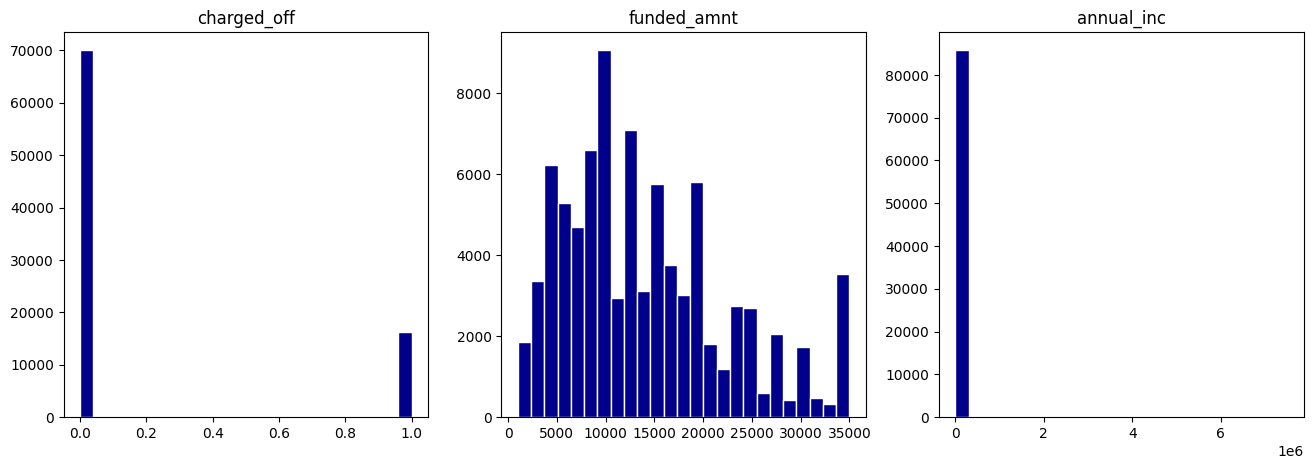

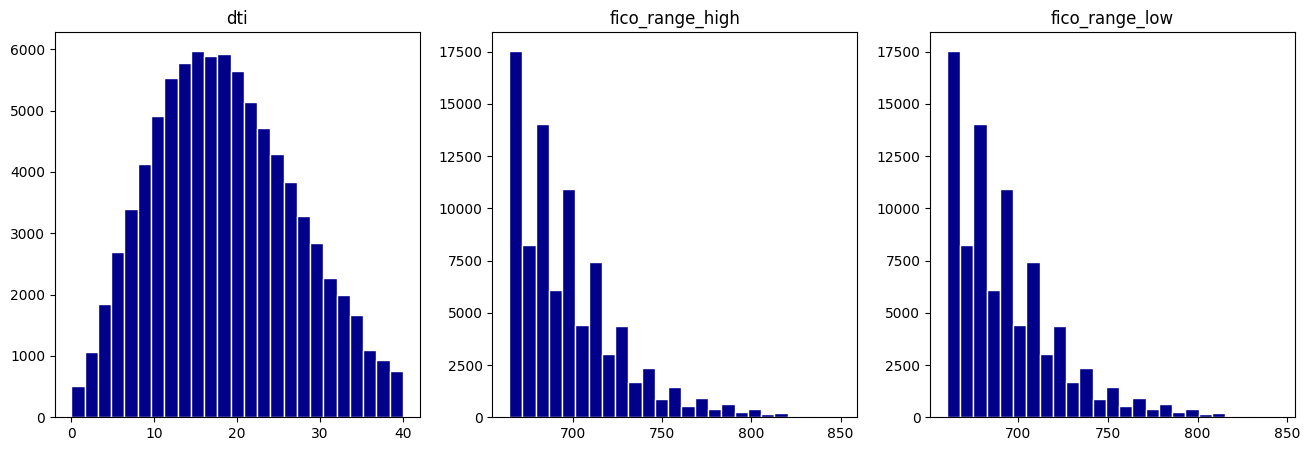

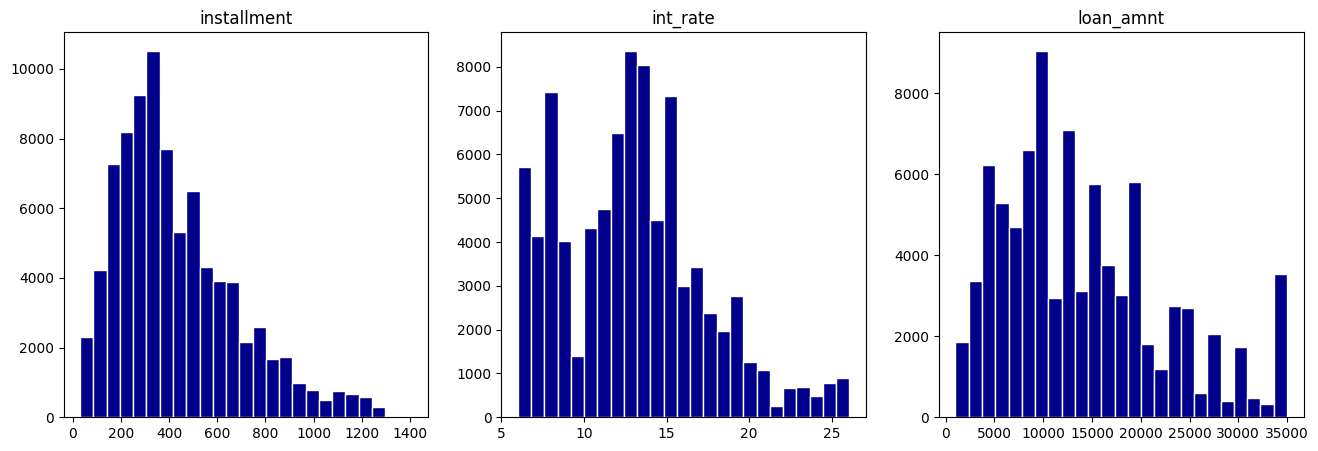

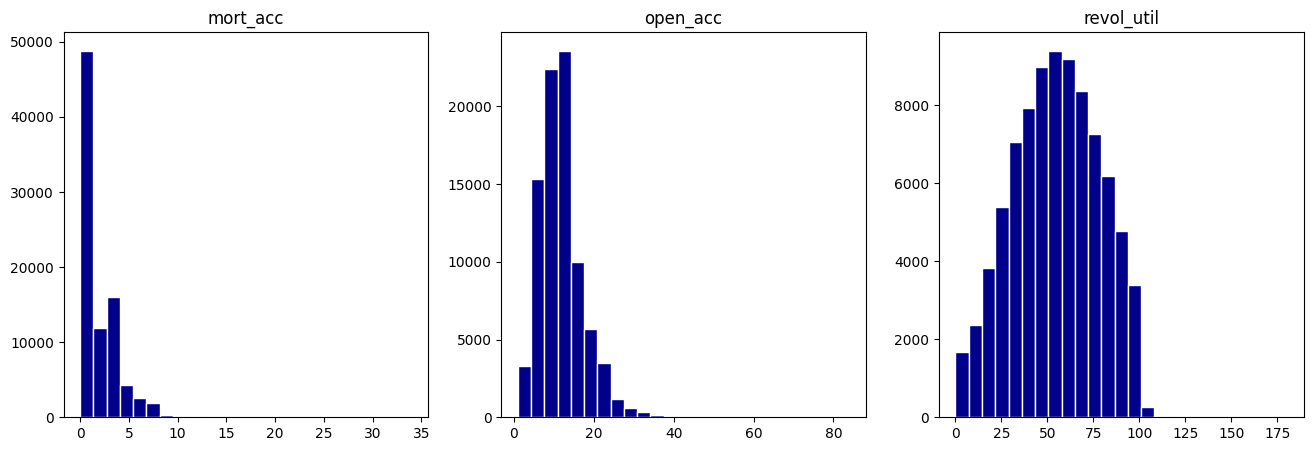

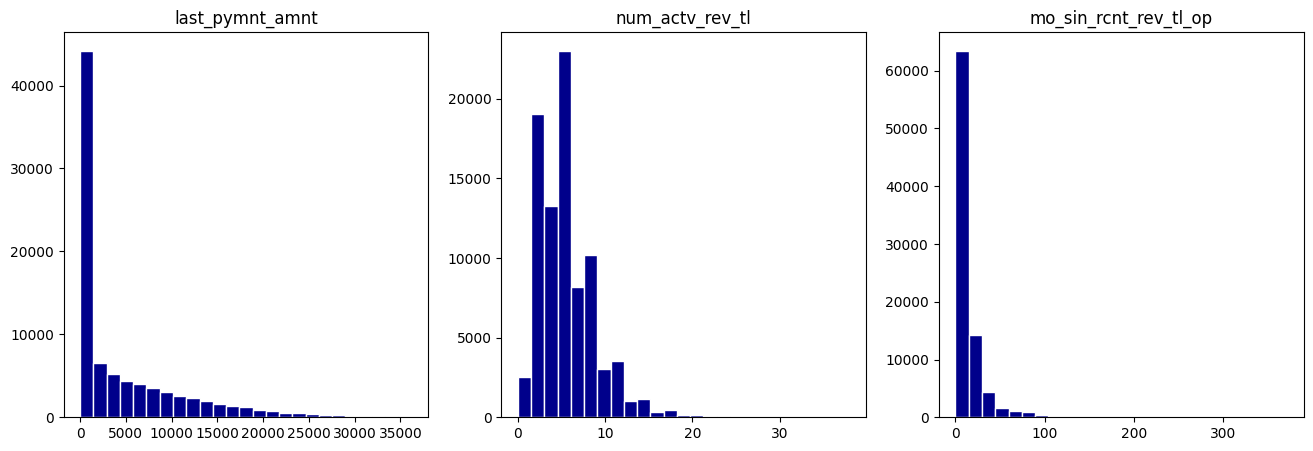

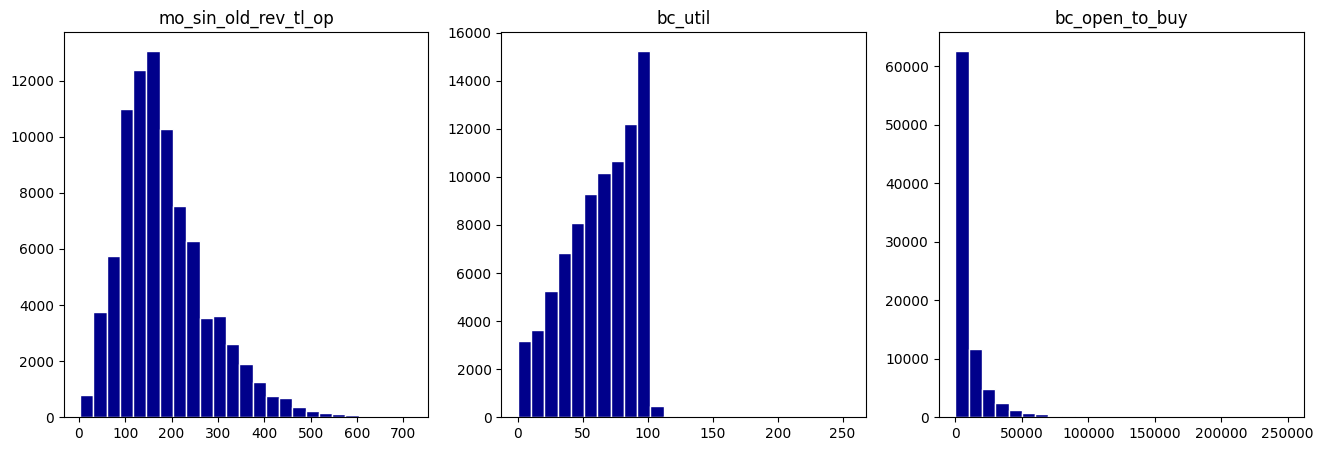

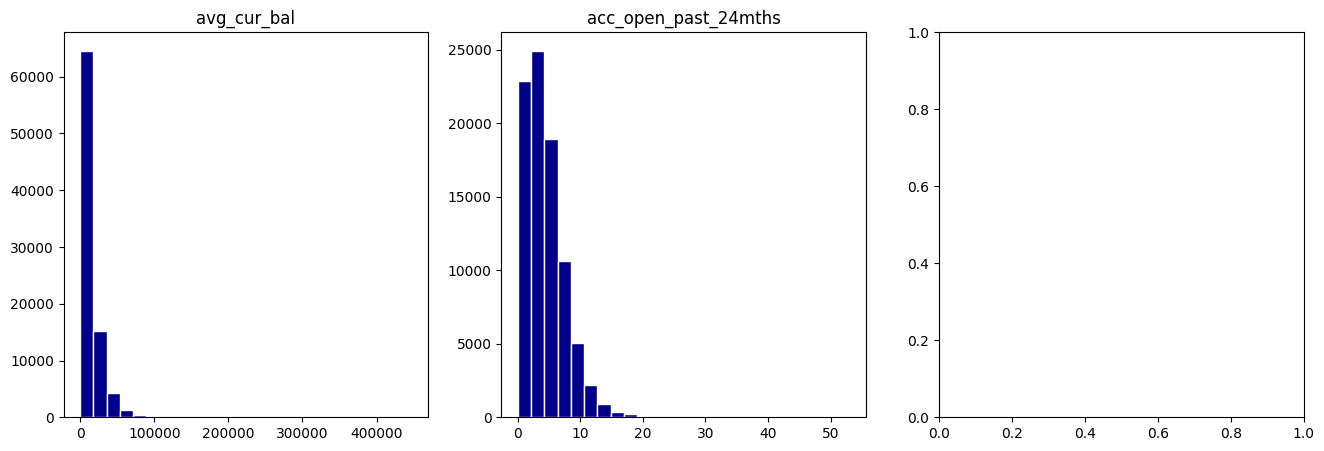

In [30]:
for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(dataset[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(dataset[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(dataset[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i])
    ax[1].set_title(numerical_columns[i+1])
    

Anuual inc, avg_cur_bal, mo_sin_rcnt_rev_tl_op look biased, because there are several observations with extreme values. Therefore, taking logarithm should help to stabilize them.

Several other features seem to be distributed log-normally; logarithm also 

We are taking logarithms of features below:

In [31]:
def draw_feature_and_log_hist(feature, bins_ = 25):
    """
    This function draws histogram of a feature and its logarithm
    It helps to fix numerical features
    """
    fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=False)
    
    ax[0].hist(dataset[feature], color = 'darkblue', edgecolor = 'white', bins = bins_)
    ax[1].hist(np.log1p(dataset[feature]), color = 'darkblue', edgecolor = 'white', bins = bins_)
        
    ax[0].set_title(feature)
    ax[1].set_title('log_'+feature)


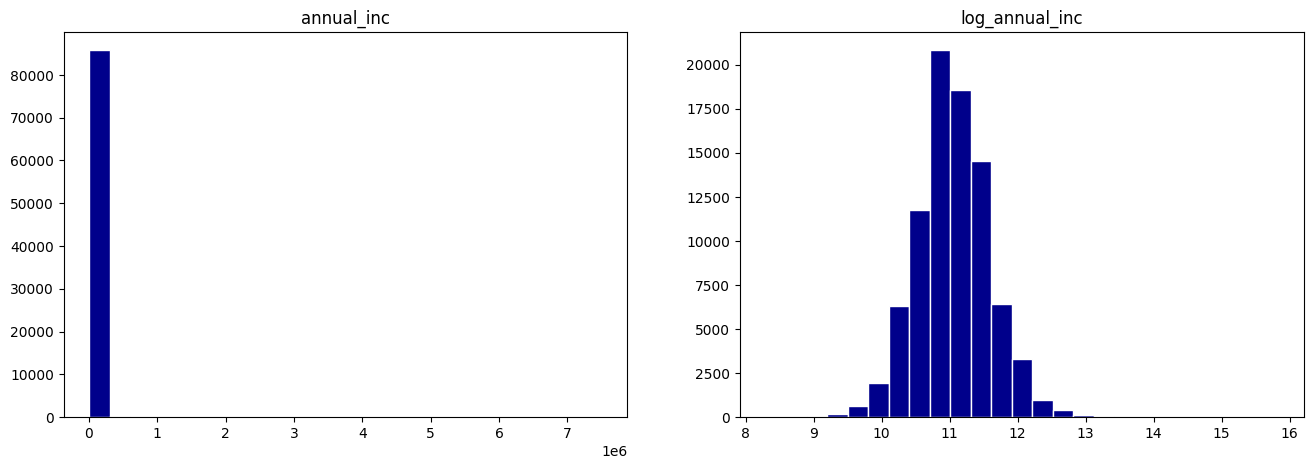

In [32]:
draw_feature_and_log_hist('annual_inc')

Looks a lot better now!!!

#### NB: Why Is it important to take logarithm from some features before standardising?

Because the extreme distrubution will be more normal. This is crucial for some models

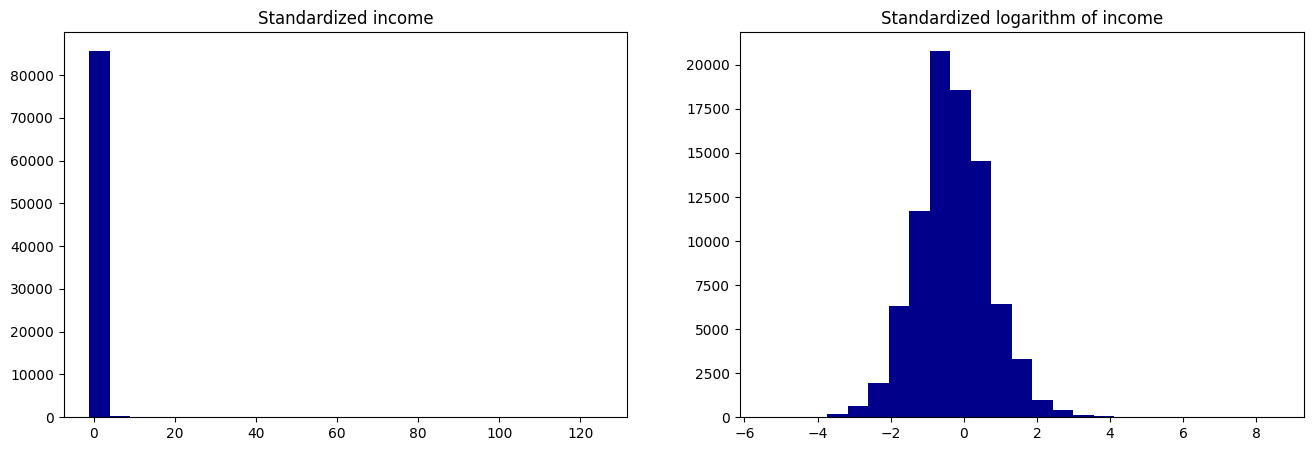

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=False)

ax[0].hist((dataset['annual_inc'] - dataset['annual_inc'].mean())/ dataset['annual_inc'].std(), bins = 25, color = 'darkblue')
ax[0].set_title('Standardized income')

ax[1].hist((np.log1p(dataset['annual_inc']) - np.log1p(dataset['annual_inc'].mean()))/ np.log1p(dataset['annual_inc']).std(), bins = 25, 
           color = 'darkblue')

ax[1].set_title('Standardized logarithm of income');

#### Going back to logarithms:

We definitely change Installment feature

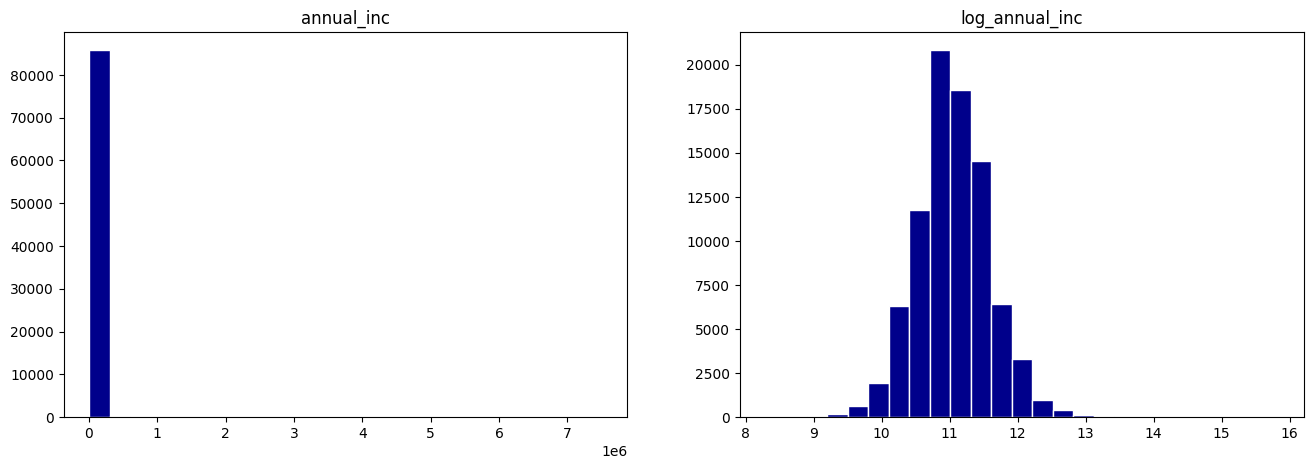

In [34]:
draw_feature_and_log_hist('annual_inc')

# add feature to dataset and remove the usual one
dataset['log_annual_inc'] = np.log1p(dataset['annual_inc'])
dataset = dataset.drop(columns = ['annual_inc'])

# add name to our numerical_feature list and remove old one
numerical_columns.remove('annual_inc')
numerical_columns.append('log_annual_inc')

Changing 'installment' also seems like a good decision, because the data becomes less skewed

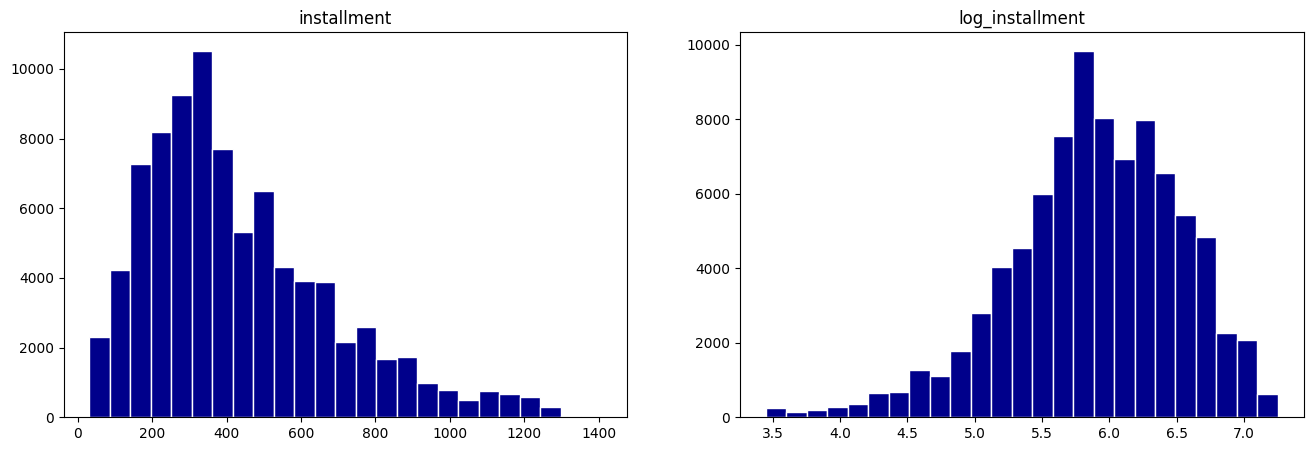

In [35]:
draw_feature_and_log_hist('installment')

# add feature to dataset and remove the usual one
dataset['log_installment'] = np.log1p(dataset['installment'])
dataset = dataset.drop(columns = ['installment'])

# add name to our numerical_feature list and remove old one
numerical_columns.remove('installment')
numerical_columns.append('log_installment')

Changing mort_acc also removes a hge portion of skeweness and makes the feature more balanced

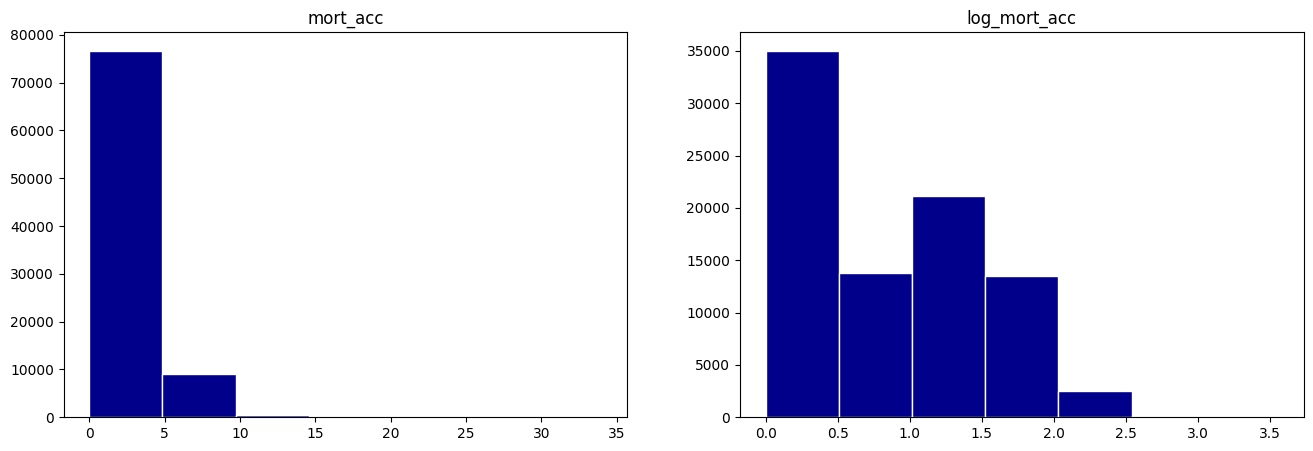

In [36]:
draw_feature_and_log_hist('mort_acc', bins_ = 7)

feature = 'mort_acc'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

Logarithms normalises open_acc featuer as well making its extreme values more stable, therefore it is a good idea to logarithmise it

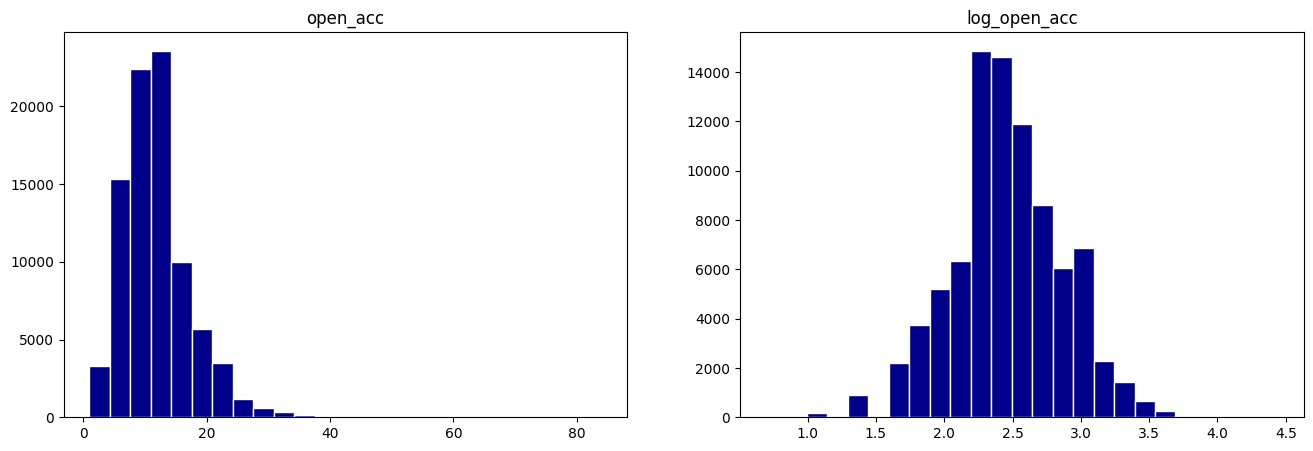

In [37]:
draw_feature_and_log_hist('open_acc')

feature = 'open_acc'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

'revol_util' feature looks worse with logarithm, however, it has an observation around 175. It is outlier. This outlier should be removed

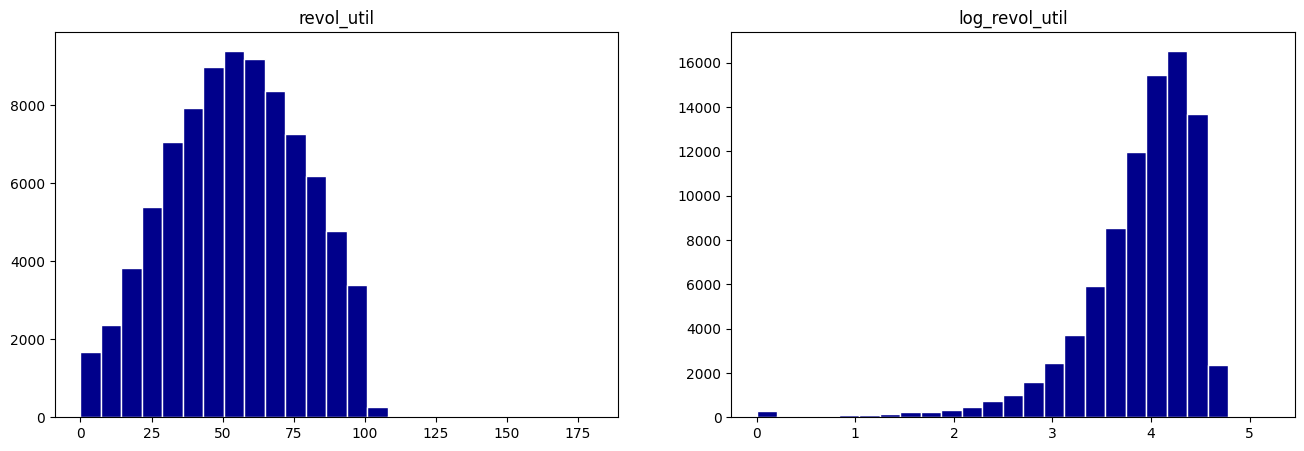

In [38]:
draw_feature_and_log_hist('revol_util')

In [39]:
# several extreme values are made equal to the lowest of them
dataset.loc[dataset['revol_util']>dataset['revol_util'].quantile(0.9995),'revol_util'] = dataset['revol_util'].quantile(0.9995)

Distribution of feature 'last_pymnt_amnt' changes drastically after taking logarithm and becomes a lot clearer. Hence, taking logarithm will enhance quality of this feature.

Note that the new distribution has 2 humps. It indicates that there are 2 types of people: those who pay their last amount equal to some X and equal to some Y. Probably these are those who do regular payments and catch up with their payments after missing them

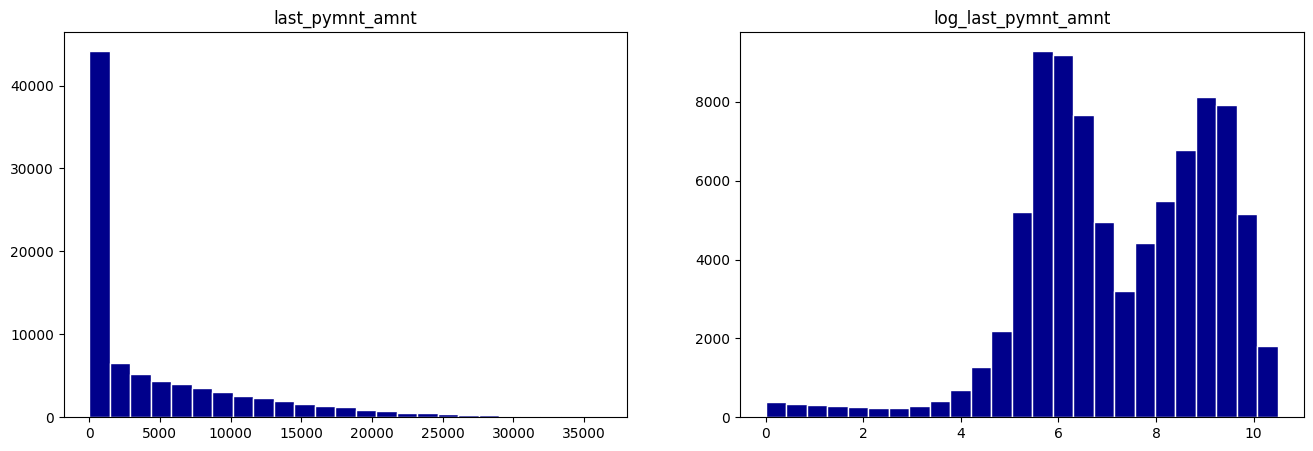

In [40]:
draw_feature_and_log_hist('last_pymnt_amnt')

feature = 'last_pymnt_amnt'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

'num_actv_rev_tl' requires removal of extreme features

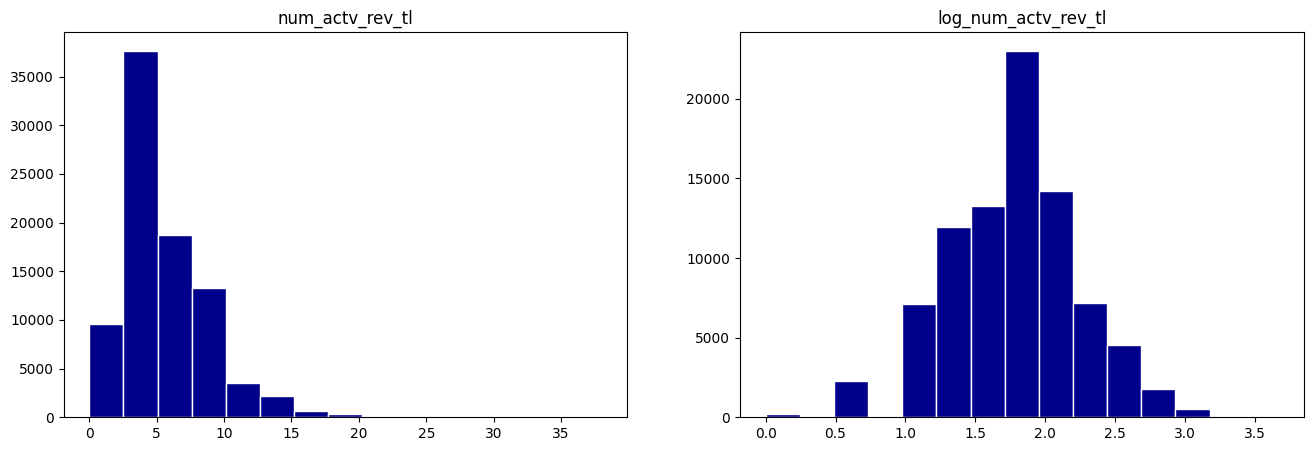

In [41]:
draw_feature_and_log_hist('num_actv_rev_tl', bins_=15)

feature = 'num_actv_rev_tl'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

'mo_sin_rcnt_rev_tl_op' requires removal of extreme features through taking logarithm

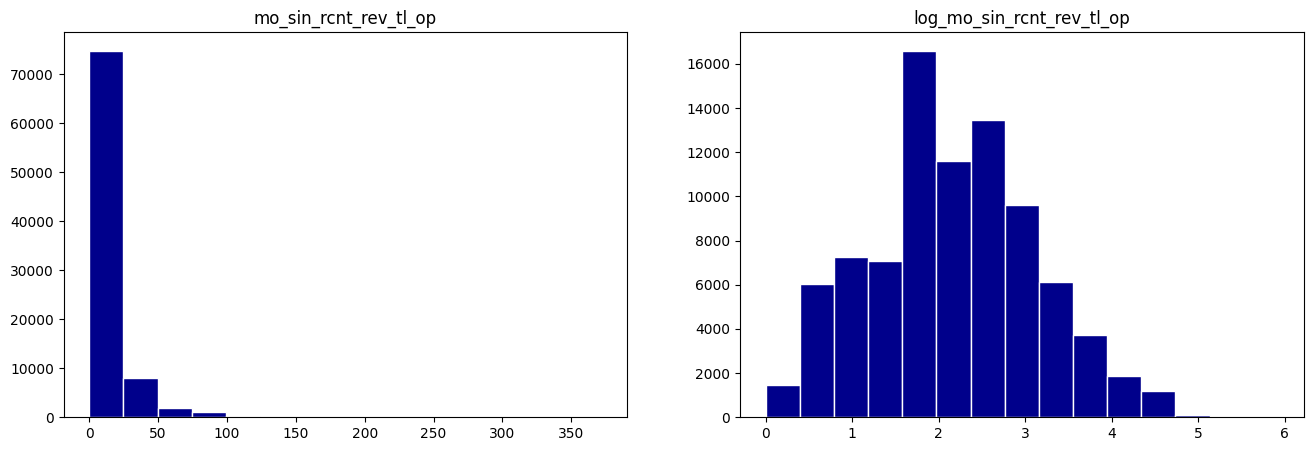

In [42]:
draw_feature_and_log_hist('mo_sin_rcnt_rev_tl_op', bins_=15)

feature = 'mo_sin_rcnt_rev_tl_op'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

'bc_util' looks like it does not need logarithm, but has some outliers. these ouliers are removed by making their values equal to very high quantile of the data

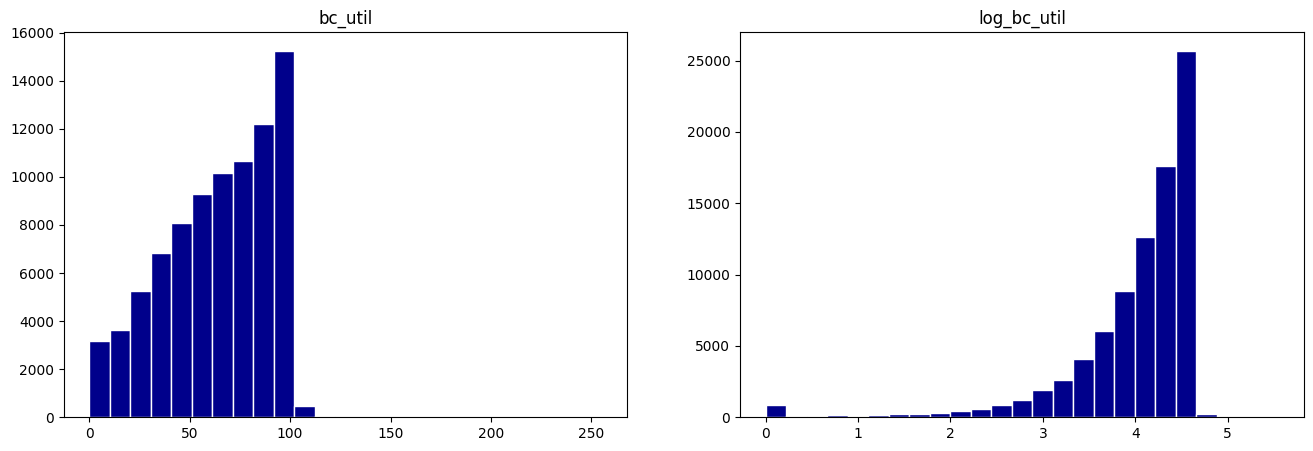

In [43]:
draw_feature_and_log_hist('bc_util')

In [44]:
# several extreme values are made equal to the lowest of them
dataset.loc[dataset['bc_util']>dataset['bc_util'].quantile(0.9995),'bc_util'] = dataset['bc_util'].quantile(0.9995)

'bc_open_to_buy' needs logarithm like man needs air

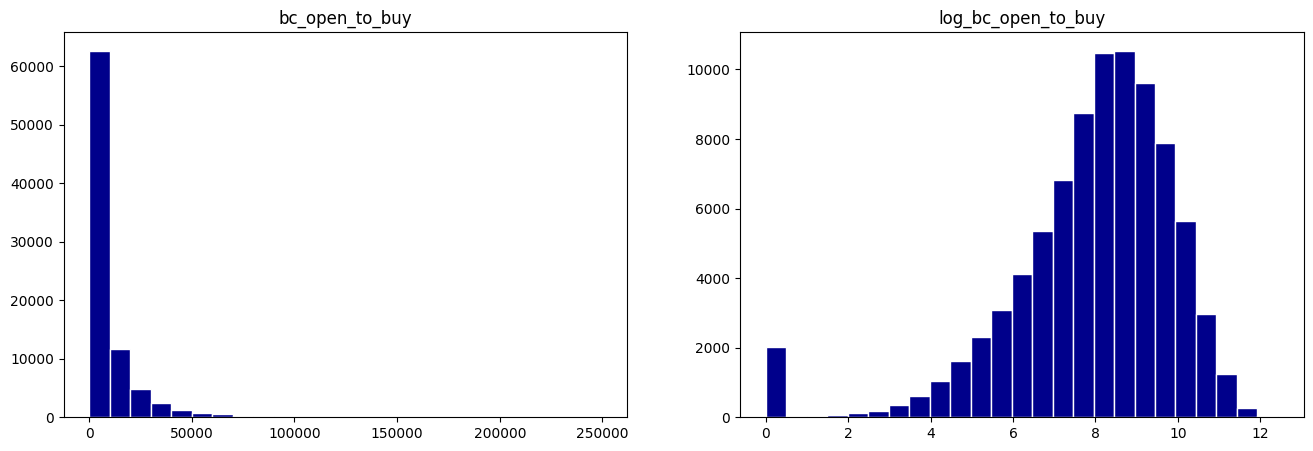

In [45]:
draw_feature_and_log_hist('bc_open_to_buy')

feature = 'bc_open_to_buy'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

Logarithm is needed for 'avg_cur_bal' as well

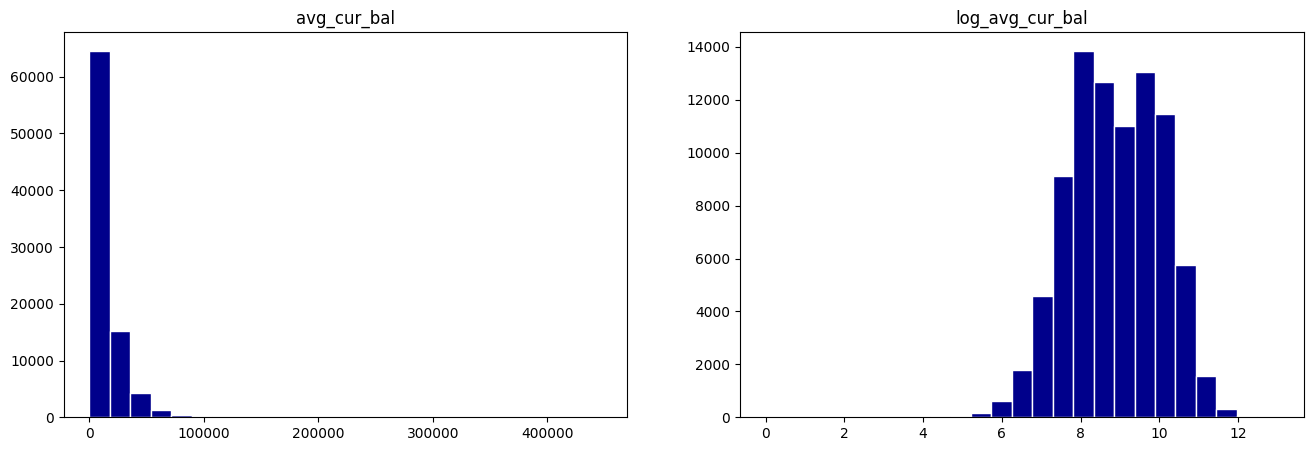

In [46]:
draw_feature_and_log_hist('avg_cur_bal')

feature = 'avg_cur_bal'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

After taking logarithm we spot existence of outliers from 0 to 4. they have to be cleaned

In [47]:
dataset.loc[dataset['log_'+feature]<dataset['log_'+feature].quantile(0.001),'log_'+feature] = dataset['log_'+feature].quantile(0.001)

'acc_open_past_24mths' needs logarithm for decreasing number of extreme values

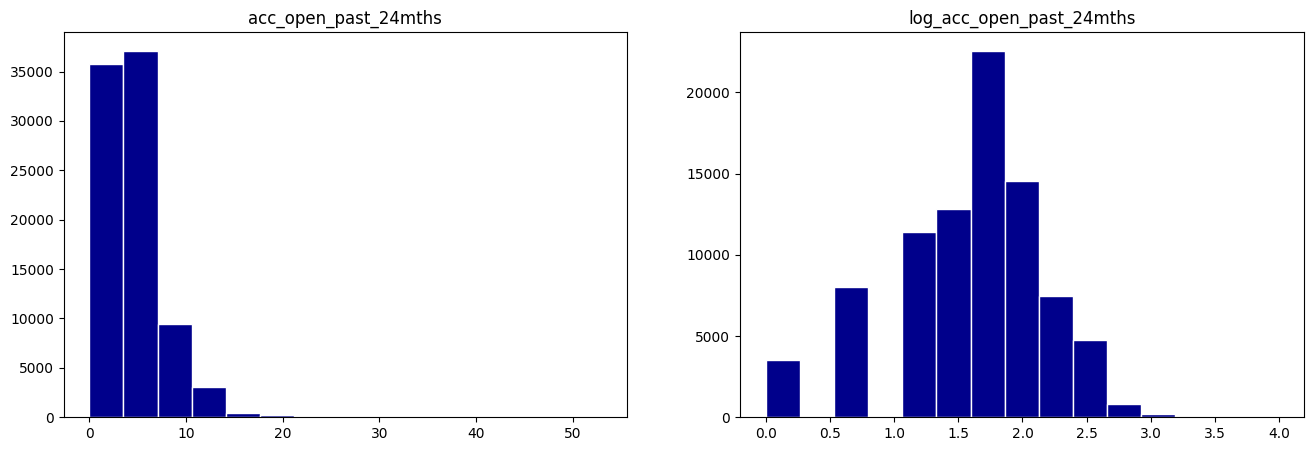

In [48]:
draw_feature_and_log_hist('acc_open_past_24mths', bins_ = 15)

feature = 'acc_open_past_24mths'
# add feature to dataset and remove the usual one
dataset['log_'+feature] = np.log1p(dataset[feature])
dataset = dataset.drop(columns = [feature])

# add name to our numerical_feature list and remove old one
numerical_columns.remove(feature)
numerical_columns.append('log_'+feature)

#### Plot histograms of all numerical features again

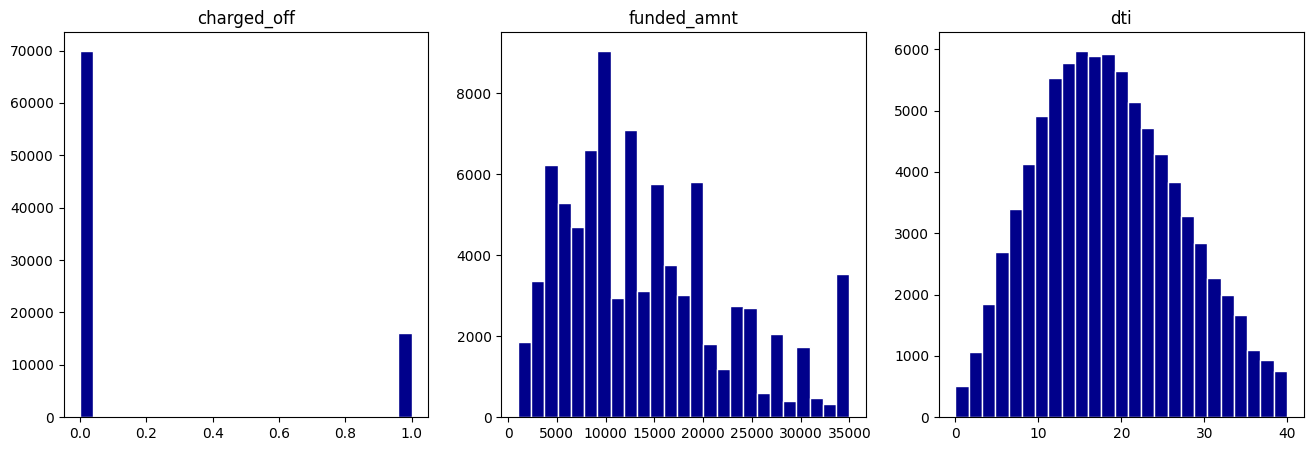

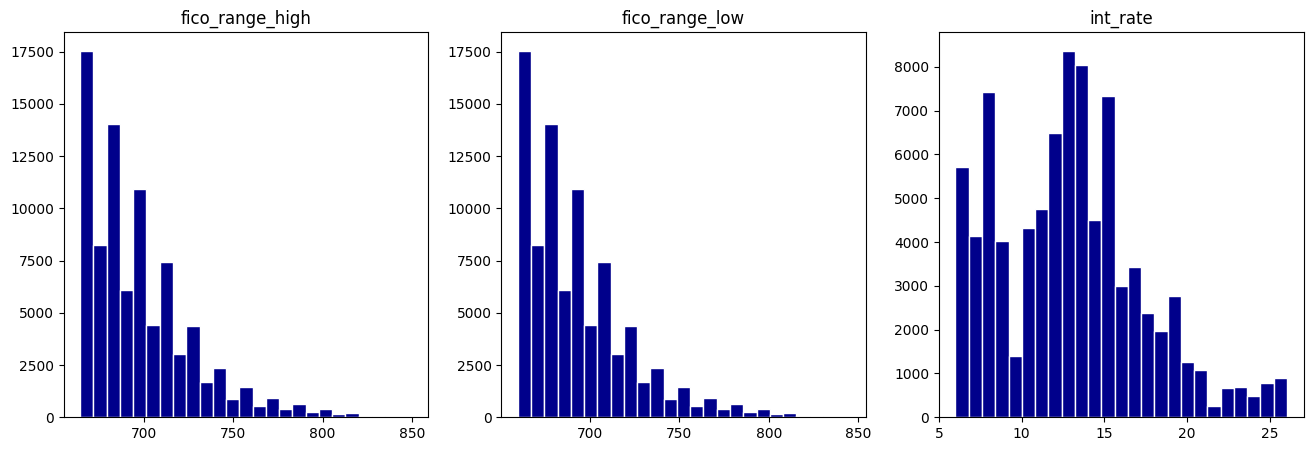

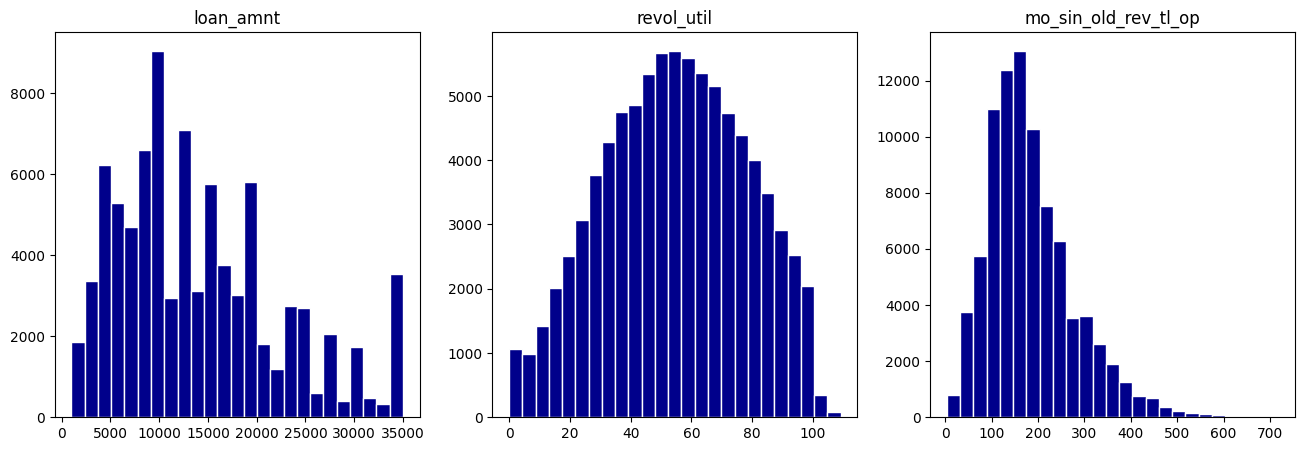

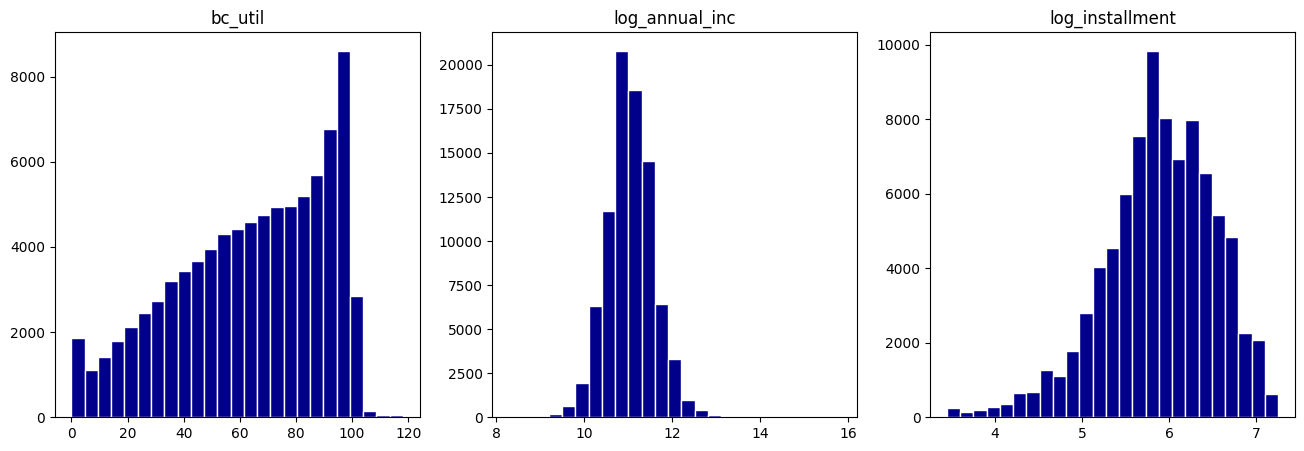

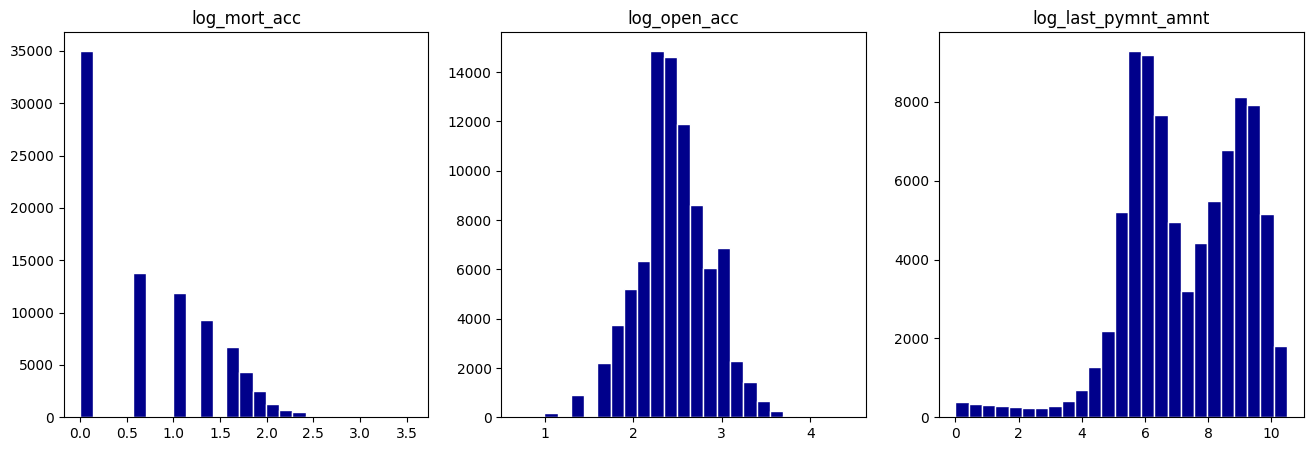

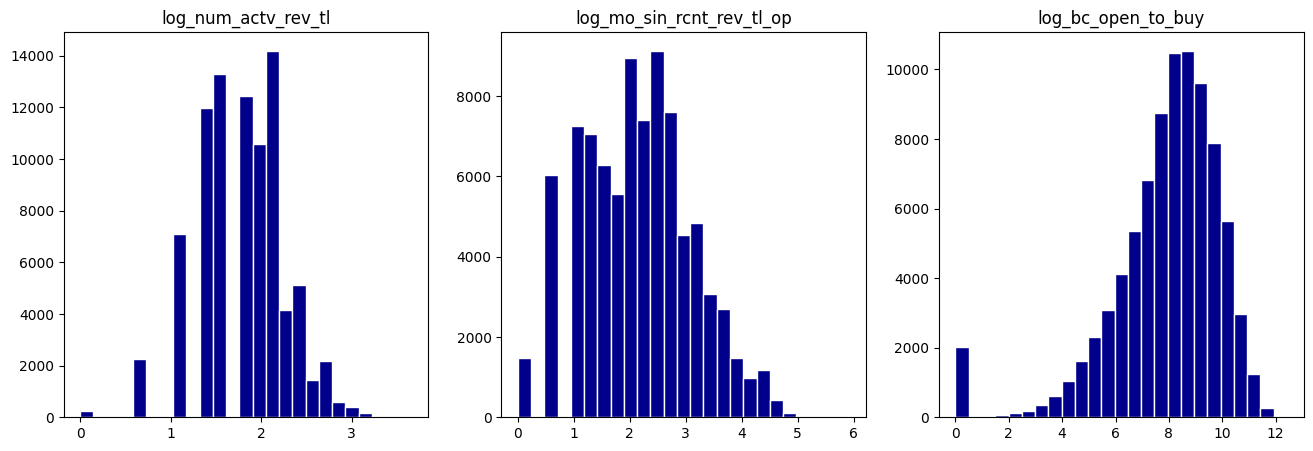

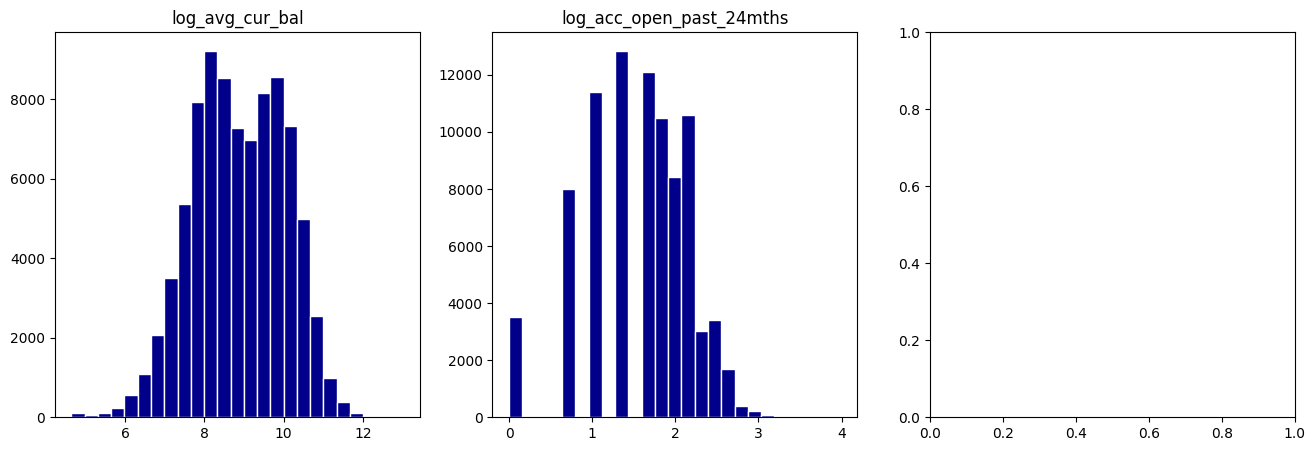

In [49]:
for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(dataset[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(dataset[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(dataset[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i])
    ax[1].set_title(numerical_columns[i+1])

#### Looks gorgeous!

In summary, we took logarithms of some continuous features and trimmed several of them to avoid outliers in the data

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

Make barcharts of categorical featurs.

'zip_code', 'emp_title', 'earliest_cr_line' have many different features => barcharts cannot be made

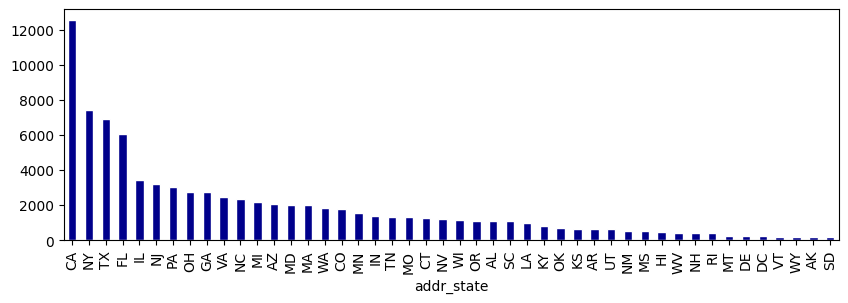

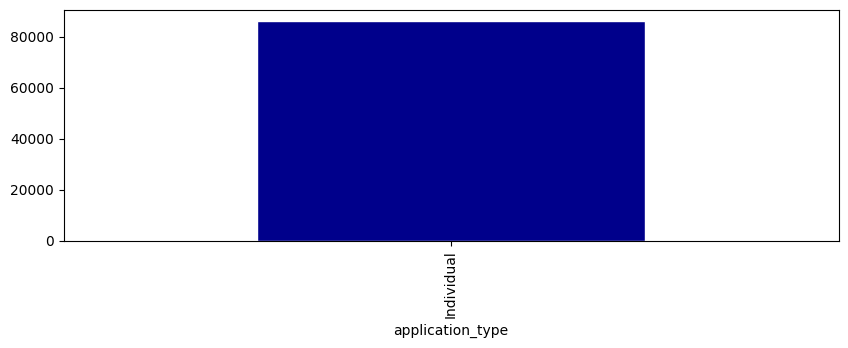

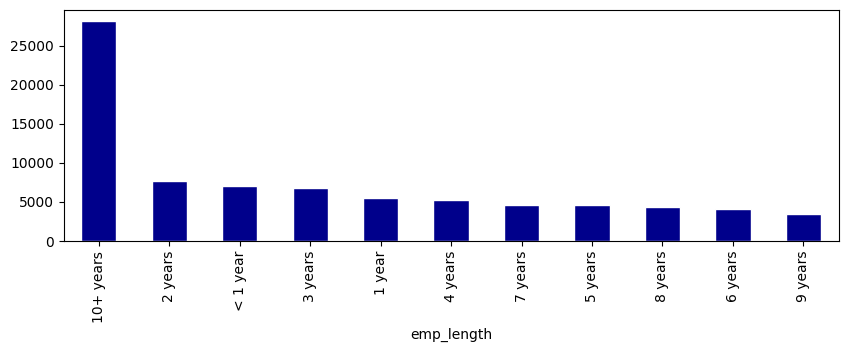

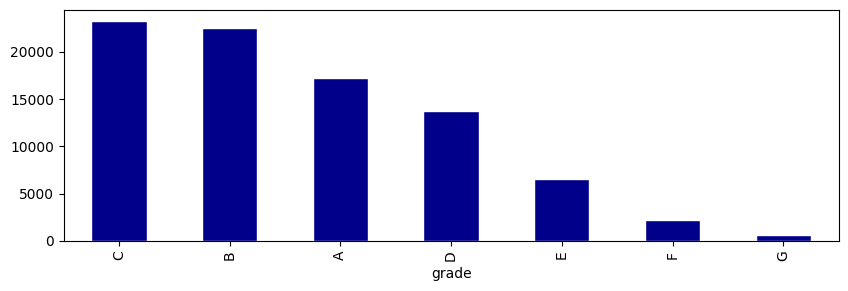

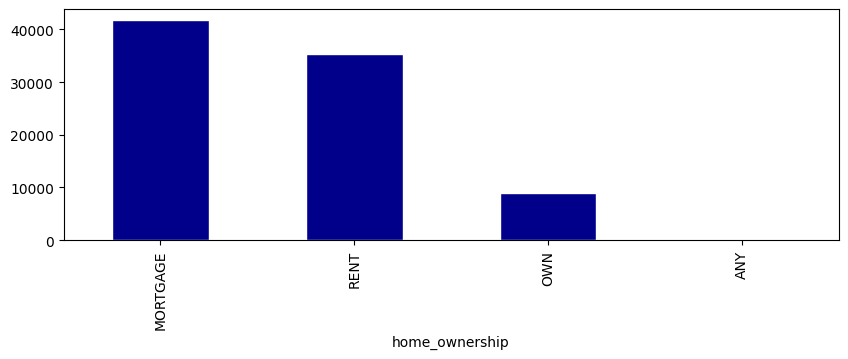

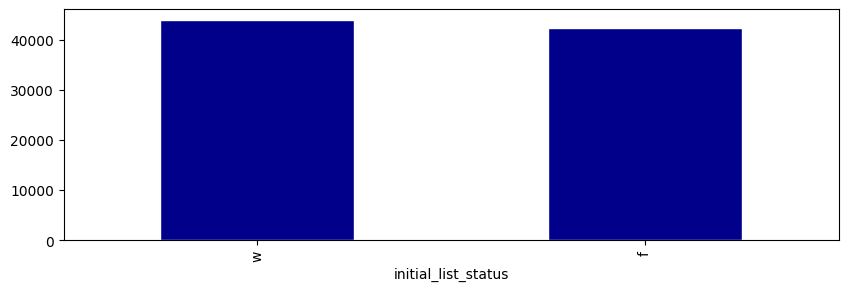

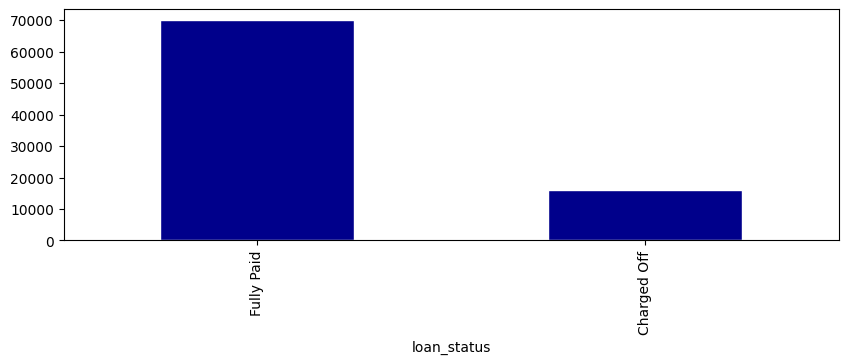

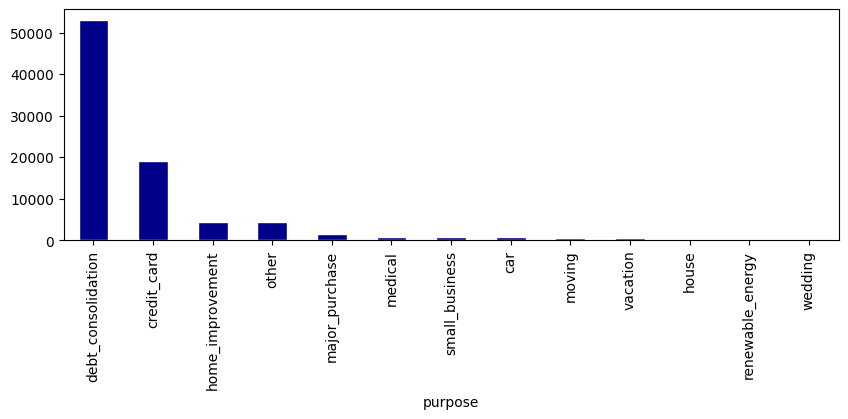

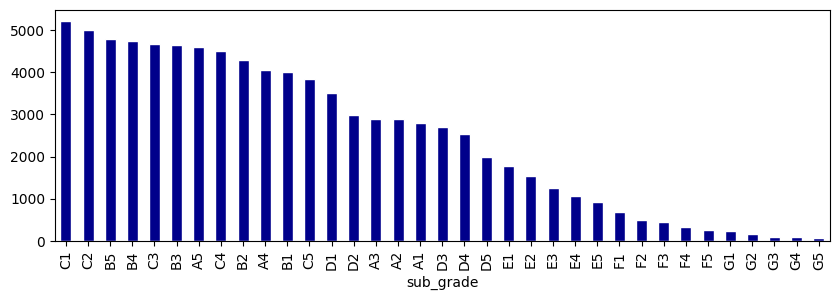

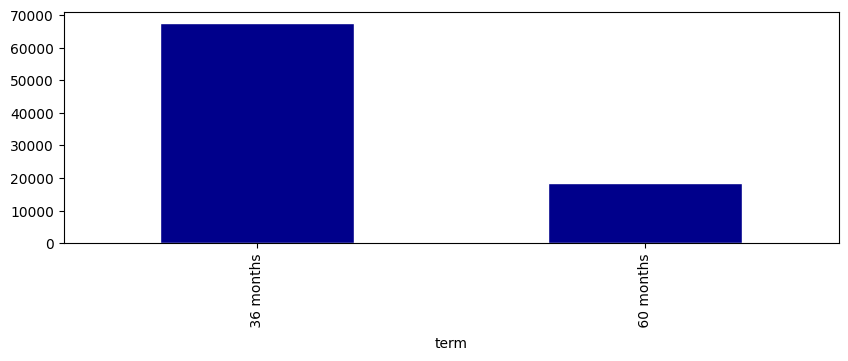

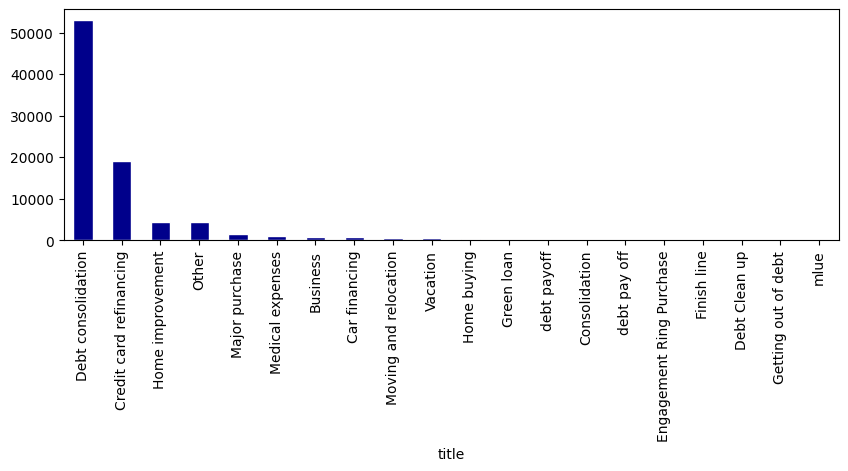

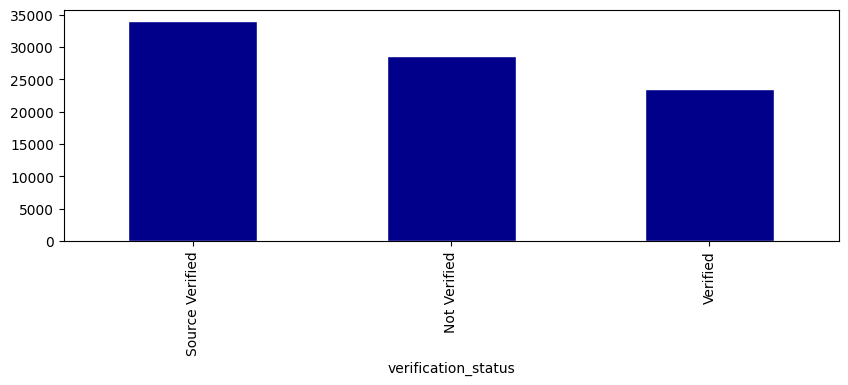

In [50]:
for column in ['addr_state', 'application_type', 'emp_length',
       'grade', 'home_ownership', 'initial_list_status',
       'loan_status', 'purpose', 'sub_grade', 'term', 'title',
       'verification_status']:
    plt.figure(figsize=(10,3))
    dataset[column].dropna().value_counts().plot(kind='bar', color = 'darkblue', edgecolor = 'white')
    plt.show();

In [51]:
categorical_columns

['addr_state',
 'application_type',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'title',
 'verification_status',
 'zip_code']

'addr_state' - state where individual lives. Should be correlated with their income. Can leave 10 most frequesnt states and transfer to dummies; others to one category 'other state'

'application_type' - discard, because has only one value

'earliest_cr_line' - change to datetime type of feature and then to ordinal value. The earlier first credit line weas taken, the more data on individual there is

'emp_length' - change to ordinal value

'emp_title' - job of individual. Should correlate with their salary. There are too many professions to comprehend using one-hot-encoding, therefore, better to delete these features. However, using a clever clustering technique of professions could have used this feature. (for example, cluster professions via bag of words with addition of hierarchical clustering)

'grade' - transfer to ordinal value; looks like grade of credit

'home_ownership' - great feature; if individual has house, they will be more likely to pay credit; save and do one-hot encoding.

'initial_list_status' - one-hot encoding

'loan_status' - discard, because this is y-variable

'purpose' - purpose of taking credit. Leave top-2 most common issues ('debt_consolidation', 'credit_card') and put others to category 'other' in one-hot encoding

'sub_grade' - transfer to ordinal values

'term' - make one-hot encoding, just 2 features representing length of loan

'title' - discard, because this is nearly exact copy of 'purpose'

'verification_status' - looks like important feature that shows whether a person went through KYC procedure. can be important. do one-hot encoding

'zip_code' - discard. Alternatively can be split on latitude and longitude and replace 'addr_state'

In [52]:
column_to_drop = ['application_type', 'emp_title', 'grade', 'loan_status','zip_code']
dataset = dataset.drop(columns = column_to_drop)
for col in column_to_drop:
    categorical_columns.remove(col)

### Convert Term to a numerical feature

In [53]:
dataset['term'] = [int(i[1:3]) for i in dataset['term']]

Basically there are 2 values in column 'term': 60 and 35. We are, therefore, making instead of column 'term' a dummy variable 'term_is_60' for loans that are 60. if loan is 35, value of column = 35

In [54]:
dataset['term_is_60'] = (dataset['term']==60).astype(int)
dataset = dataset.drop(columns = ['term'])

### Decide if you want to do anything to emp_length

'emp_length' should be changed to ordinal values 

In [55]:
dataset.loc[dataset['emp_length']=='< 1 year','emp_length'] = 0
dataset.loc[dataset['emp_length']=='1 year','emp_length'] = 1
dataset.loc[dataset['emp_length']=='2 years','emp_length'] = 2
dataset.loc[dataset['emp_length']=='3 years','emp_length'] = 3
dataset.loc[dataset['emp_length']=='4 years','emp_length'] = 4
dataset.loc[dataset['emp_length']=='5 years','emp_length'] = 5
dataset.loc[dataset['emp_length']=='6 years','emp_length'] = 6
dataset.loc[dataset['emp_length']=='7 years','emp_length'] = 7
dataset.loc[dataset['emp_length']=='8 years','emp_length'] = 8
dataset.loc[dataset['emp_length']=='9 years','emp_length'] = 9
dataset.loc[dataset['emp_length']=='10+ years','emp_length'] = 10

### Is sub_grade worth keeping ?

Yes, it is worth keeping, It is more detailed representation of 'grade' feature. Hence, 'grade' is dropped and 'sub_grade' is transferred to ordinal type of feature

In [56]:
ordinal_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

dataset['sub_grade_ordinal'] = dataset['sub_grade'].map(ordinal_mapping)

In [57]:
dataset = dataset.drop(columns = ['sub_grade'])

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

'addr_state' - state where individual lives. Should be correlated with their income. Can leave 10 most frequesnt states and transfer to dummies; others to one category 'other state'

In [58]:
# Get the 10 most common states
state_counts = Counter(dataset['addr_state'])
most_common_states = dict(state_counts.most_common(10))

# Create a mapping for states
def map_states(state):
    return state if state in most_common_states else 'other state'

# Apply the mapping to create a new column
dataset['addr_state_mapped'] = dataset['addr_state'].apply(map_states)

In [59]:
# drop old column
dataset = dataset.drop(columns = ['addr_state'])

In [60]:
# add dummies for 11 states
dataset = pd.concat([dataset,pd.get_dummies(dataset['addr_state_mapped'], prefix='addr_state').astype(int)],axis = 1)

In [61]:
# drop column addr_state_mapped
dataset = dataset.drop(columns = ['addr_state_mapped'])

'earliest_cr_line' - change to datetime type of feature and then to ordinal value. The earlier first credit line weas taken, the more data on individual there is

In [62]:
# make dates
dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'], format='%b-%Y')

In [63]:
# Convert the datetime to ordinal values
dataset['earliest_cr_line'] = dataset['earliest_cr_line'].apply(lambda x: x.toordinal())-700000

'home_ownership' - great feature; if individual has house, they will be more likely to pay credit; save and do one-hot encoding.

In [64]:
# make 1 ANY observation into the most popular one 'mortgage'
dataset['home_ownership'] = dataset['home_ownership'].replace({'ANY': 'MORTGAGE'})

#one-hot encoding
home_ownership_dummies = pd.get_dummies(dataset['home_ownership'], prefix='ownership').astype(int)

#concatenate the one-hot encoded columns to the original dataset
dataset = pd.concat([dataset, home_ownership_dummies], axis=1)

#drop the original 'home_ownership' column
dataset = dataset.drop(columns=['home_ownership'])

'initial_list_status' - one-hot encoding

In [65]:
dataset.loc[dataset['initial_list_status']=='f','initial_list_status'] = 0
dataset.loc[dataset['initial_list_status']=='w','initial_list_status'] = 1

'purpose' - purpose of taking credit. Leave top-2 most common issues ('debt_consolidation', 'credit_card') and put others to category 'other', then do  one-hot encoding

In [66]:
top_two_categories = ['debt_consolidation', 'credit_card']

# replace other categories with 'other'
dataset['purpose_mapped'] = dataset['purpose'].apply(
    lambda x: x if x in top_two_categories else 'other'
)

# one-hot encoding
purpose_dummies = pd.get_dummies(dataset['purpose_mapped'], prefix='purpose').astype(int)

# concatenate the one-hot encoded columns to the original dataset
dataset = pd.concat([dataset, purpose_dummies], axis=1)

# drop the original 'purpose' and 'purpose_mapped' columns
dataset = dataset.drop(columns=['purpose', 'purpose_mapped'])

'title' - discard, because this is nearly exact copy of 'purpose'

In [67]:
dataset = dataset.drop(columns = ['title'])

'verification_status' - looks like important feature that shows whether a person went through KYC procedure. can be important. do one-hot encoding

In [68]:
verification_status_dummies = pd.get_dummies(dataset['verification_status'], prefix='verification').astype(int)
dataset = pd.concat([dataset, verification_status_dummies], axis=1)
dataset = dataset.drop(columns=['verification_status'])

#### Finally, plot the histograms again,. Now of all features

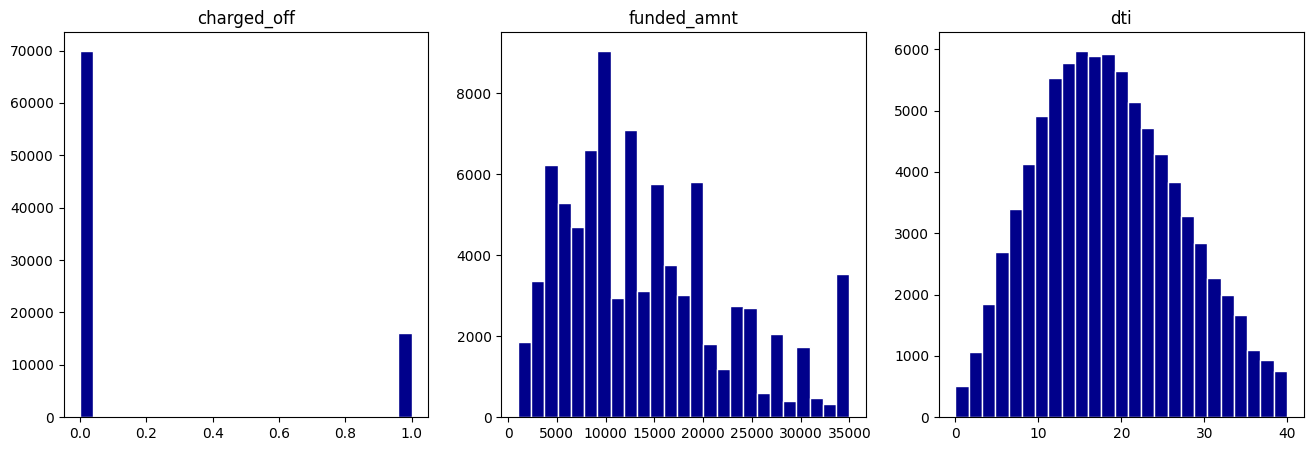

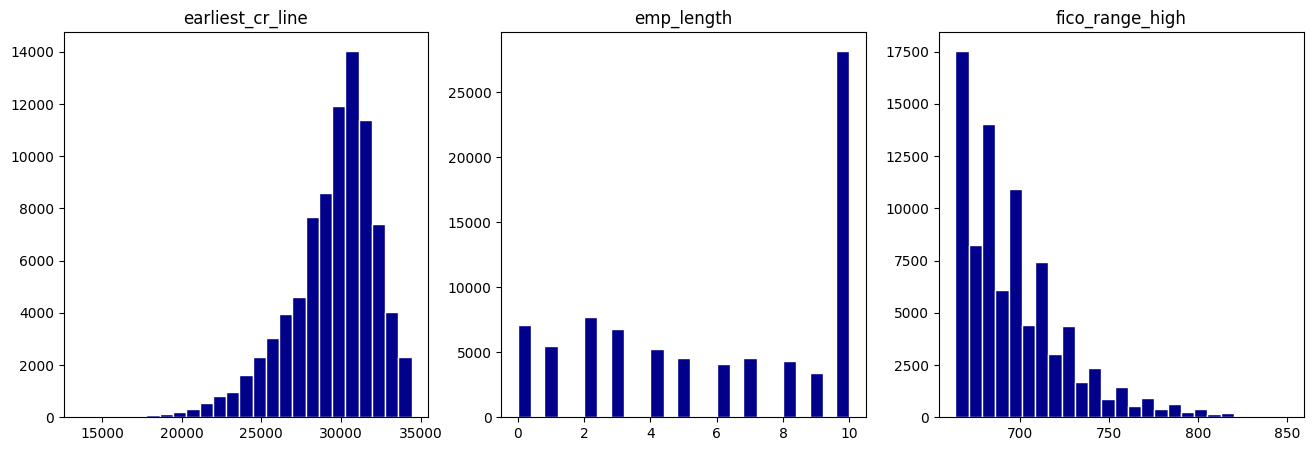

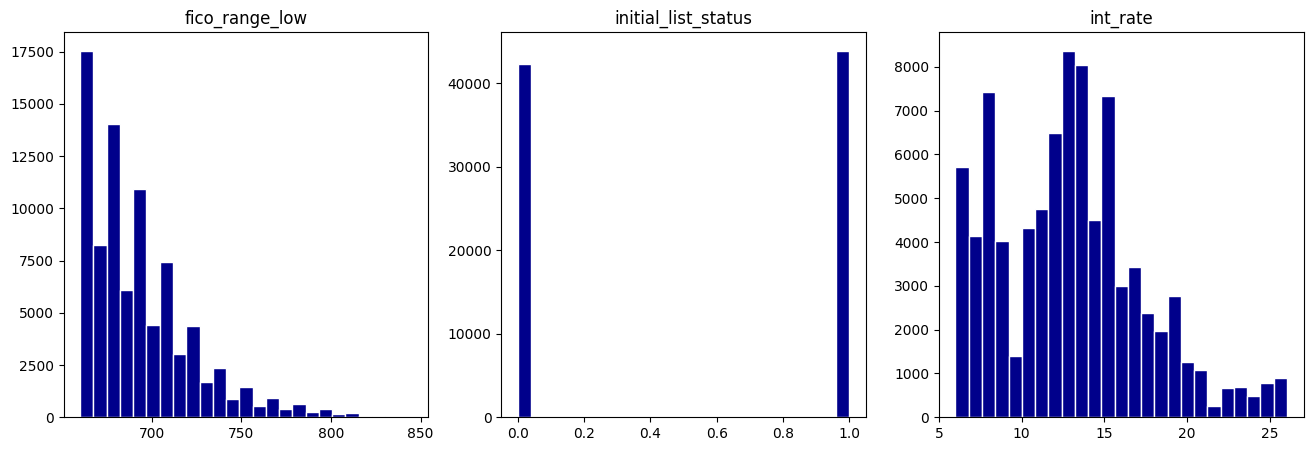

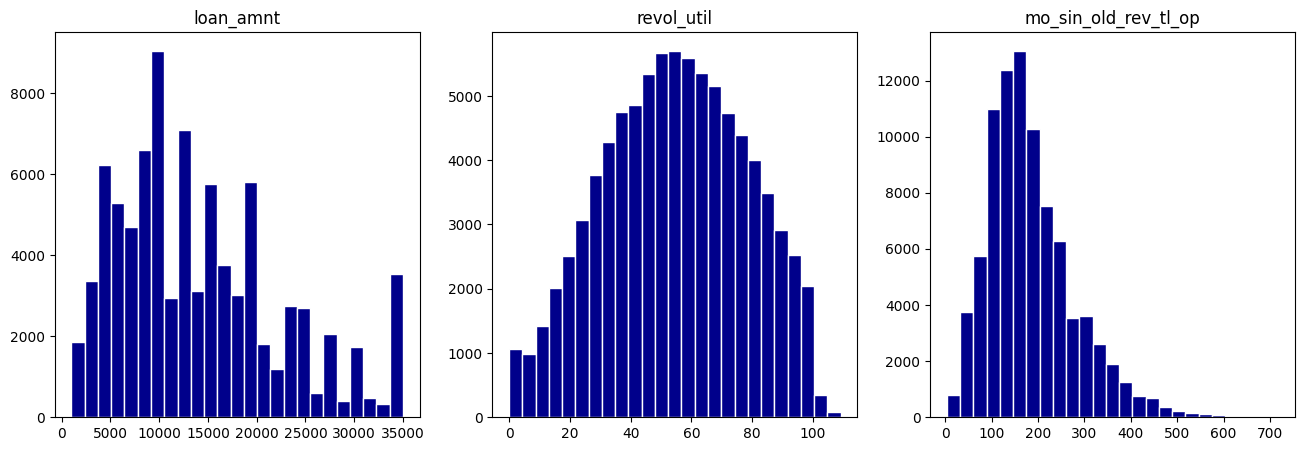

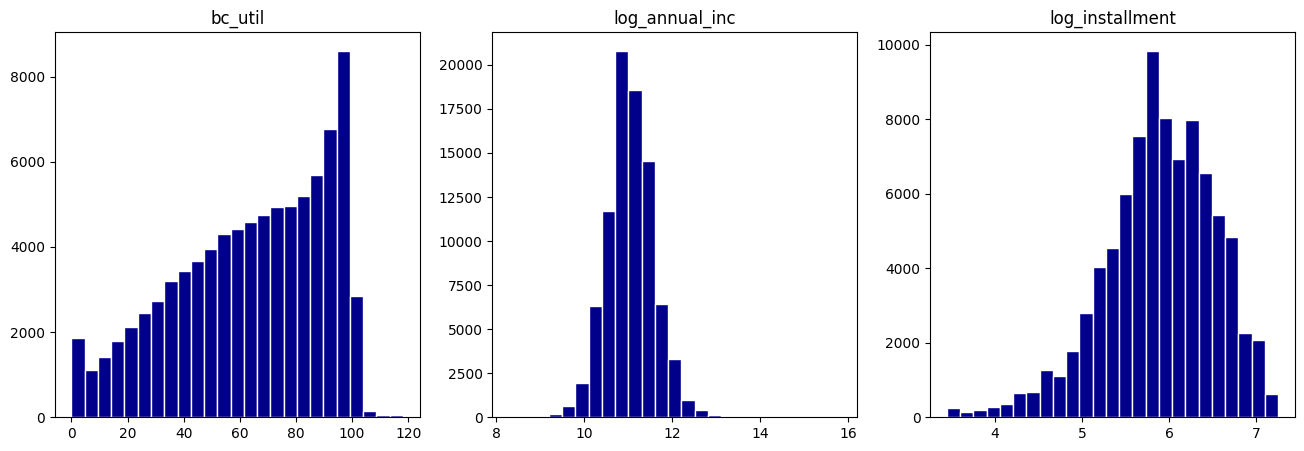

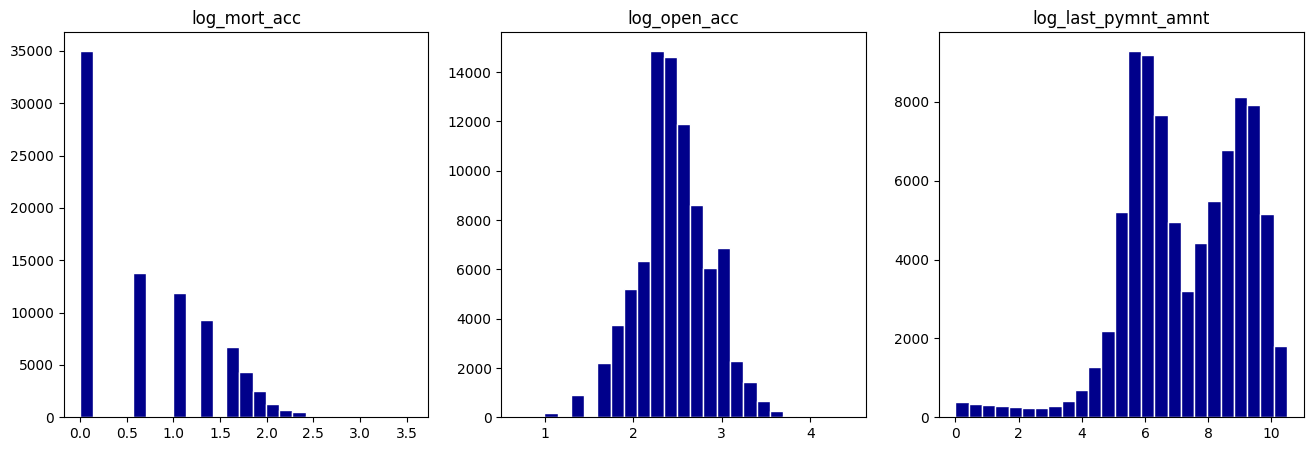

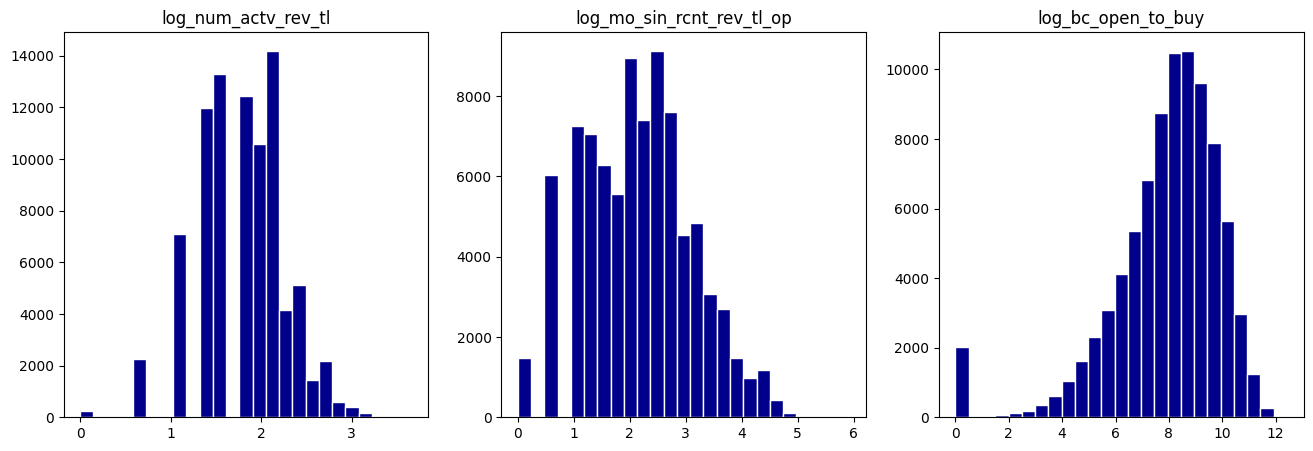

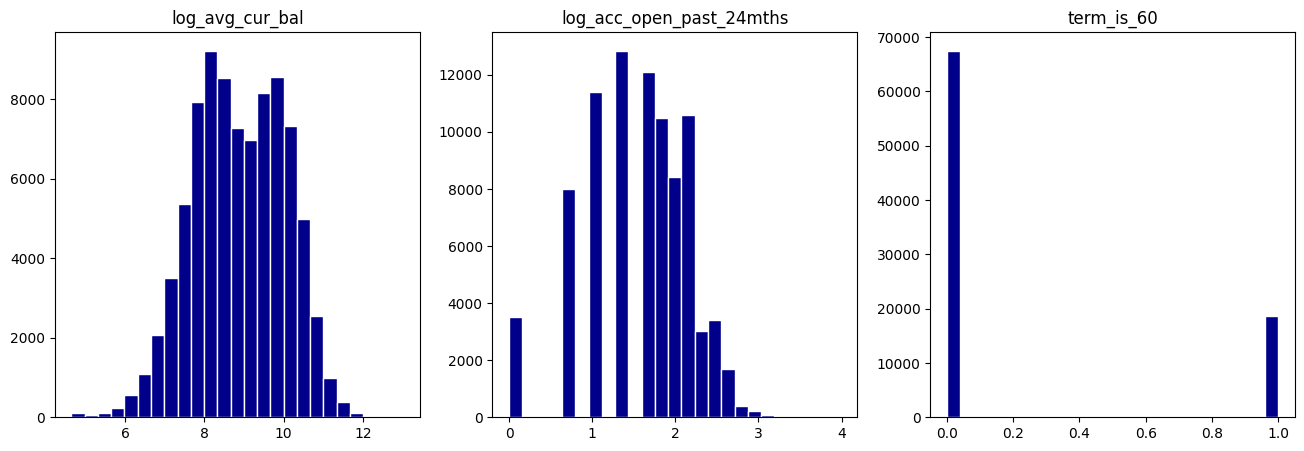

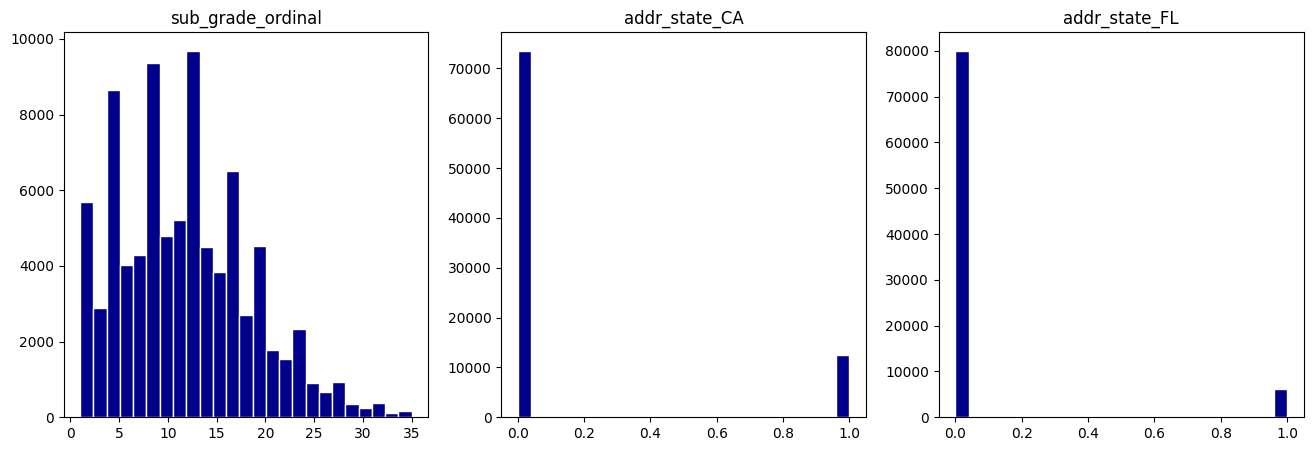

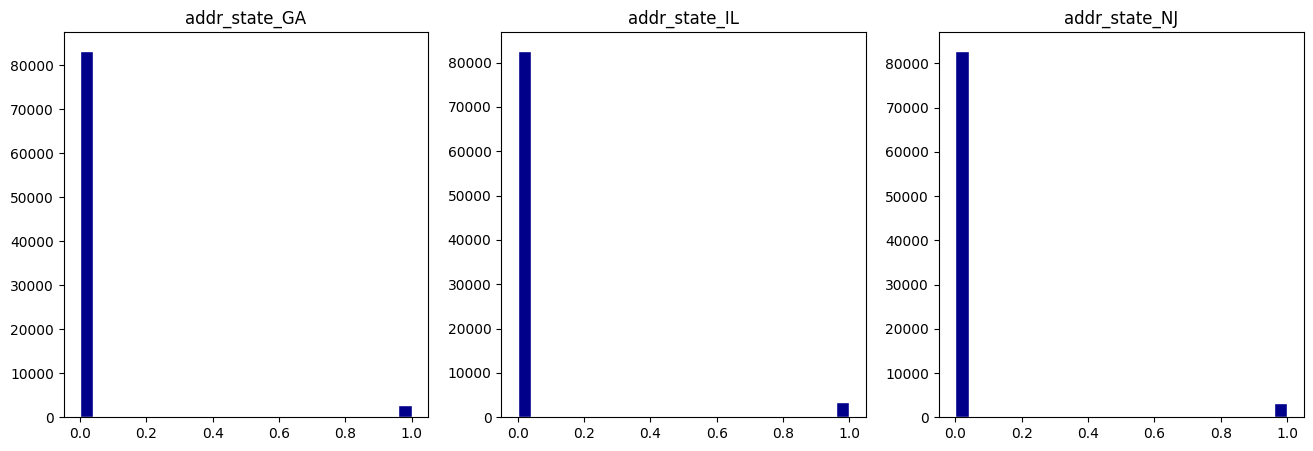

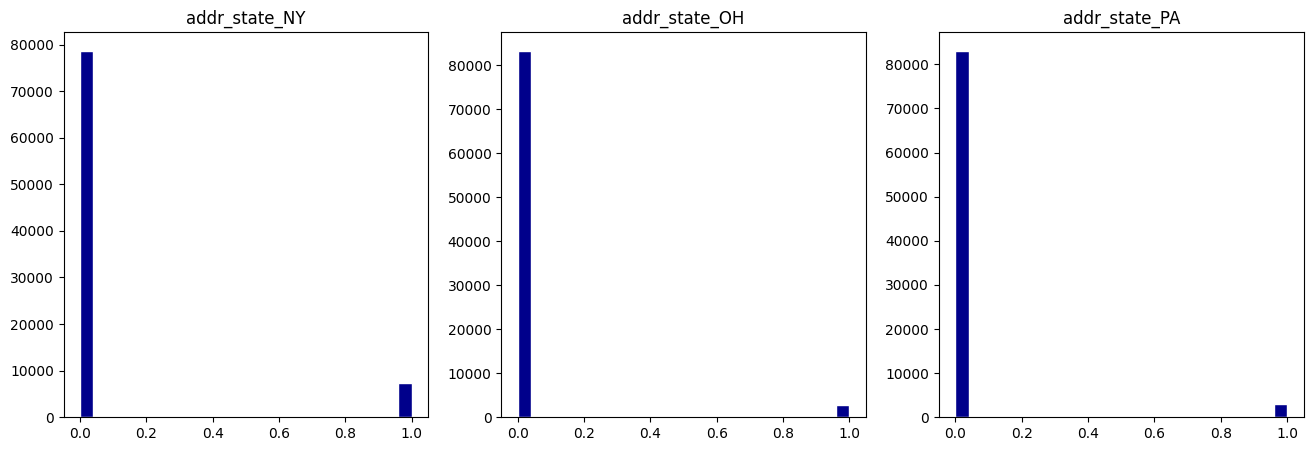

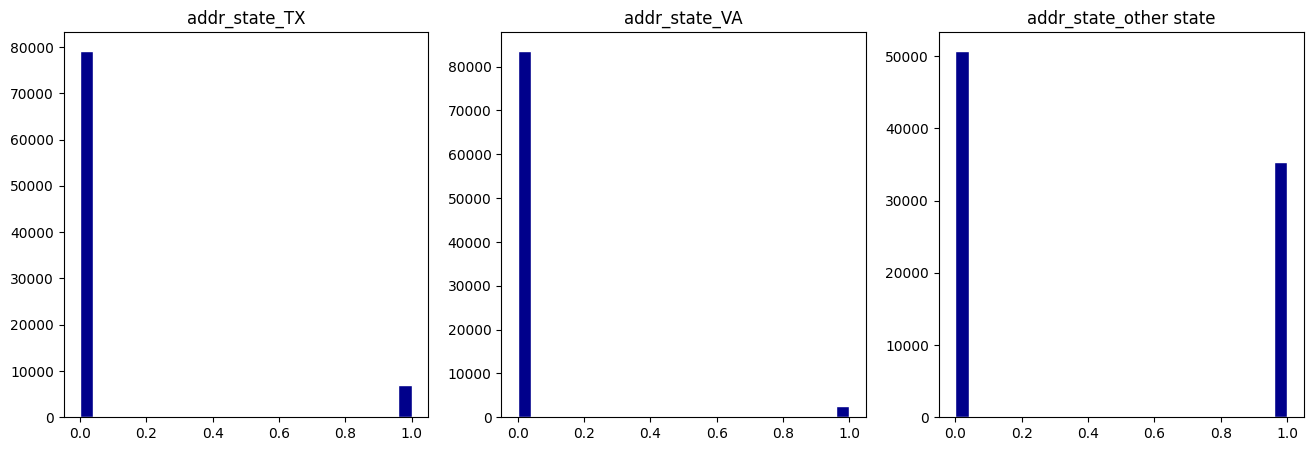

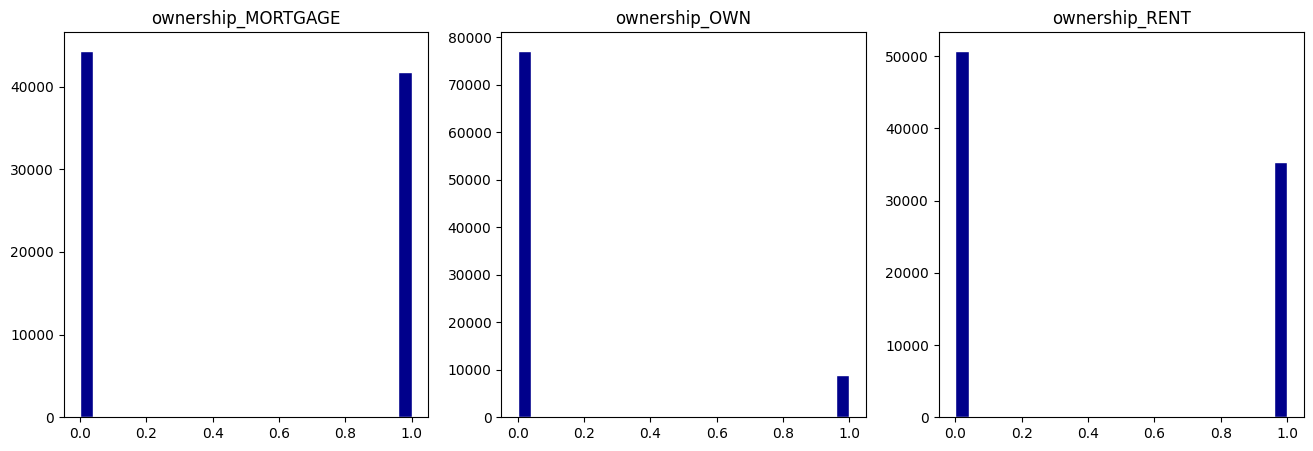

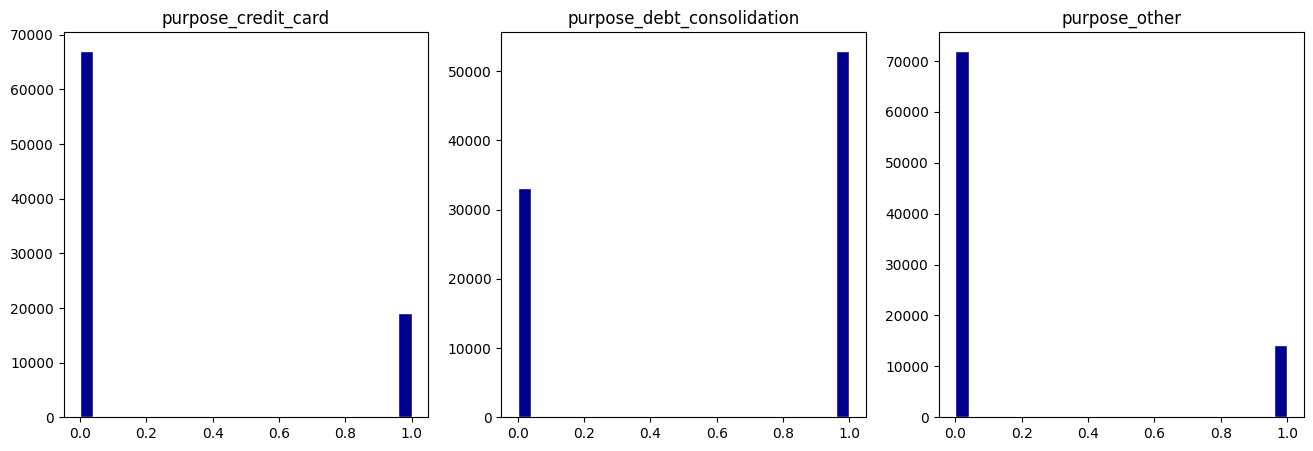

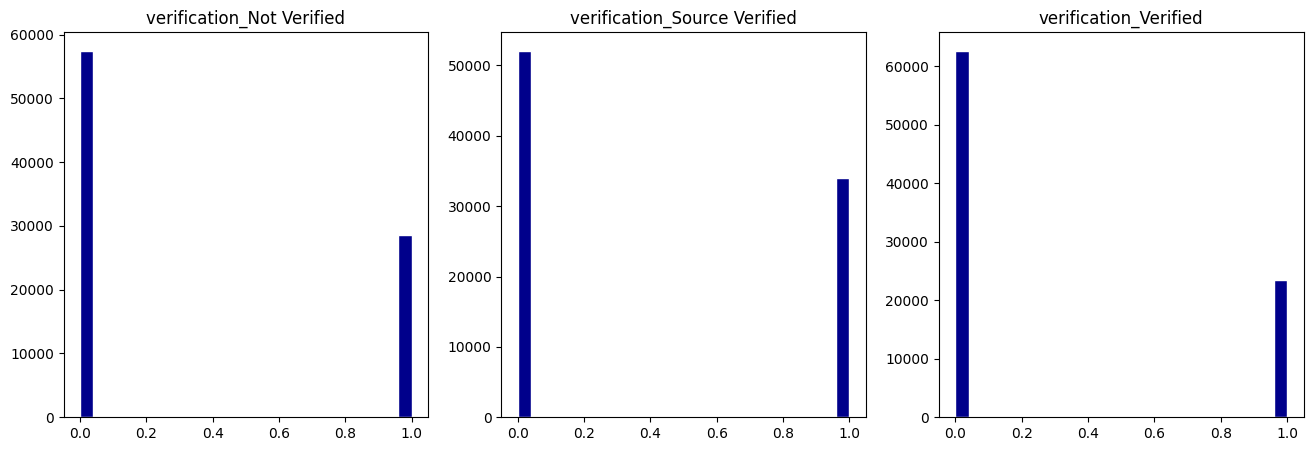

In [69]:
numerical_columns = dataset.columns
for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(dataset[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(dataset[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(dataset[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i])
    ax[1].set_title(numerical_columns[i+1])

draw correlogram

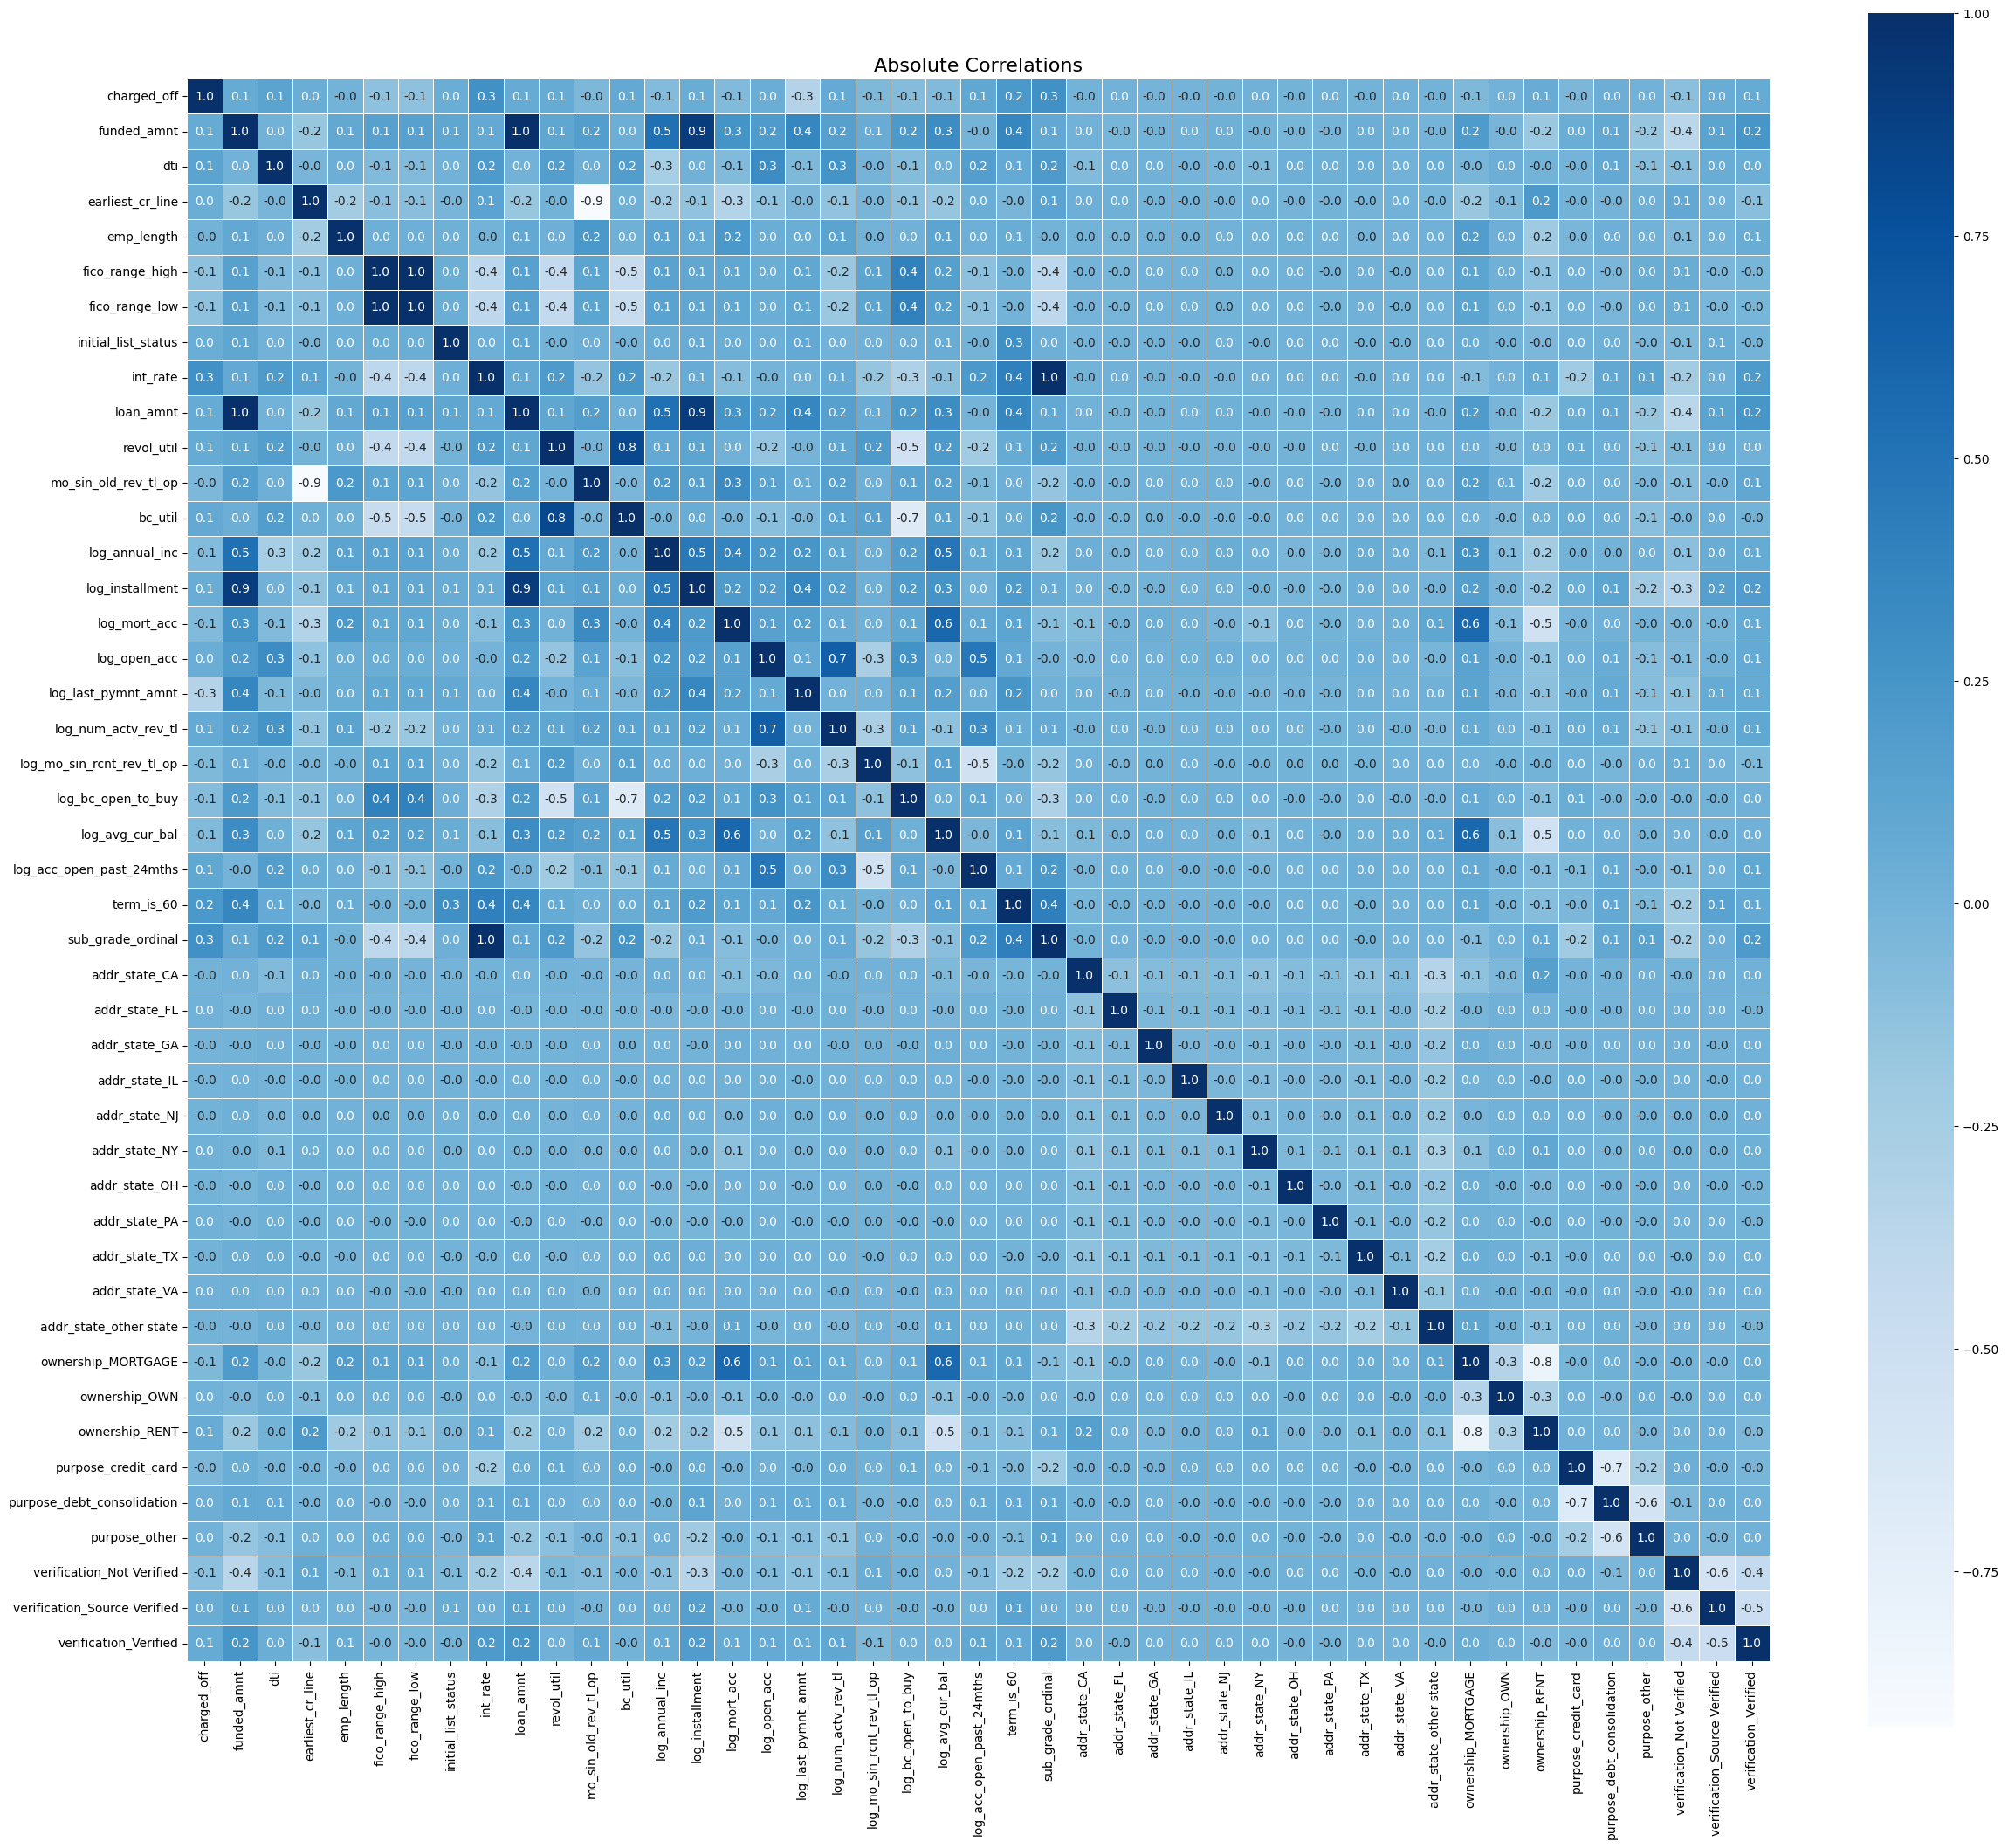

In [70]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(25, 25))

sns.heatmap(correlation_matrix, 
            annot=True,         # Annotate cells with correlation coefficients
            fmt=".1f",          # Formatting for the annotations
            cmap="Blues",       # Use the Blues color map
            square=True,        # Square cells
            linewidths=0.5,     # Width of lines that will divide each cell
            cbar_kws={"shrink": .8}) 

plt.title('Absolute Correlations', fontsize=16)
plt.tight_layout()
plt.show();

<a id='3.4'></a>
## 4.3. Sampling Data

To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.


In [71]:
target_column = 'charged_off'
classes = dataset[target_column].unique()

random_state = 12345
# Draw 5500 rows from each class
class_samples = []
for cls in classes:
    class_sample = dataset[dataset[target_column] == cls].sample(n=5500, random_state=random_state)
    class_samples.append(class_sample)

# df is balanced dataset
df = pd.concat(class_samples, ignore_index=True)

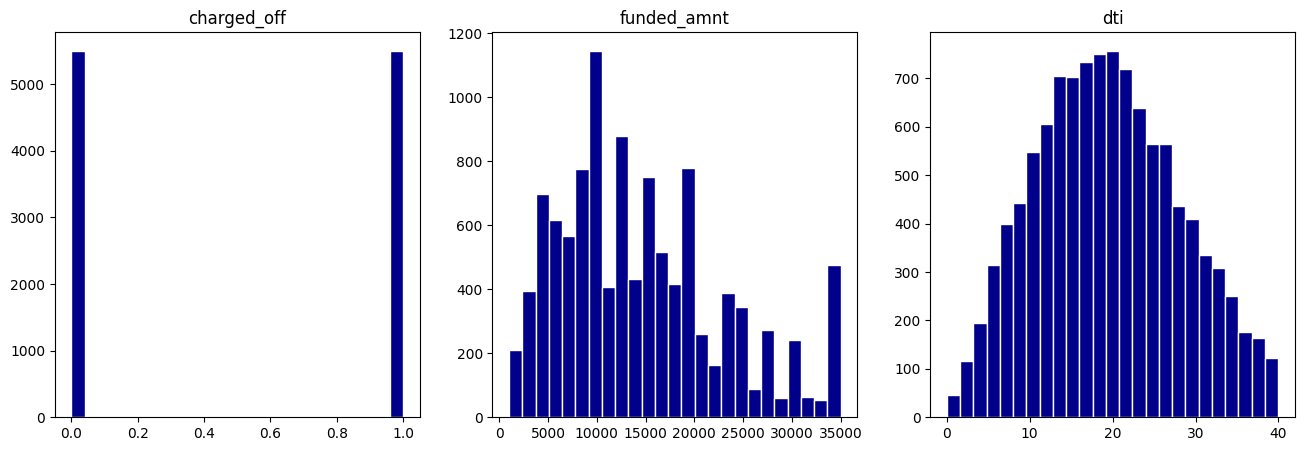

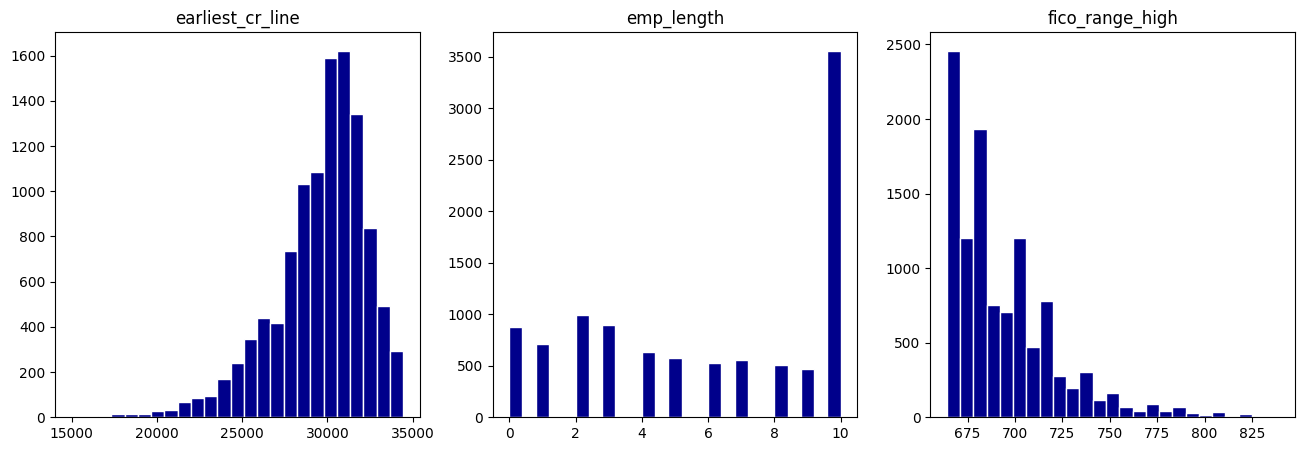

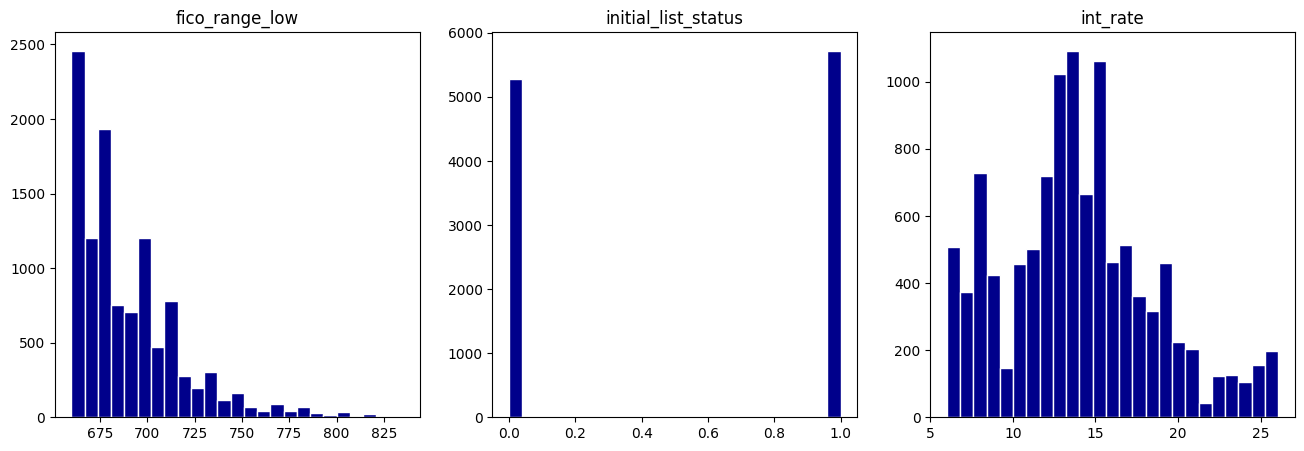

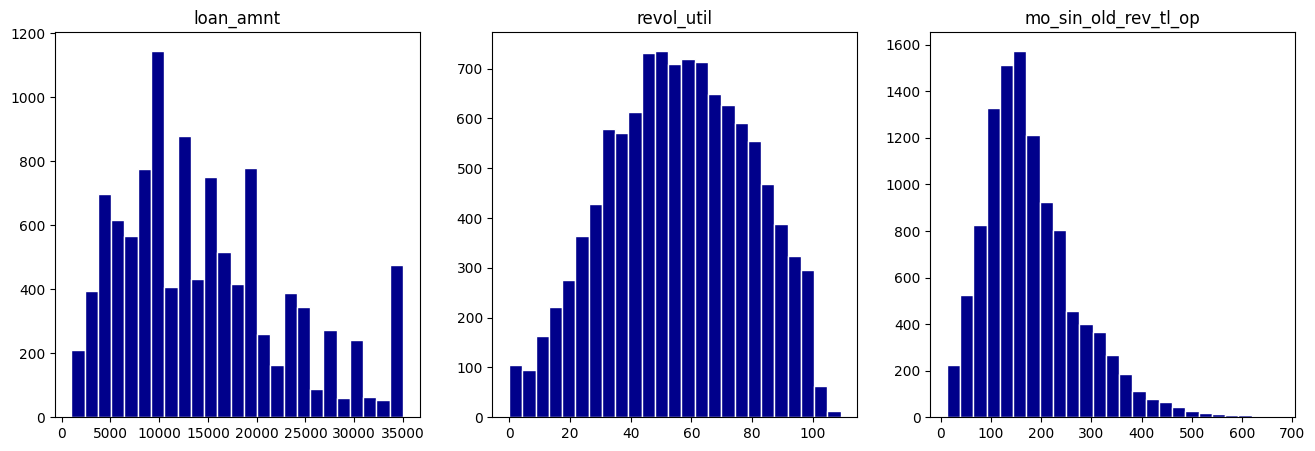

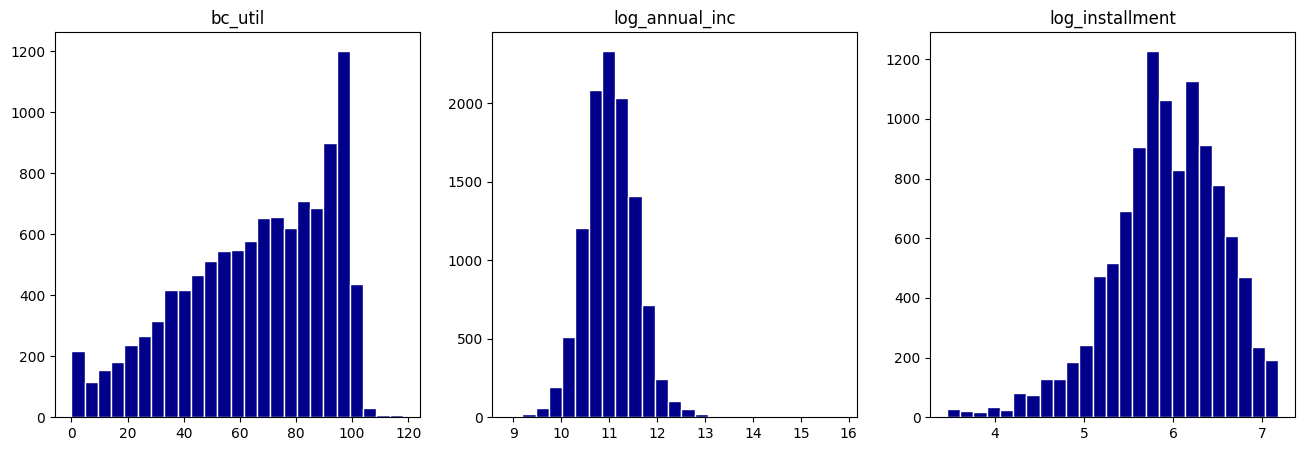

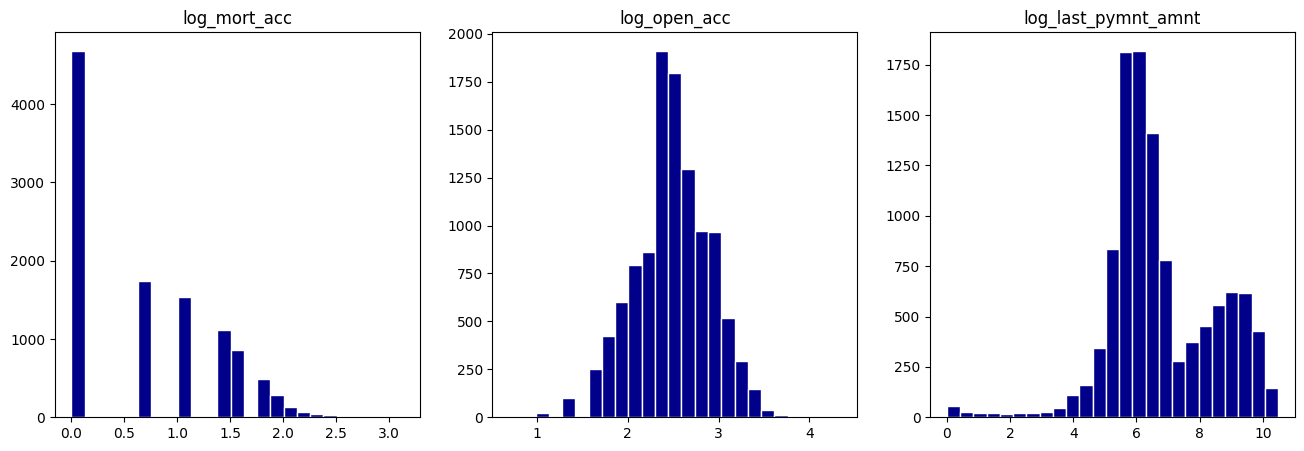

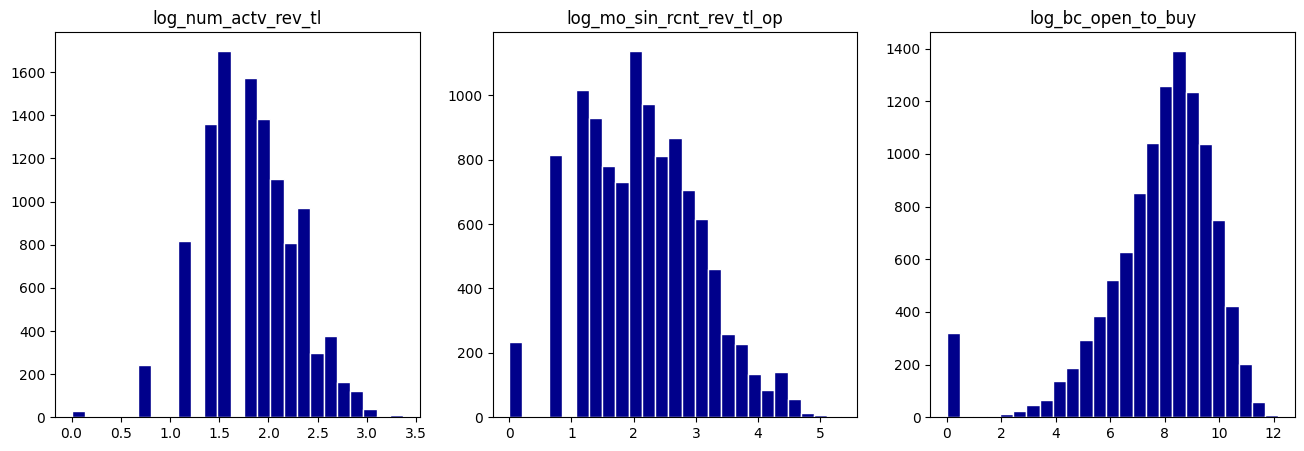

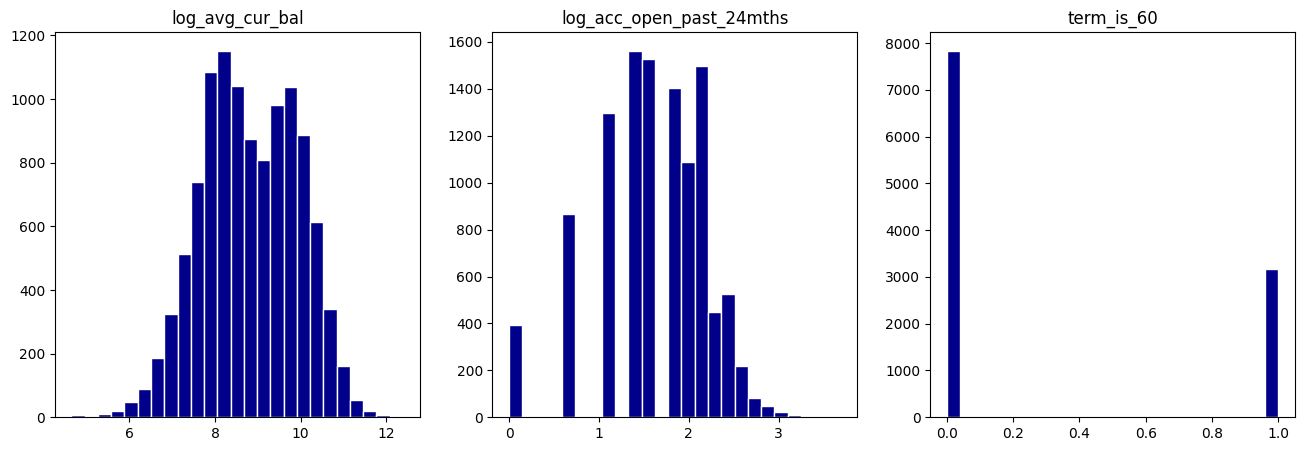

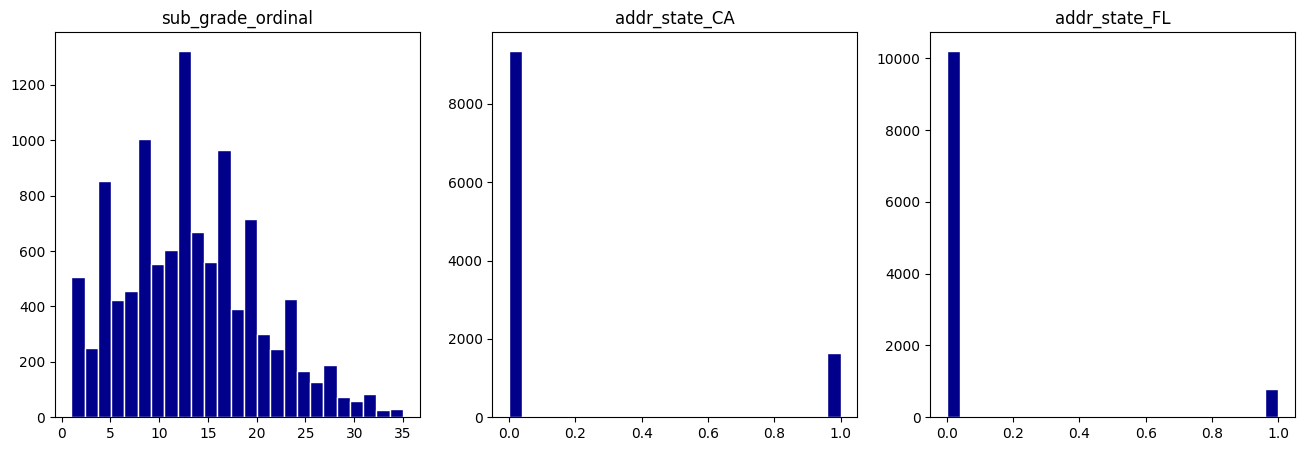

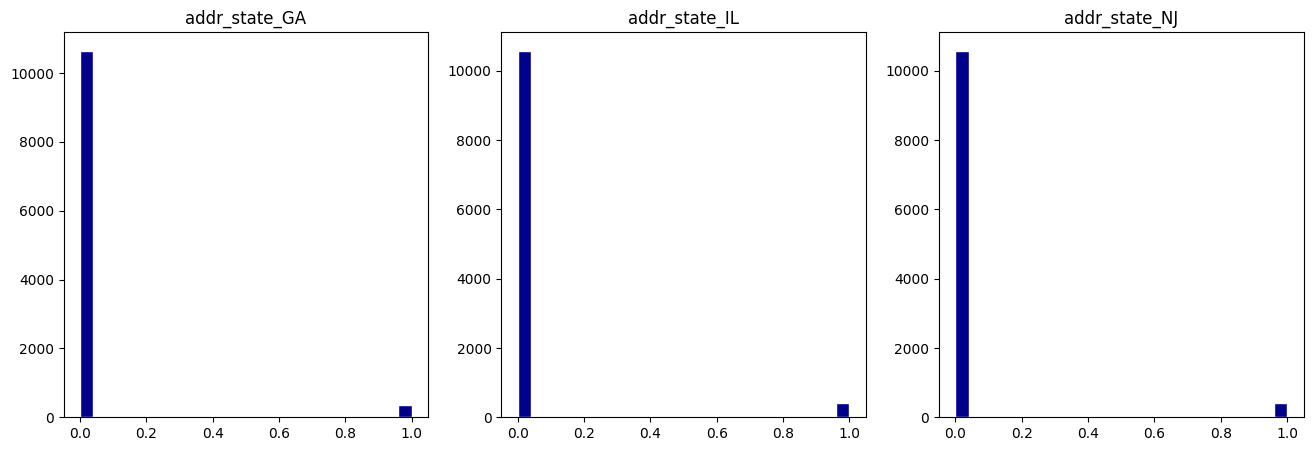

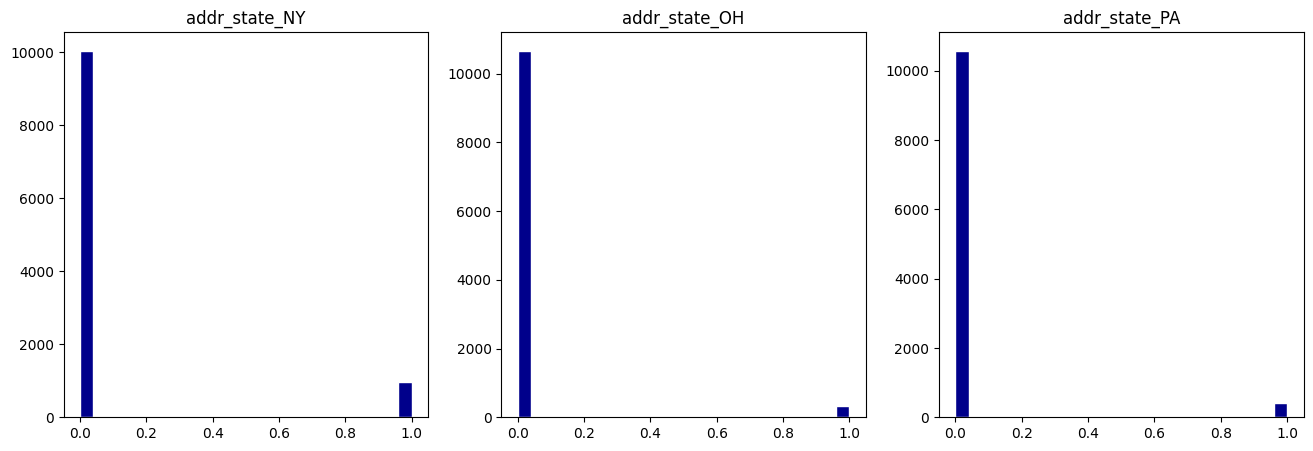

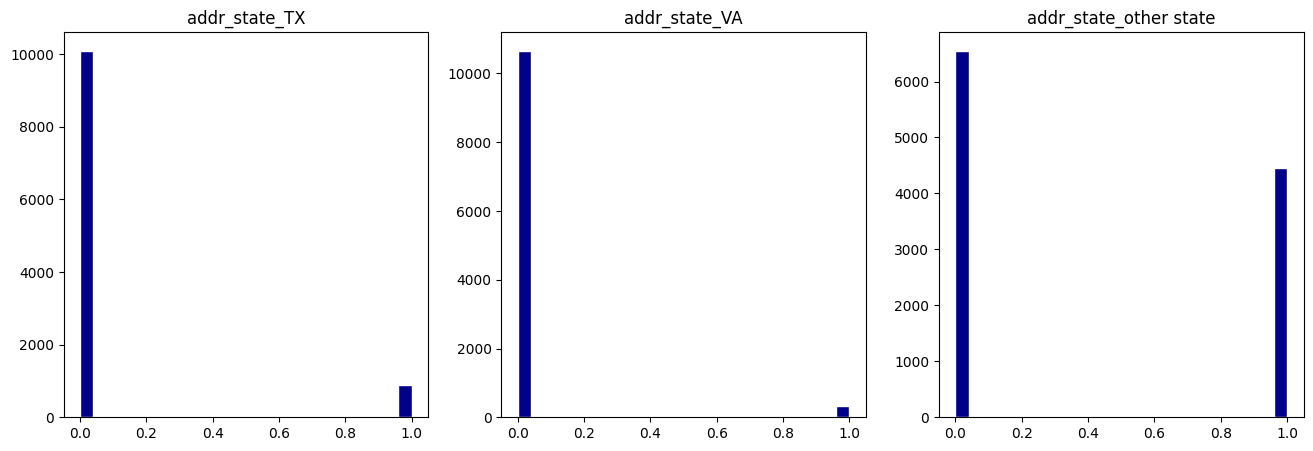

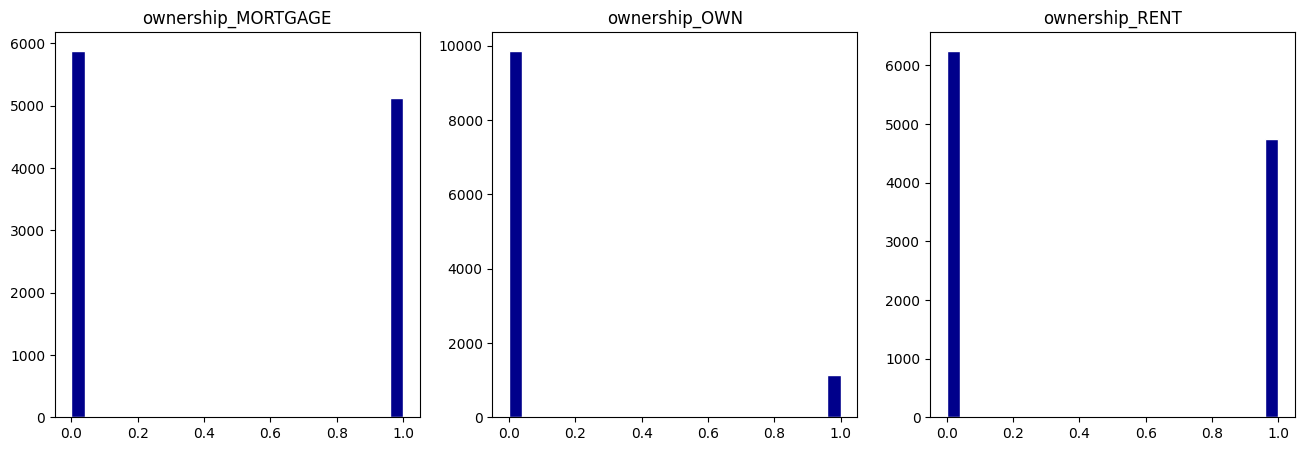

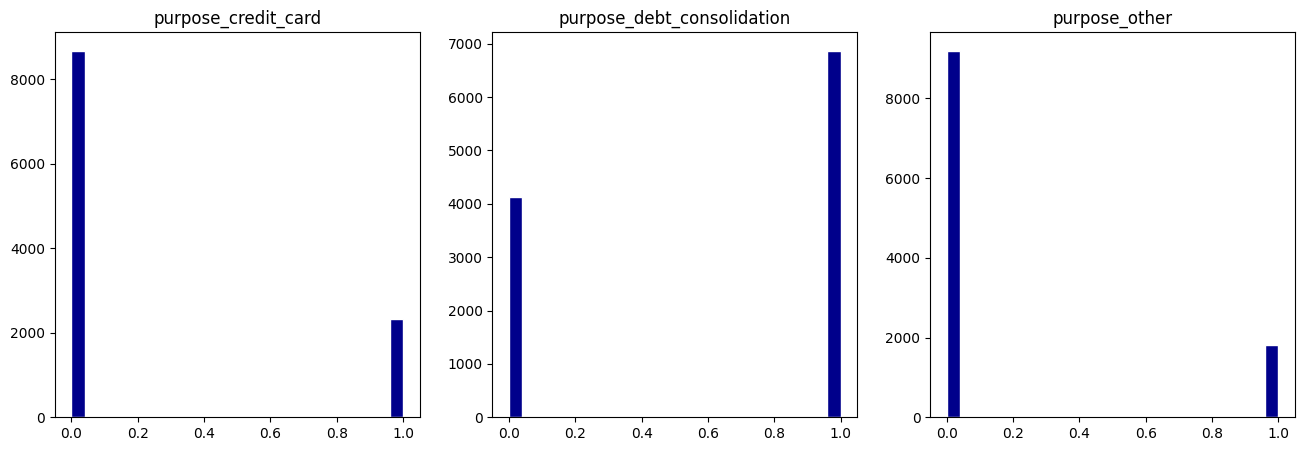

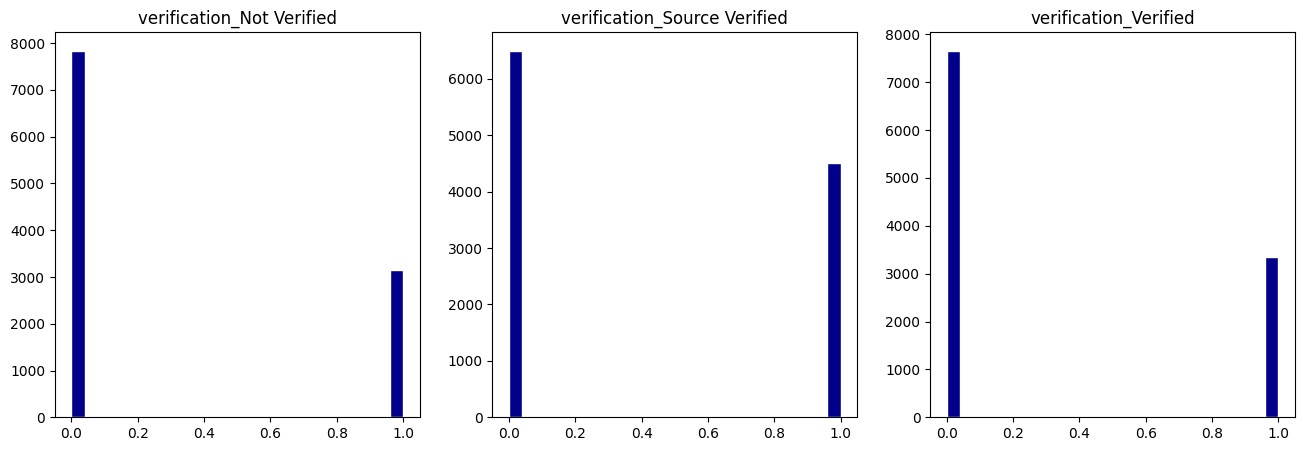

In [72]:
numerical_columns = dataset.columns
for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(df[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(df[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(df[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i])
    ax[1].set_title(numerical_columns[i+1])

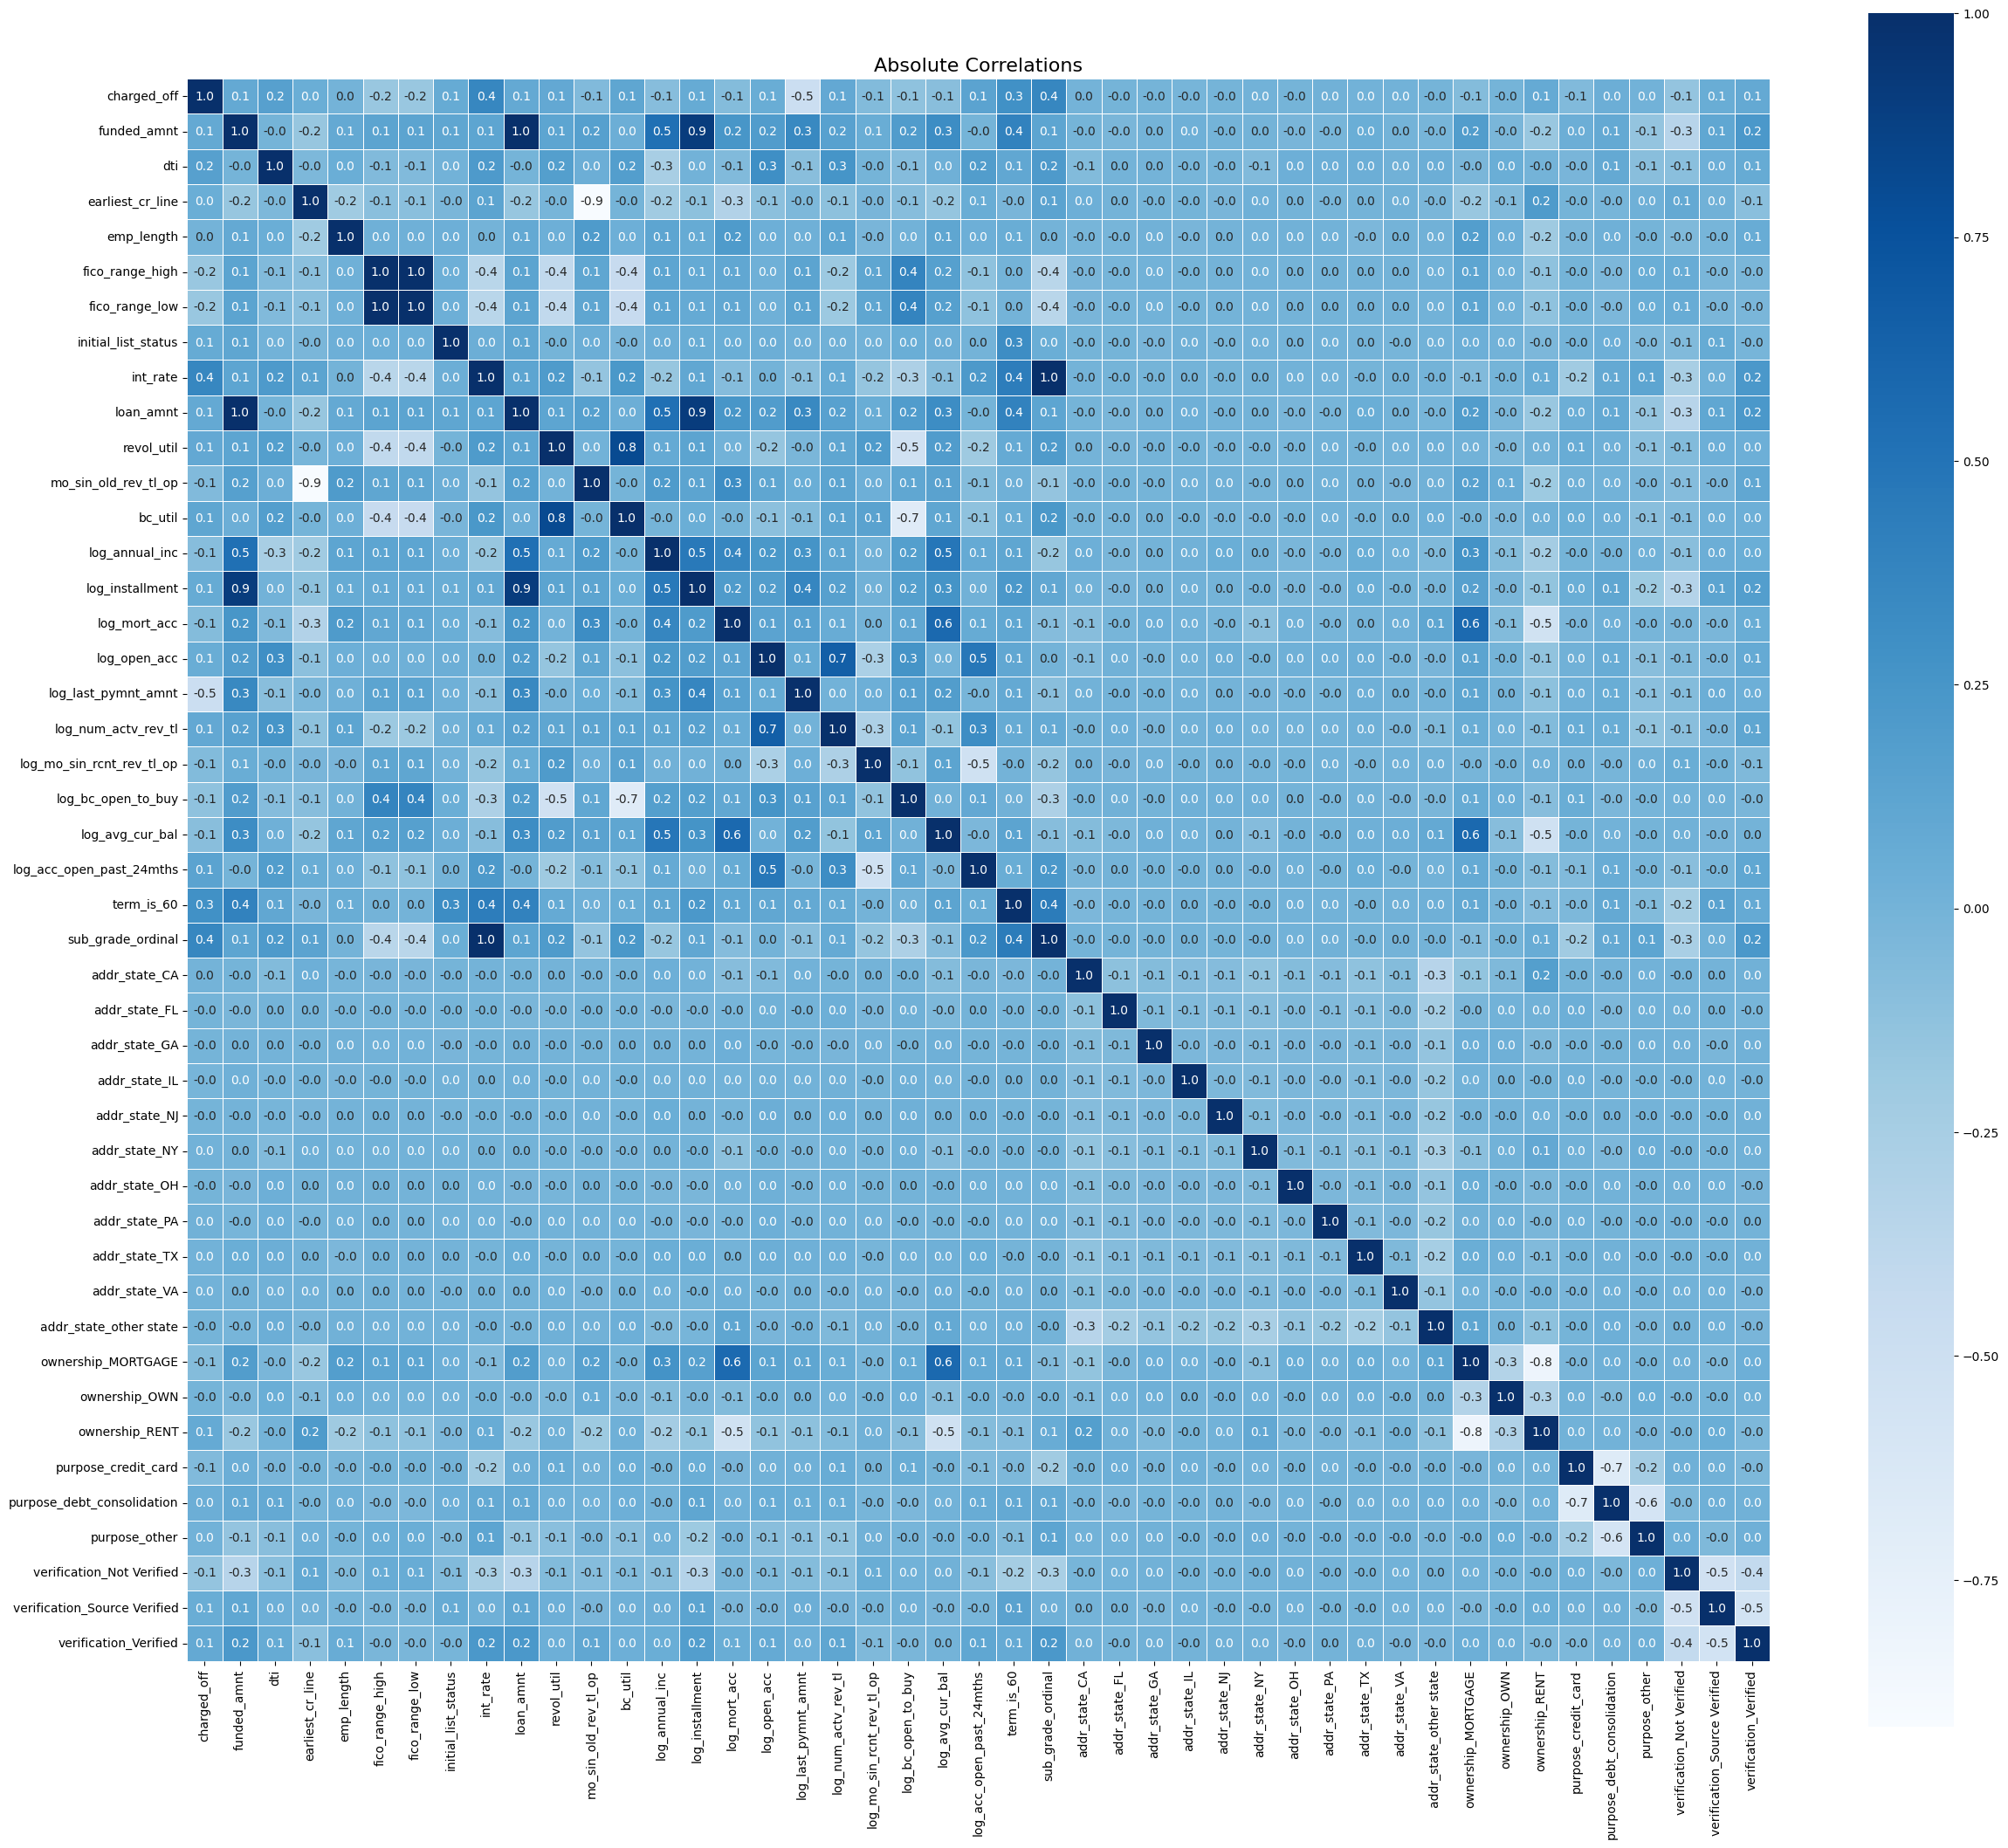

In [73]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))

sns.heatmap(correlation_matrix, 
            annot=True,         # Annotate cells with correlation coefficients
            fmt=".1f",          # Formatting for the annotations
            cmap="Blues",       # Use the Blues color map
            square=True,        # Square cells
            linewidths=0.5,     # Width of lines that will divide each cell
            cbar_kws={"shrink": .8}) 

plt.title('Absolute Correlations', fontsize=16)
plt.tight_layout()
plt.show();

Hnadle NAs

In [74]:
df.isnull().sum().sort_values(ascending = False)[:5]

emp_length                706
bc_util                   118
log_bc_open_to_buy        110
revol_util                  7
addr_state_other state      0
dtype: int64

mode for emp_length, because it has many observations of value 10

mean for other features, because they take many different values


In [75]:
emp_length_mode = df['emp_length'].mode()[0]
df['emp_length'].fillna(emp_length_mode, inplace=True)

columns_with_na = ['bc_util', 'log_bc_open_to_buy', 'revol_util']
for col in columns_with_na:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [76]:
df.isnull().sum().sort_values(ascending = False)[:5]

charged_off      0
term_is_60       0
addr_state_CA    0
addr_state_FL    0
addr_state_GA    0
dtype: int64

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### Use an 80:20 split

In [77]:
# make X and y
X = df.drop(columns=['charged_off'])
y = df['charged_off']

# make teh split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

### Additionally we are Using Standard Scaler

We fit it on train and transform train and test. We leave dummy variables as they are (0 and 1) without scaling

In [78]:
# find contineous and dummy features
features_to_scale = [feature for feature in X_train.columns if X_train[feature].nunique() > 2]
features_dummy = [feature for feature in X_train.columns if X_train[feature].nunique() == 2]

In [79]:
# scale the features
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [80]:
# assemble train and test back

X_train = pd.concat([X_train_scaled[features_to_scale],X_train[features_dummy]],axis = 1)
X_test = pd.concat([X_test_scaled[features_to_scale],X_test[features_dummy]],axis = 1)

Final check of distributions using histograms

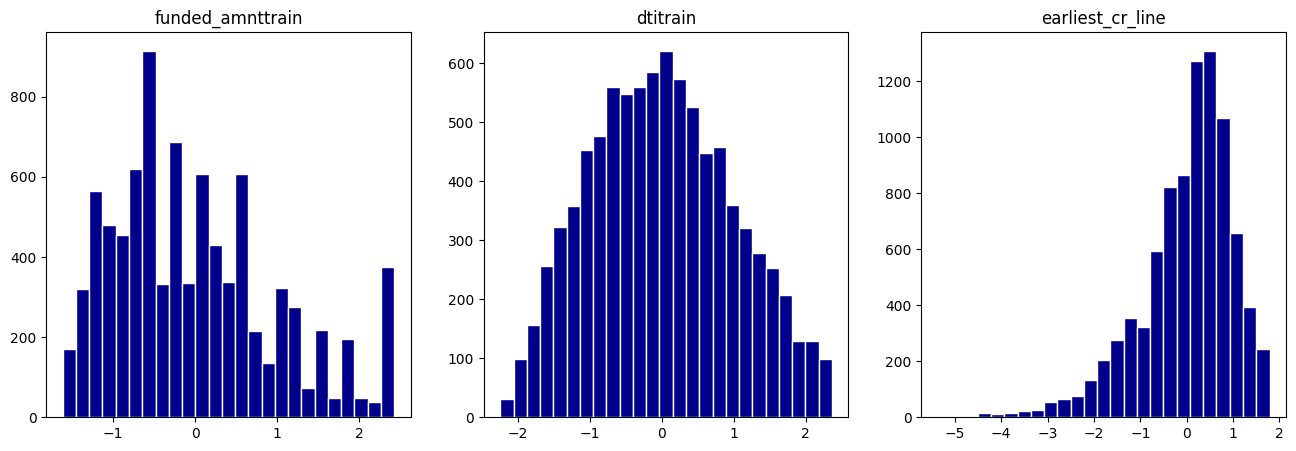

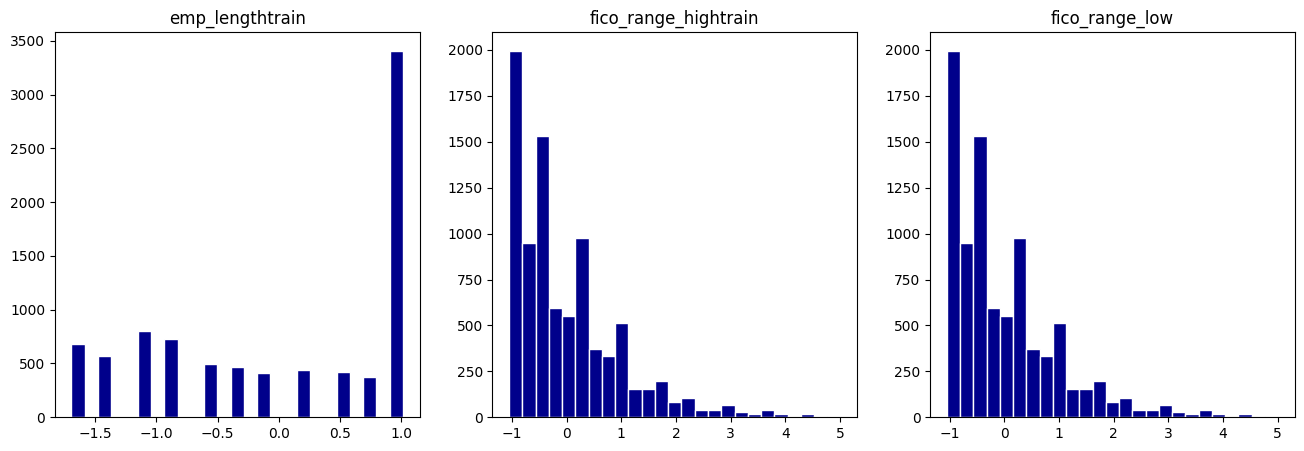

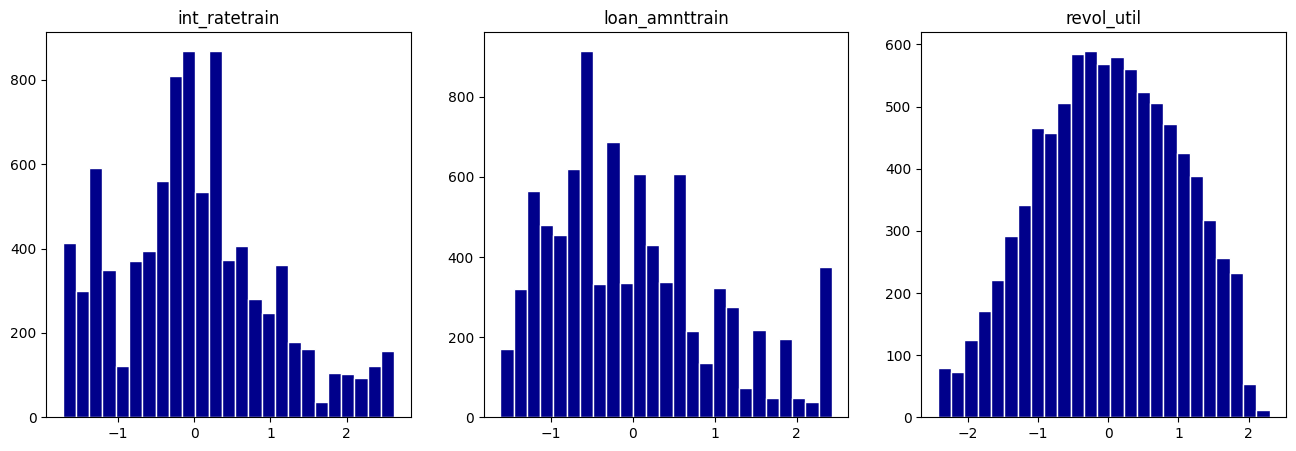

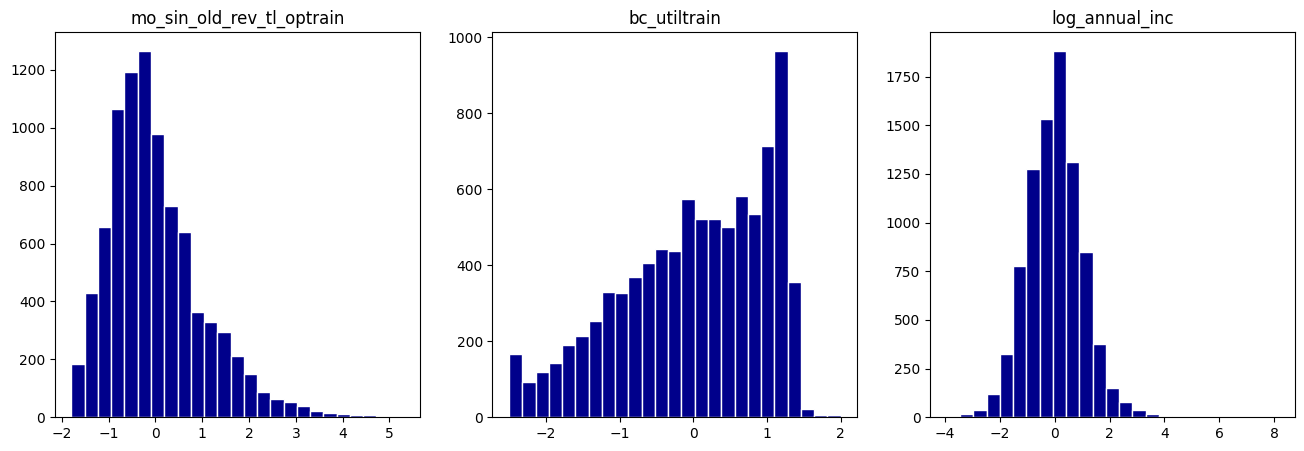

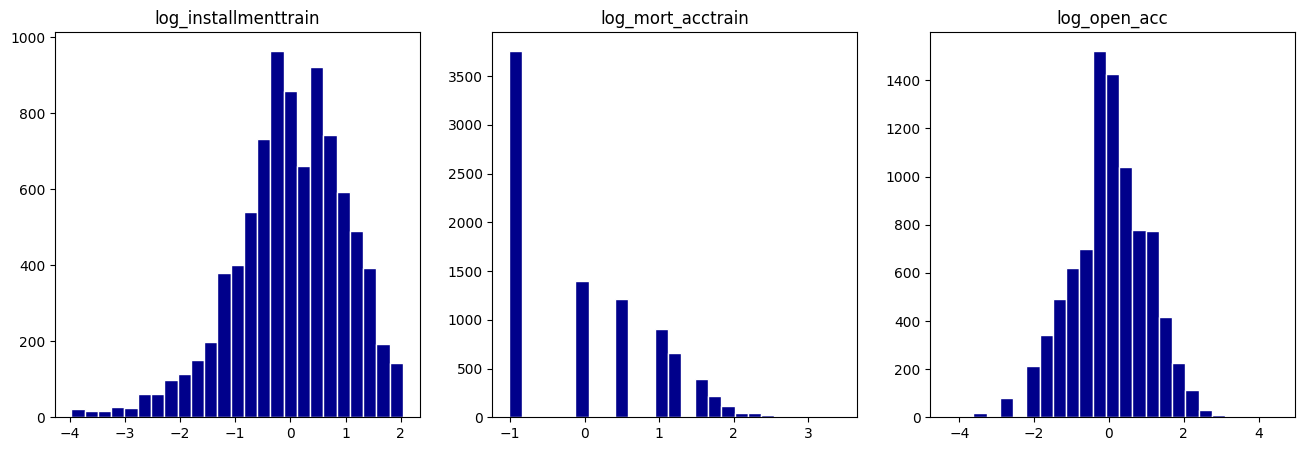

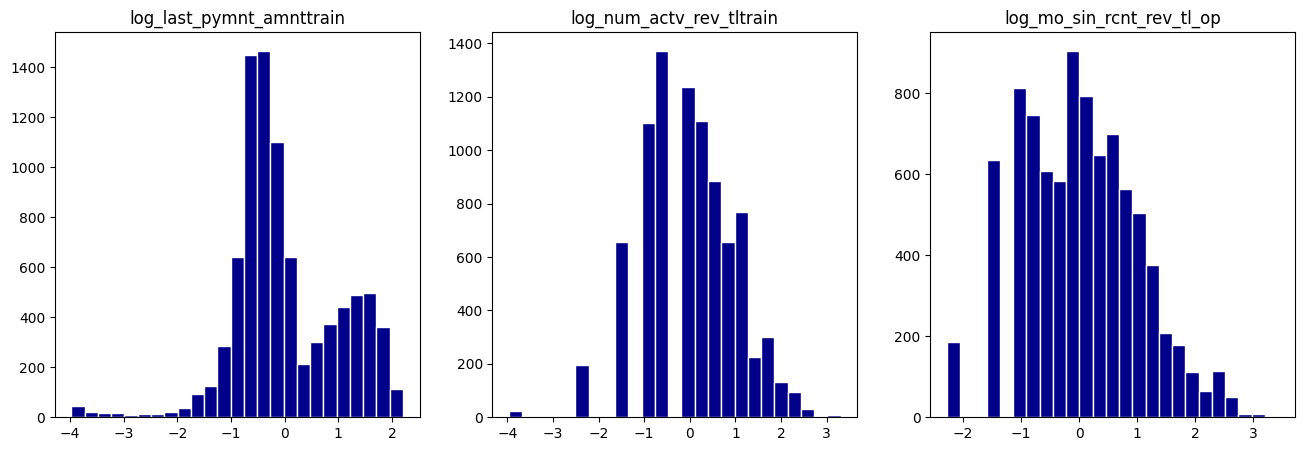

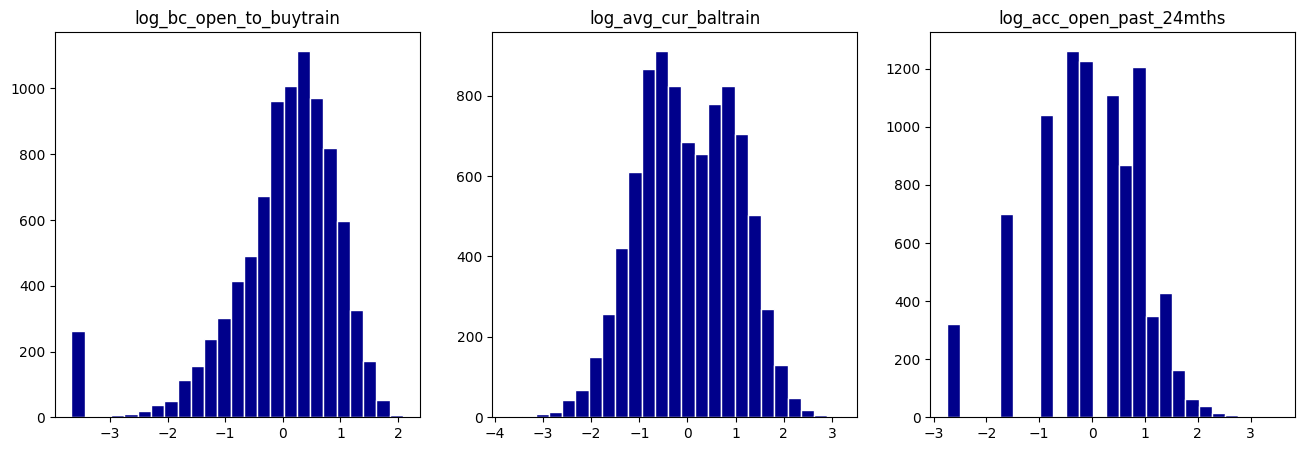

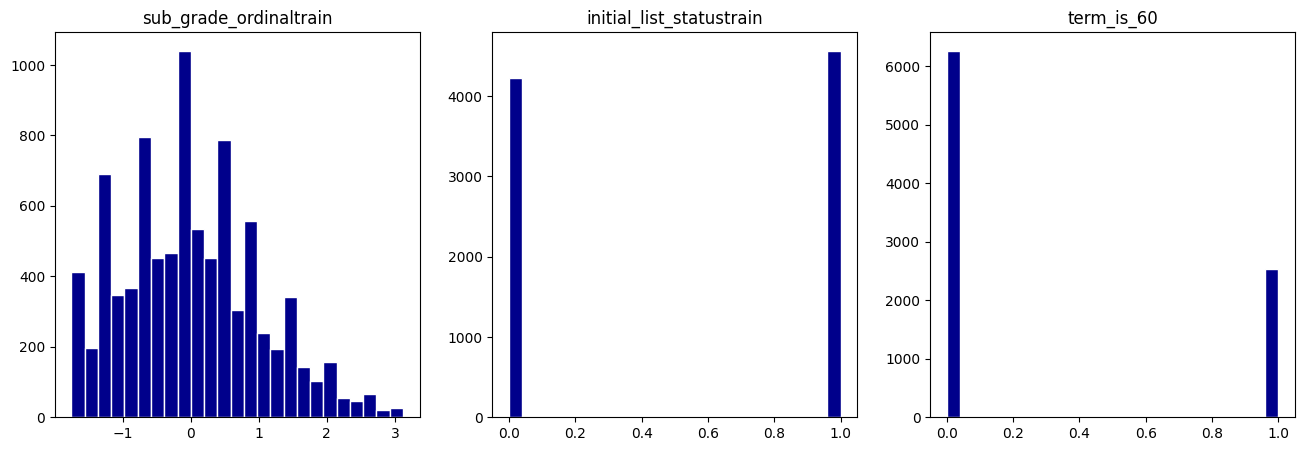

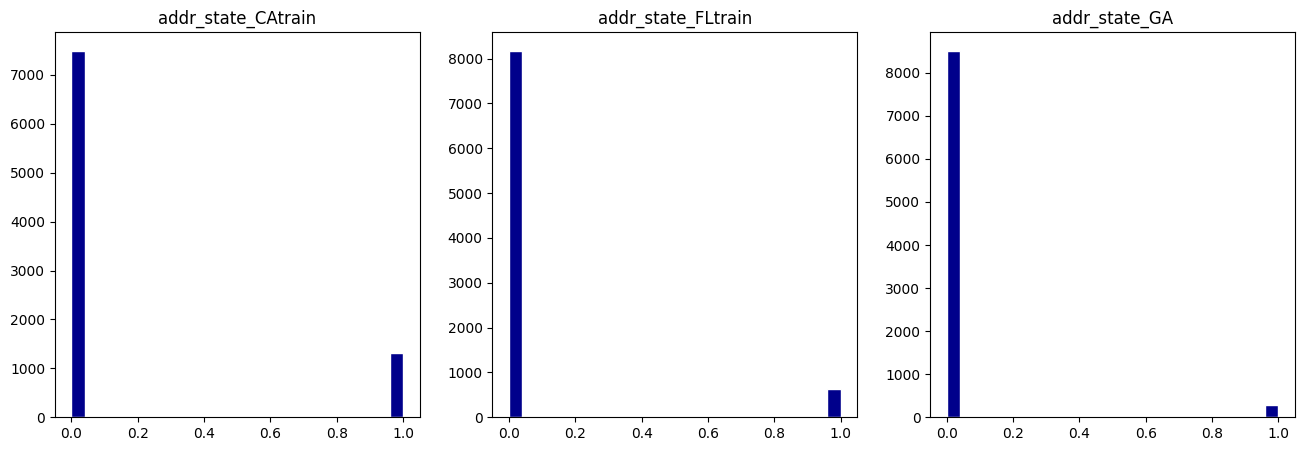

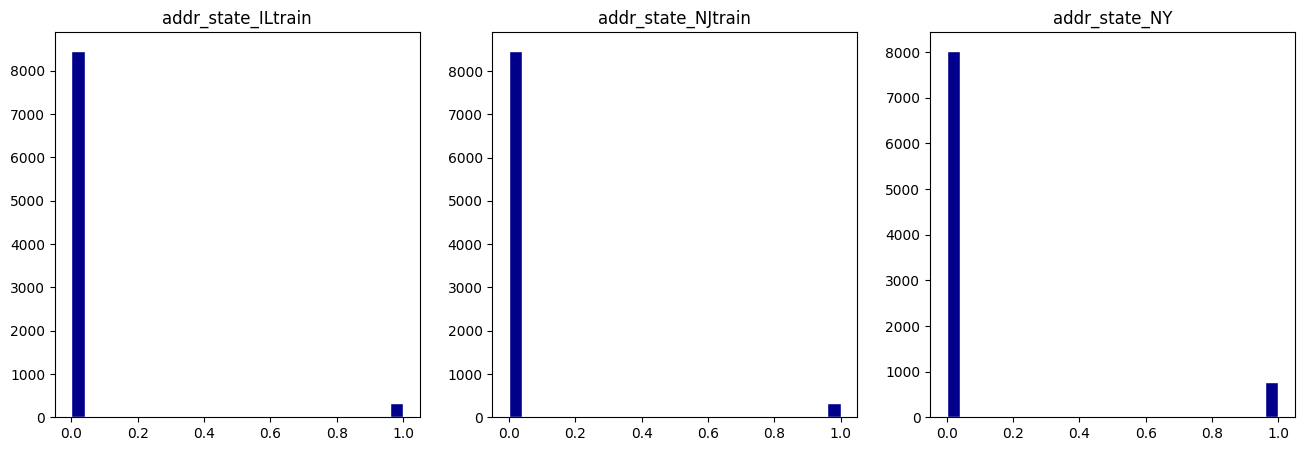

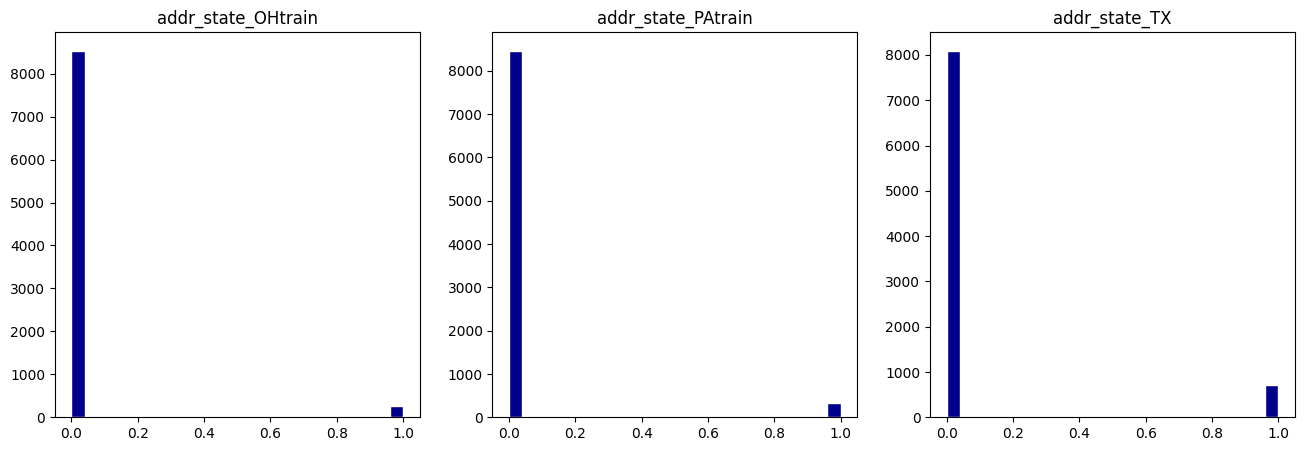

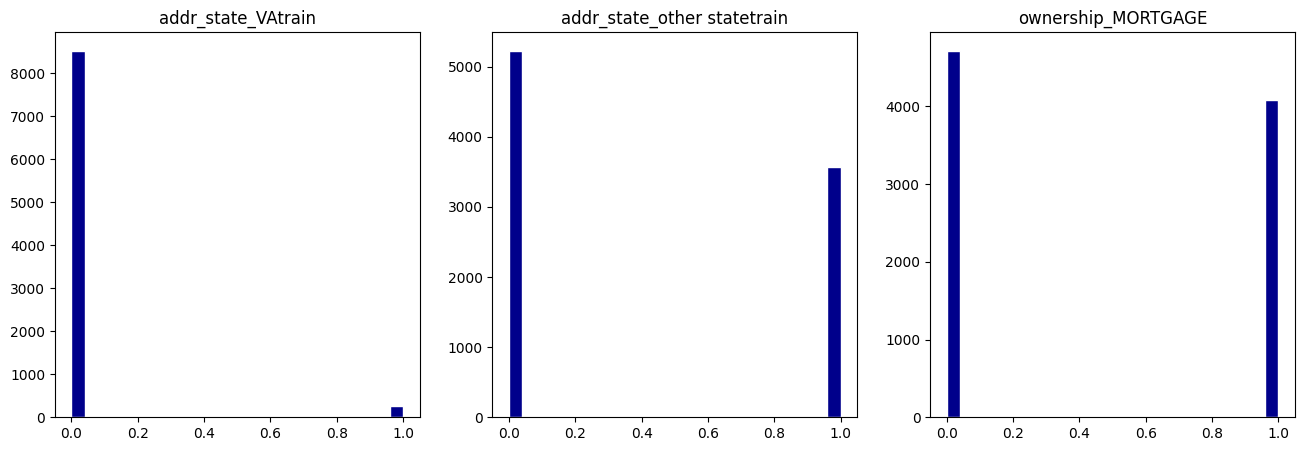

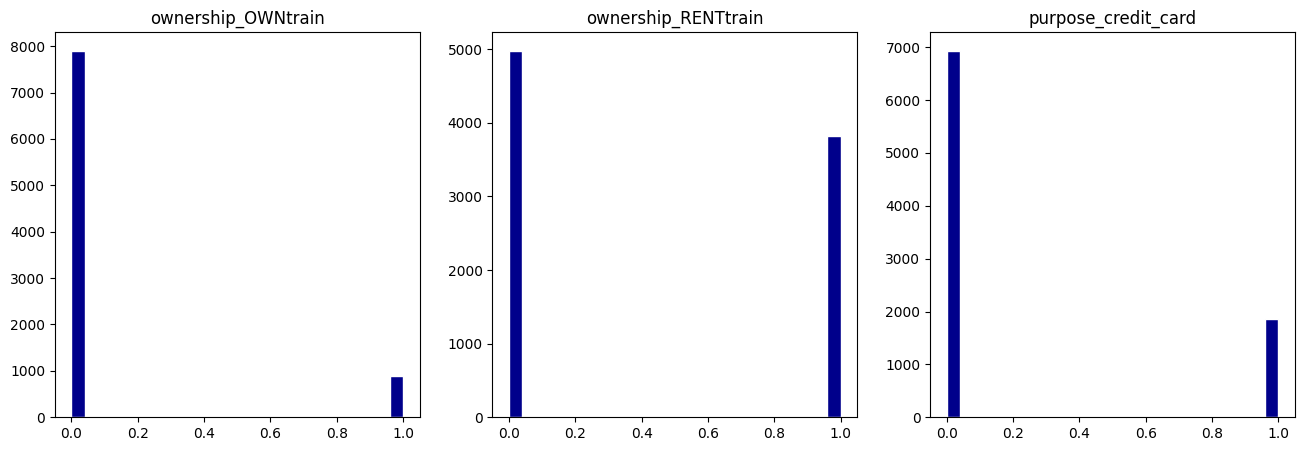

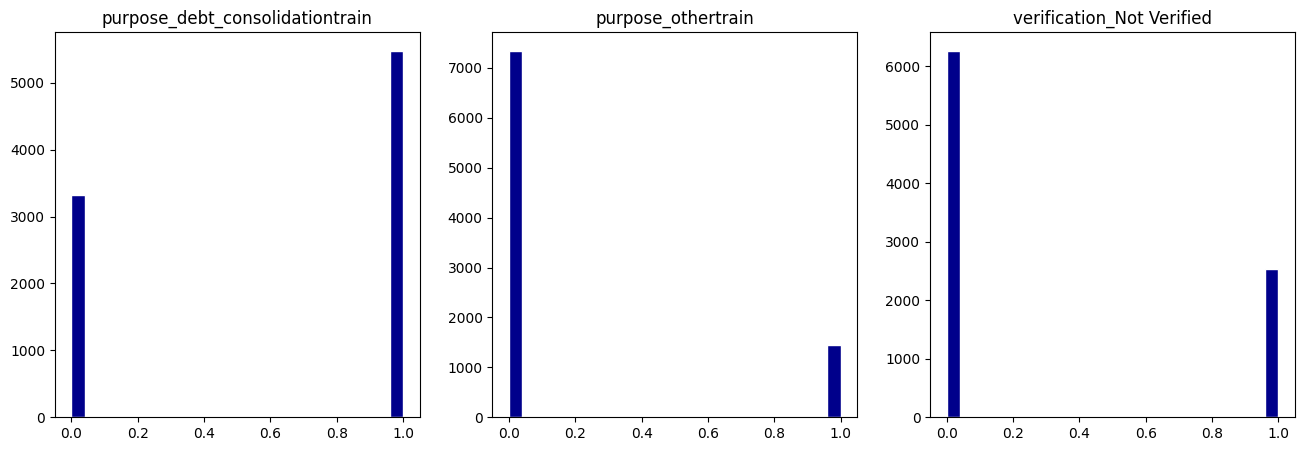

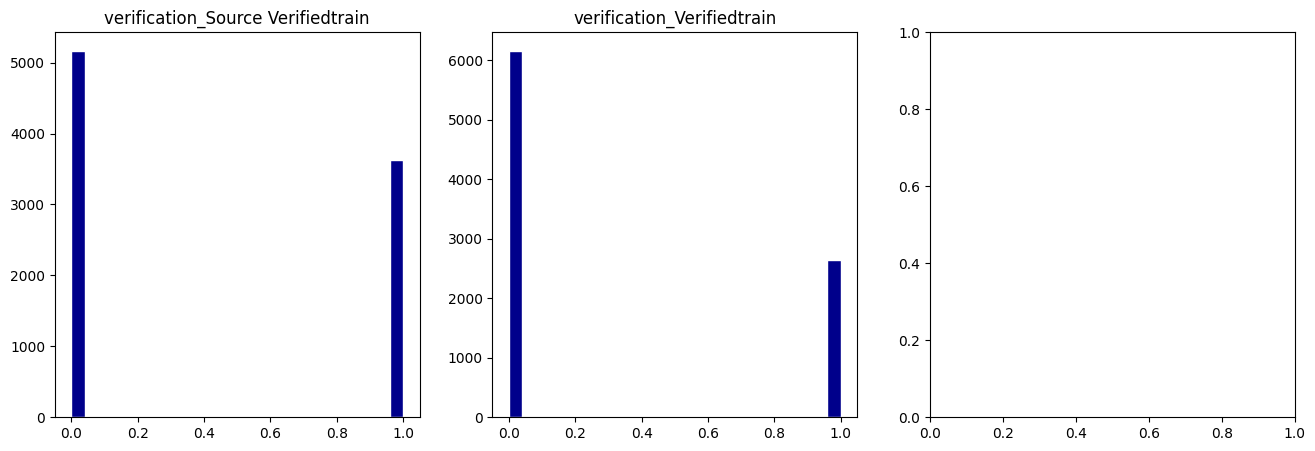

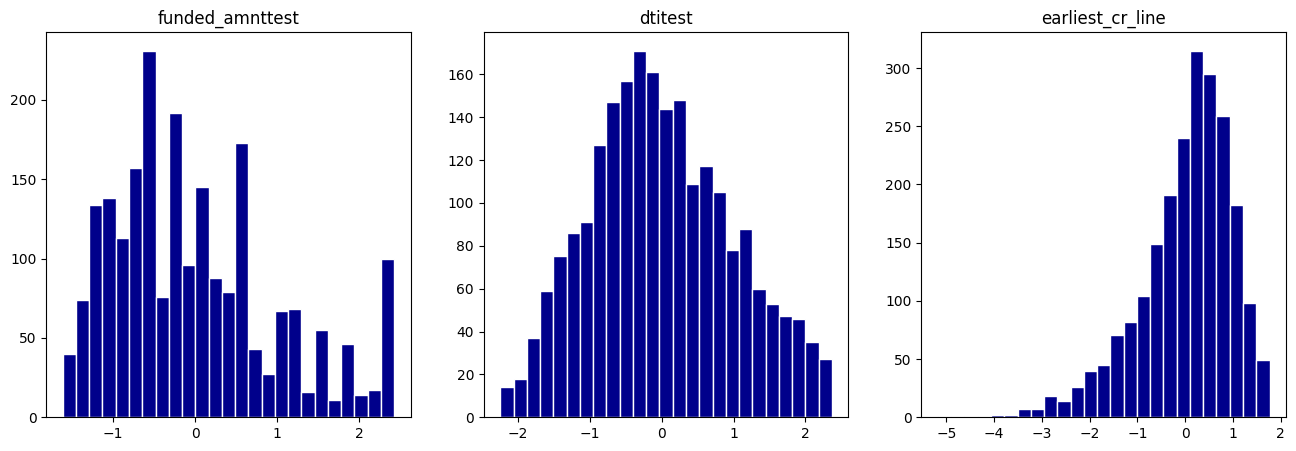

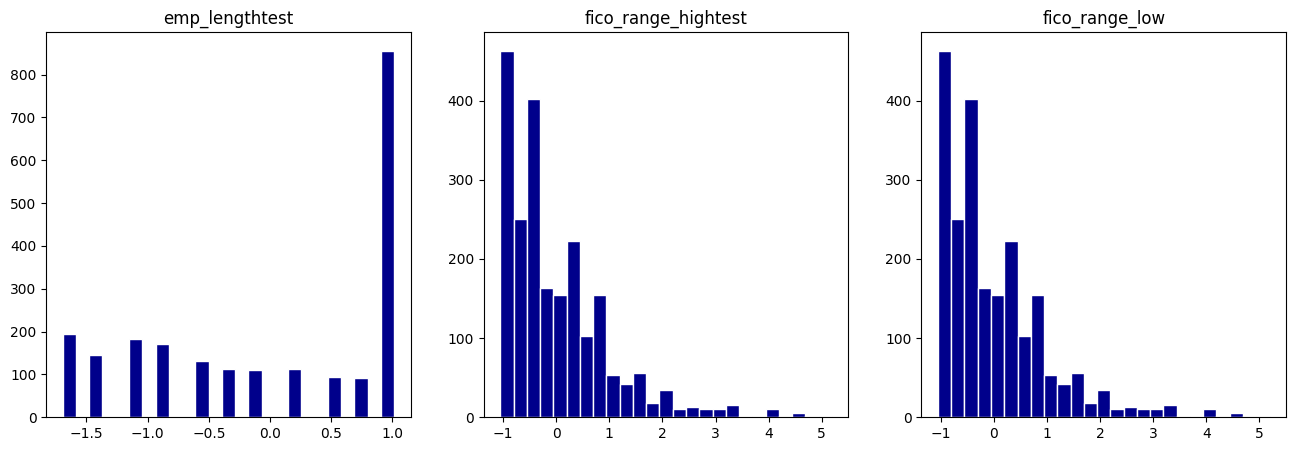

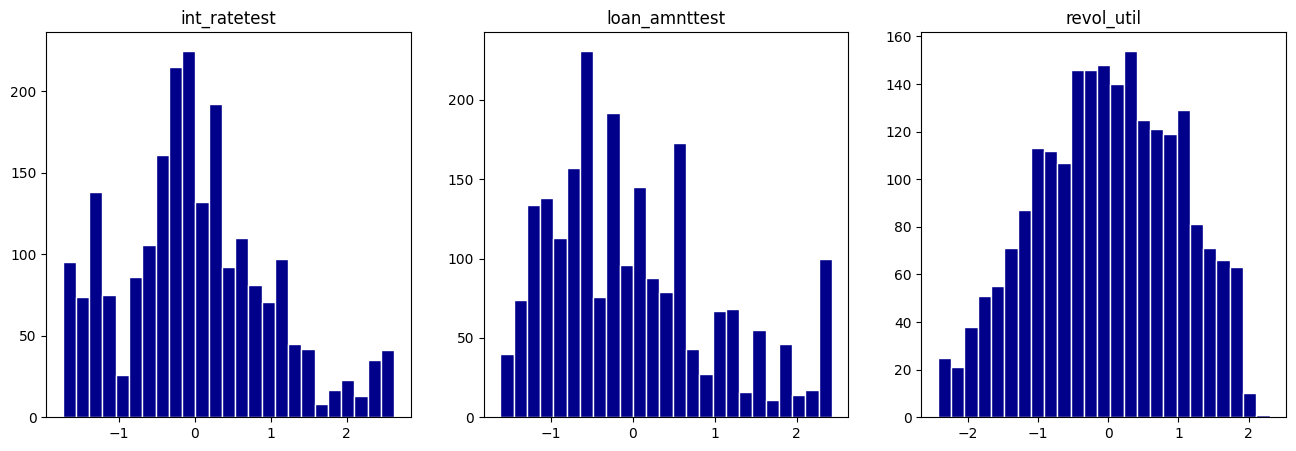

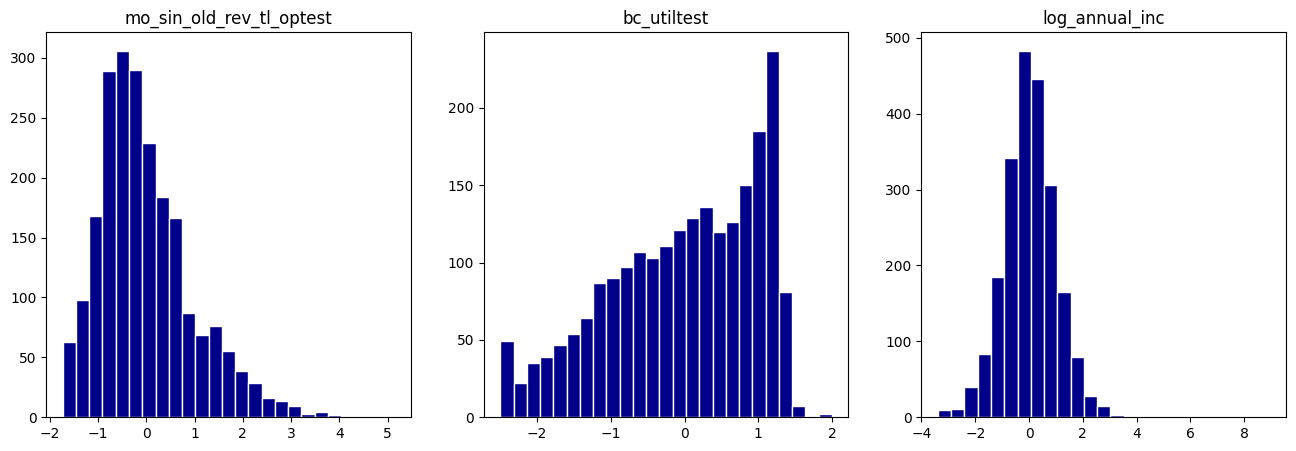

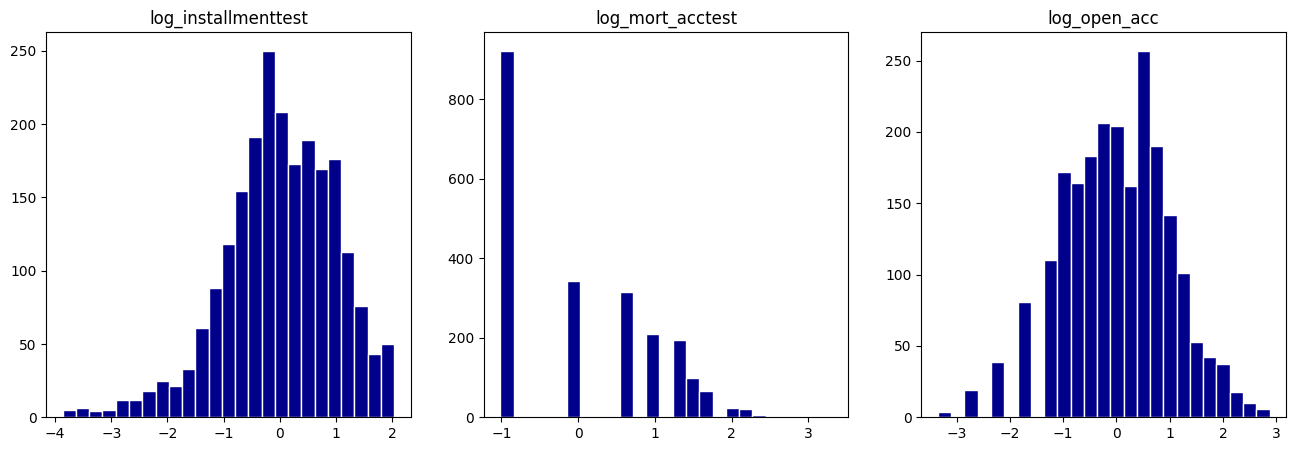

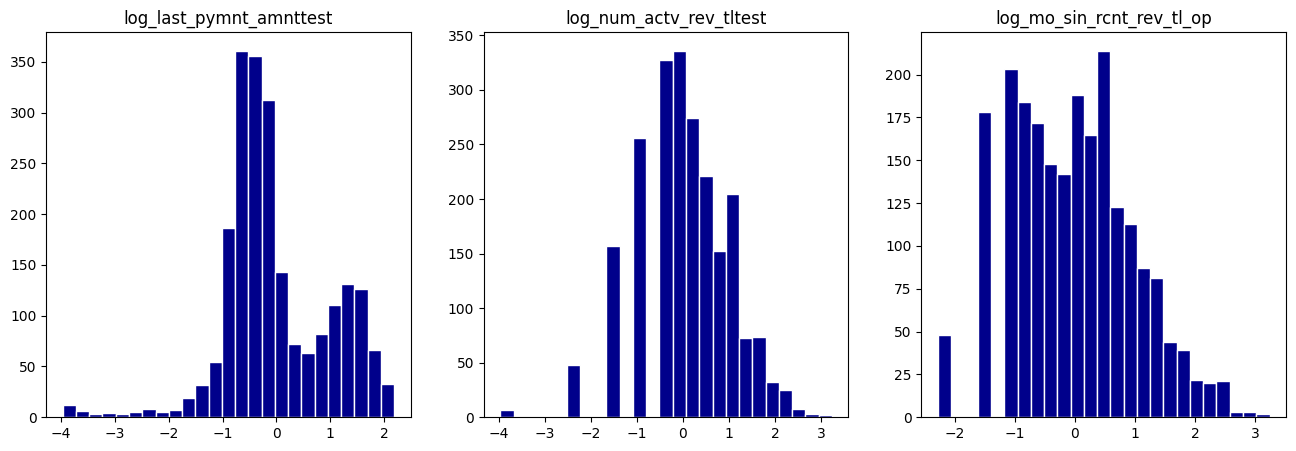

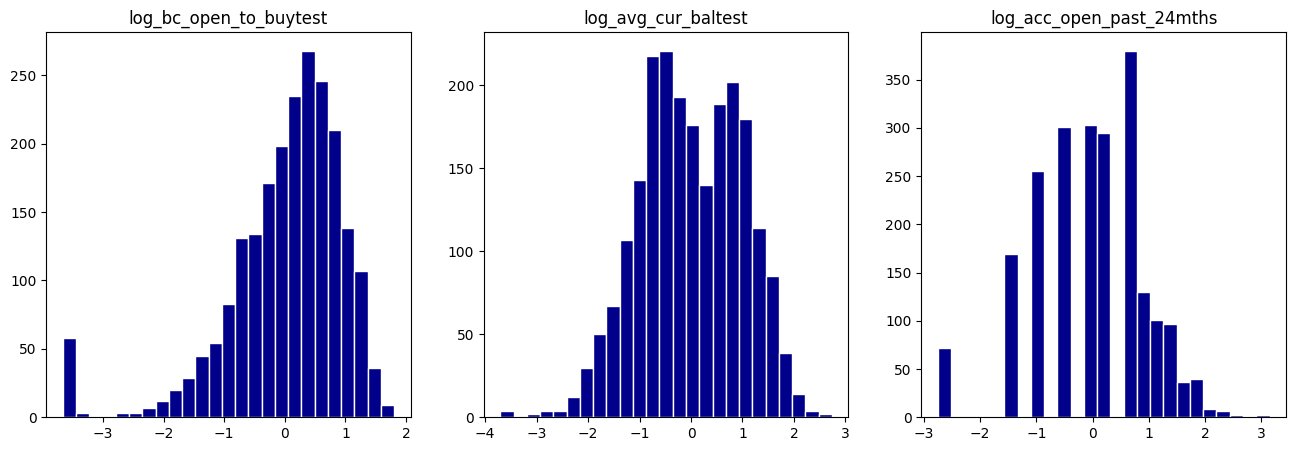

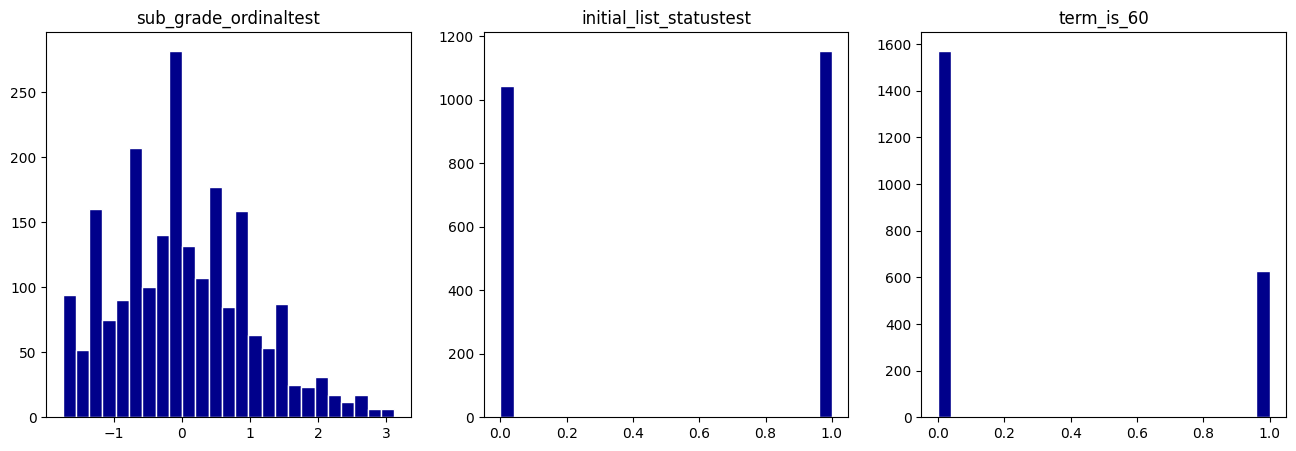

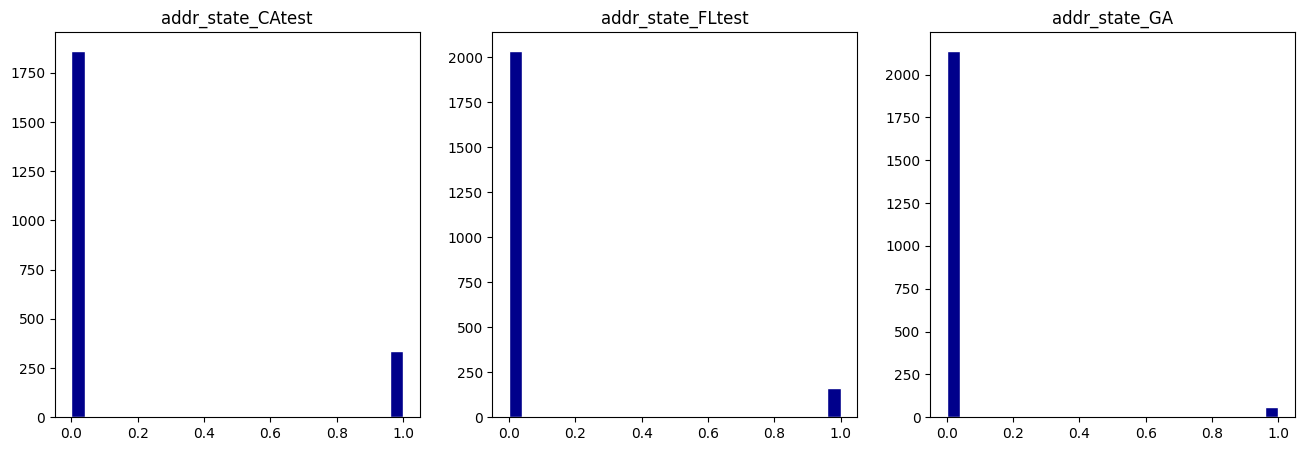

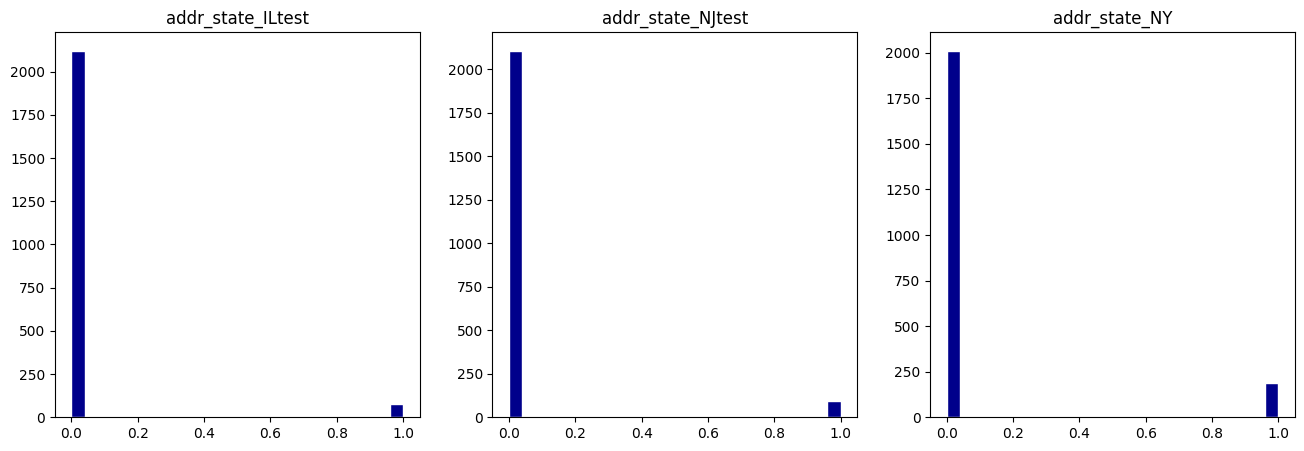

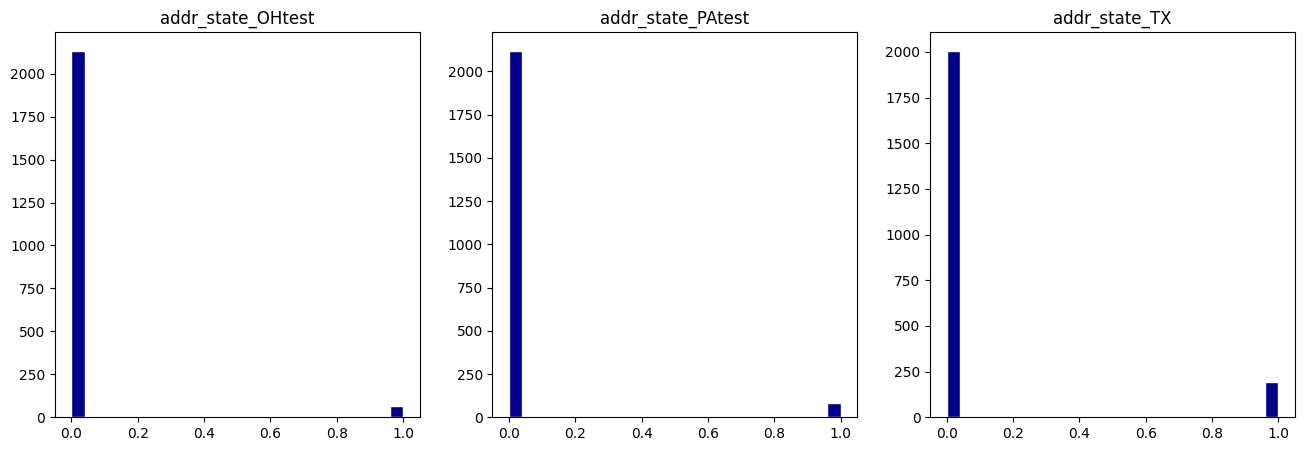

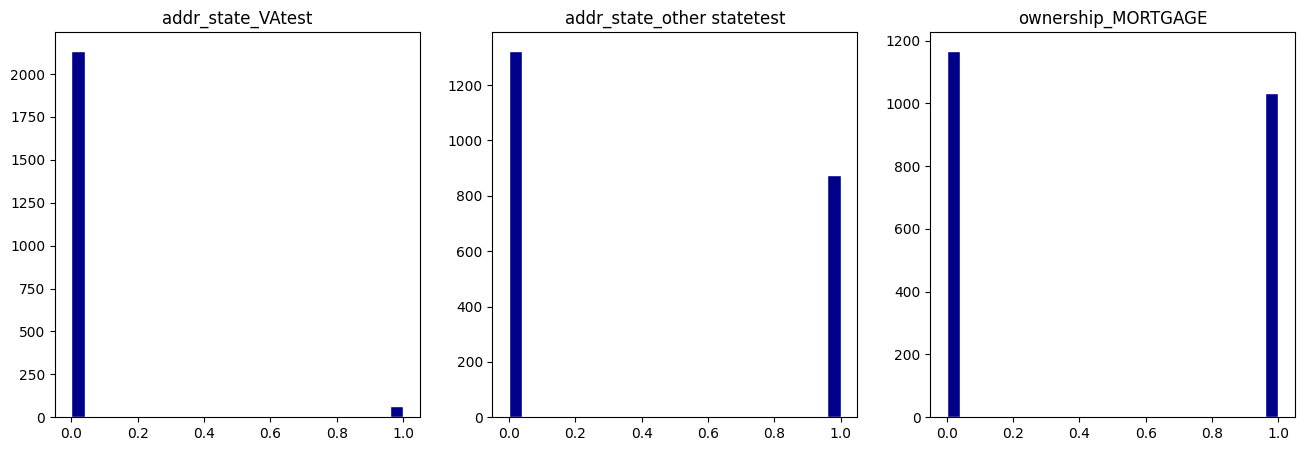

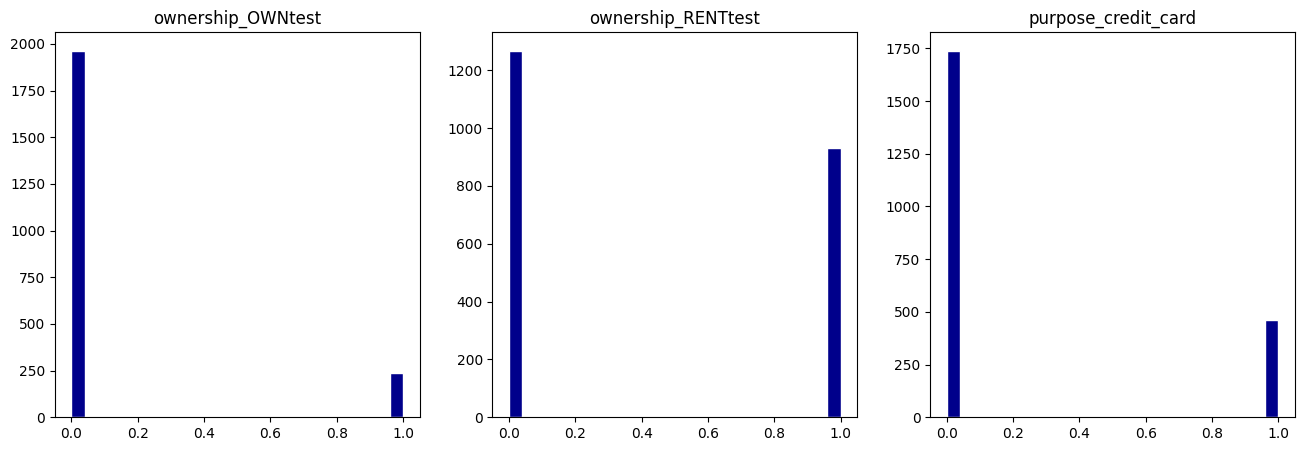

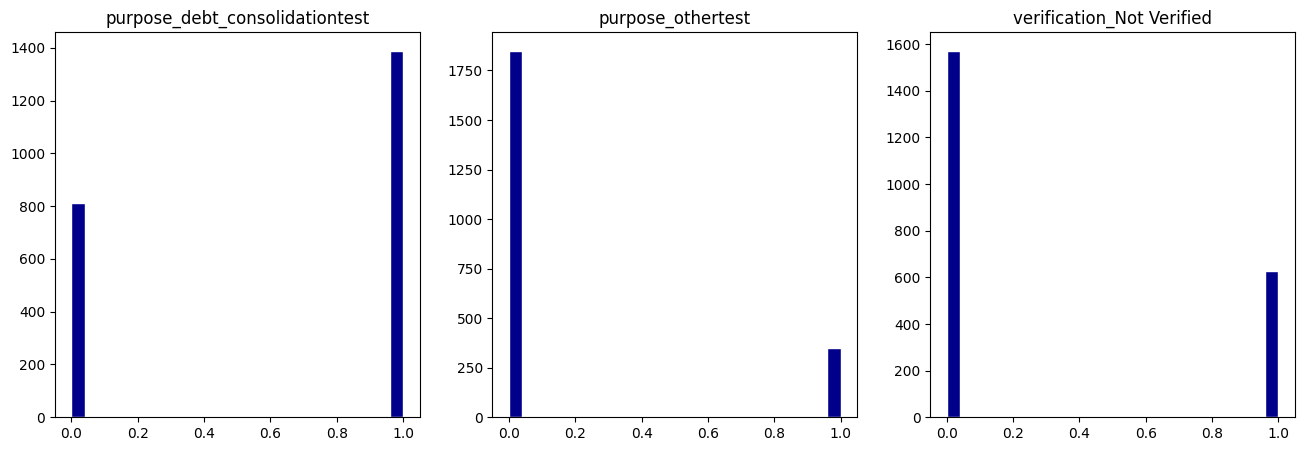

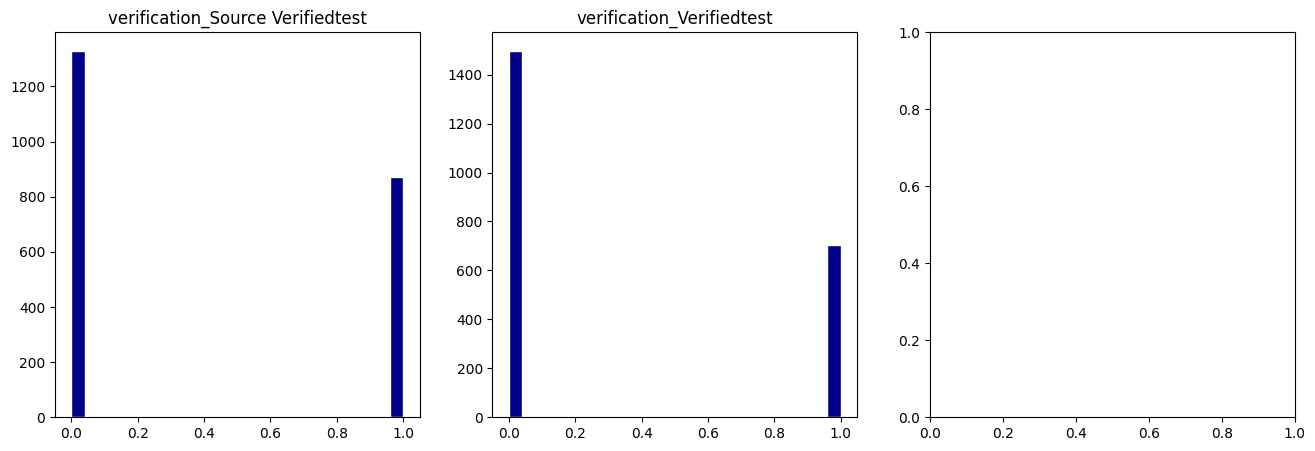

In [81]:
numerical_columns = X_train.columns

# train
for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(X_train[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(X_train[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(X_train[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i]+ 'train')
    ax[1].set_title(numerical_columns[i+1]+ 'train')


# test

for i in np.arange(0,len(numerical_columns),3):

    fig, ax = plt.subplots(1, 3, figsize=(16,5), sharey=False)
    
    ax[0].hist(X_test[numerical_columns[i]], color = 'darkblue', edgecolor = 'white', bins = 25)
    ax[1].hist(X_test[numerical_columns[i+1]], color = 'darkblue', edgecolor = 'white', bins = 25)
    if i+2 < len(numerical_columns):
        ax[2].hist(X_test[numerical_columns[i+2]], color = 'darkblue', edgecolor = 'white', bins = 25)
        ax[2].set_title(numerical_columns[i+2])
        
    ax[0].set_title(numerical_columns[i]+ 'test')
    ax[1].set_title(numerical_columns[i+1]+ 'test')

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.

In [82]:
#X_train, X_test, y_train, y_test

In [83]:
# Define 10-Fold cross-validation with ROC-AUC scoring
kf = KFold(n_splits=10, shuffle=True, random_state=763)
scoring = 'roc_auc'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

In [84]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, tol=1e-3, early_stopping=True)))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))

### K-folds cross validation

In [85]:
results = []
names = []

In [86]:
# Cross-validating each model
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean ROC-AUC = {cv_results.mean():.4f}, Std Dev = {cv_results.std():.4f}")

LR: Mean ROC-AUC = 0.9067, Std Dev = 0.0100
KNN: Mean ROC-AUC = 0.8650, Std Dev = 0.0124
DT: Mean ROC-AUC = 0.8032, Std Dev = 0.0118
NB: Mean ROC-AUC = 0.8882, Std Dev = 0.0136
NN: Mean ROC-AUC = 0.9298, Std Dev = 0.0149
AB: Mean ROC-AUC = 0.9331, Std Dev = 0.0058
RF: Mean ROC-AUC = 0.9339, Std Dev = 0.0071


Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

In [87]:
# I use a df so that it is easier to plot
results_df = pd.DataFrame(results, index=names).T

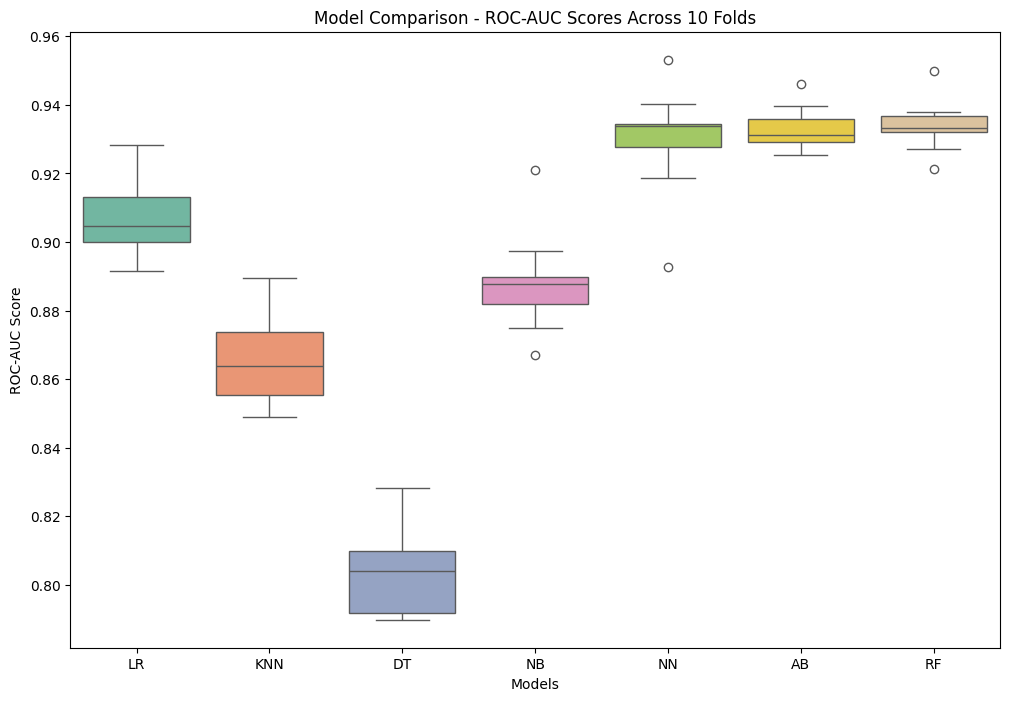

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, palette="Set2")
plt.title('Model Comparison - ROC-AUC Scores Across 10 Folds')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model.

In [89]:
best_model = AdaBoostClassifier(random_state=763)

param_grid = {
    'n_estimators': [50, 100, 300], 
    'learning_rate': [0.001, 0.01, 0.1], 
    'algorithm': ['SAMME'],
    
    'estimator': [
        DecisionTreeClassifier(max_depth=1, min_samples_split=2, min_samples_leaf=1),
        DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2),
        DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=4)
    ]
}

In [90]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=10
)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score from GridSearchCV: ", grid_search.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


<a id='6'></a>
# 7. Finalise the Model

In [ ]:
best_tuned_model = grid_search.best_estimator_

best_tuned_model.fit(X_train, y_train)

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [ ]:
y_pred = best_tuned_model.predict(X_test)

Find accuracy score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Calculate confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Make classification report

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

The model provides good results on test; it is by far better than any random model. It allows to detect users that are likely to default well.

### Calculate the ROC curve for the model and its AUC

In [ ]:
y_pred_proba = best_tuned_model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

y_pred_proba_train = best_tuned_model.predict_proba(X_train)[:, 1] 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', label=f'ROC curve train (area = {roc_auc_train:.2f})', alpha = 0.4)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve test (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
best_tuned_model = grid_search.best_estimator_
y_pred = best_tuned_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC-AUC of the best model: {test_roc_auc:.4f}")

With a Test ROC-AUC of 0.9338, the model performs well on the test data, meaning it effectively differentiates between loan defaults and non-defaults. 
The results of the cross-validation runs confirm that the AdaBoost classifier with specific tuned parameters is likely our best model. 
We could deploy this model for predictive tasks or further explore additional tuning.

In [ ]:
# add the model to cv_results
cv_results = cross_val_score(best_tuned_model, X_train, y_train, cv=kf, scoring=scoring)
results_df['AD optimal'] = cv_results

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

In [ ]:
importances = best_tuned_model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
roc_values = []

for w in tqdm(np.arange(0,0.1, 0.01)):
    #print(w)
    selected_features = X_train.columns[importances > w]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    best_tuned_model.fit(X_train_selected, y_train)
    
    y_pred = best_tuned_model.predict(X_train_selected)
    roc_values.append(roc_auc_score(y_train, y_pred))

In [ ]:
plt.plot(np.arange(0,0.1, 0.01), roc_values)
plt.title("ROC-AUC of the model on train with different importance threshold")
plt.xlabel("Importance threshold for feature selection")
plt.ylabel("AUC")

In [ ]:
t = np.arange(0,0.1,0.01)[roc_values==max(roc_values)]
print(f"The optimal thresholds for model feature selection are therefore {t} which corresponds to AUC {max(roc_values):.3f}")
print(f'This corresponds to the features : {X.columns[importances>max(t)]}')
selected_features = X.columns[importances >max(t)]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

The more features the better the model performs

<a id='6.3'></a>
## 7.3.Random Forest Tuned

Random Forest is a very powerful model. We are choosing more hyperparameters to tune it

In [108]:
param_grid = {
    'n_estimators': [250],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=10
)

grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score from GridSearchCV: ", grid_search.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 4/10; 1/27] START algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50
[CV 4/10; 1/27] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=50;, score=0.805 total time=   1.4s
[CV 3/10; 2/27] START algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100
[CV 3/10; 2/27] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=100;, score=0.812 total time=   2.8s
[CV 3/10; 3/27] START algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300
[CV 3/10; 3/27] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=300;, score=0.812 total time=   8.4s
[CV 2/10; 4/27] START algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.

In [109]:
best_tuned_rf = grid_search.best_estimator_

# add the model to cv_results
cv_results = cross_val_score(best_tuned_rf, X_train, y_train, cv=kf, scoring=scoring)
results_df['RF optimal'] = cv_results

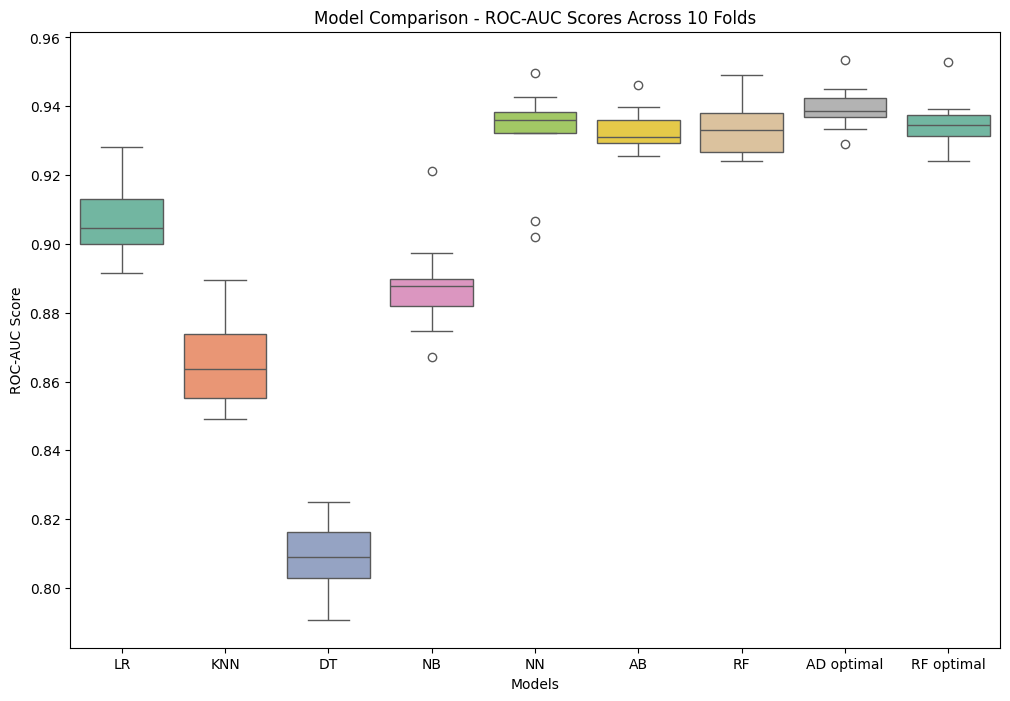

In [110]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, palette="Set2")
plt.title('Model Comparison - ROC-AUC Scores Across 10 Folds')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

<a id='6.4'></a>
## 7.4. MLP Tuned

In [119]:
param_grid = {
    'hidden_layer_sizes': [(100,), (150, 150), (200,), (150, 100, 50)],  # Different architectures
    'activation': ['relu',],  # relu was found in course to be the best loss function
    'solver': ['adam'],   # adam is one of the best algorithms; AdaGrad + RMSProp = handling togh gradients
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'learning_rate_init': [0.001, 0.01, 0.05],  # Initial learning rates
    'max_iter': [1000],  # Number of iterations
    'batch_size': [32, 64, 128],  # Mini-batch sizes
    'early_stopping': [True],  # Whether to use early stopping
    'n_iter_no_change': [10]  # Number of iterations with no improvement for early stopping
}

grid_search = GridSearchCV(
    estimator=MLPClassifier(random_state=43),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=10
)

grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score from GridSearchCV: ", grid_search.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV 8/10; 1/12] START activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, solver=adam
[CV 8/10; 1/12] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, solver=adam;, score=0.913 total time=   9.3s
[CV 2/10; 2/12] START activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, solver=adam
[CV 2/10; 2/12] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, solver=adam;, score=0.914 total time=   3.9s
[CV 10/10; 2/12] START activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 150), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, solver=adam
[CV 10/10; 2/12] END activation=relu, alpha=0.0001, hidden_layer_sizes

In [125]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score',ascending = False).head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
210       1.261284      0.114934         0.006434        0.001847   
213       1.216726      0.091665         0.005311        0.000979   
144       1.191481      0.328235         0.004474        0.002117   

    param_activation param_alpha param_batch_size param_early_stopping  \
210             relu        0.01              128                 True   
213             relu        0.01              128                 True   
144             relu        0.01               32                 True   

    param_hidden_layer_sizes param_learning_rate  ... split3_test_score  \
210           (150, 100, 50)            constant  ...          0.944093   
213           (150, 100, 50)            adaptive  ...          0.944093   
144                   (100,)            constant  ...          0.943018   

    split4_test_score split5_test_score split6_test_score split7_test_score  \
210          0.943095          0.934765          0.936306          0.944451   
213          0.943095          0.934765          0.936306          0.944451   
144          0.940288          0.940276          0.937956          0.938434   

     split8_test_score  split9_test_score  mean_test_score  std_test_score  \
210           0.928059           0.948361         0.939048        0.005877   
213           0.928059           0.948361         0.939048        0.005877   
144           0.926884           0.951802         0.938786        0.006110   

     rank_test_score  
210                1  
213                1  
144                3  

[3 rows x 28 columns]

In [126]:
best_tuned_mlp = grid_search.best_estimator_

# add the model to cv_results
cv_results = cross_val_score(best_tuned_mlp, X_train, y_train, cv=kf, scoring=scoring)
results_df['MLP optimal'] = cv_results

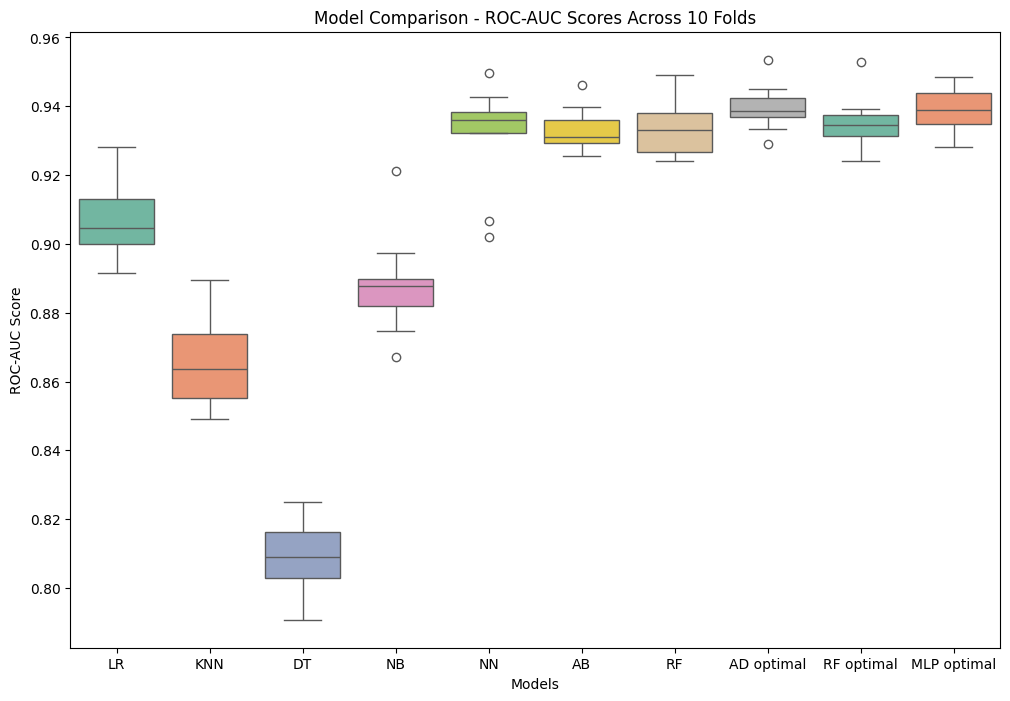

In [127]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, palette="Set2")
plt.title('Model Comparison - ROC-AUC Scores Across 10 Folds')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

Now we have got 3 fine-tuned models that give good AUC-ROC

<a id='6.5'></a>
## 7.5. Voting Classifier of 3 best models

Let's unite them via voting classifier

In [137]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('mlp', best_tuned_mlp),
    ('ada', best_tuned_model),
    ('rf', best_tuned_rf)],
    voting='soft'
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0.01, batch_size=128,
                                            early_stopping=True,
                                            hidden_layer_sizes=(150, 100, 50),
                                            max_iter=1000, random_state=43)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 estimator=DecisionTreeClassifier(max_depth=3,
                                                                                  min_samples_leaf=4,
                                                                                  min_samples_split=10),
                                                 learning_rate=0.1,
                                                 n_estimators=300,
                                                 random_state=763)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=250))],
                 voting='soft')

In [138]:
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

y_pred_proba_train = voting_clf.predict_proba(X_train)[:, 1] 
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

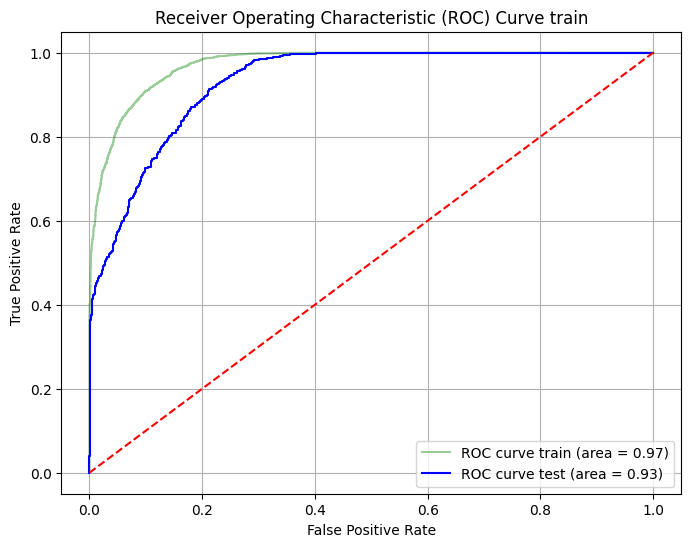

In [139]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', label=f'ROC curve train (area = {roc_auc_train:.2f})', alpha = 0.4)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve test (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [140]:
roc_auc

0.9307661157024792

Our manipulations did not impact quality of the model ,uch, it still gives similar auc-roc, even smaller

## Conclusion

I have successfully predicted default probabilities of the loans. I firstly cleaned and preprocessd the data applying logarithms and standard scaling to features. I also trimmed some features so that they do not have too extreme values. After that we separated the dataset on train and test. I ran 7 models to find the best performing one. I fine-tuned 3 models of them to find the best one. I also applied voting classifier to the best 3 models to get the best results.

The grid search identified the best-performing hyperparameter configuration, leading to a ROC-AUC score of approximately 0.915, suggesting a strong predictive performance.
The dataset consisted best features were funded_amnt, dti, earliest_cr_line, and others, contributing to the model's predictions..